# Treamid - DockGen

## Filter Data

Seperating `summary_new.csv` file to different `Recursion Step Done`!

In [1]:
from sklearn.metrics import r2_score
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# Function to filter the CSV file
def filter_csv(input_file_path, output_file_path, recursion_step='1/5'):
    """
    Filters rows in a CSV file where 'Recursion Step Done' equals a specific value.

    Parameters:
    - input_file_path: Path to the input CSV file.
    - output_file_path: Path where the filtered CSV file will be saved.
    - recursion_step: The recursion step value to filter by (default is '1/5').
    """
    # Load the CSV file
    data = pd.read_csv(input_file_path)

    # Filter the dataframe
    filtered_data = data[
        (data['Recursion Step Done'] == recursion_step) &
        (data['Binding Affinity (kcal/mol)'] < 20) &
        (data['Number of clashes'] < 20) &
        (data['Strain Energy'] < 20) &
        (data['Confidence Score'] > -10)
    ]

    # Save the filtered data to a new CSV file
    filtered_data.to_csv(output_file_path, index=False)
    print(f"Filtered data for recursion step {recursion_step} saved to: {output_file_path}")


In [2]:
# Base directory and filename patterns
base_dir = '/fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/DOCKGEN/data/'
input_filename = 'summary_new.csv'
output_filename_pattern = 'filtered_summary_new_rec_{}.csv'

# Full input file path
input_file_path = base_dir + input_filename

# Loop over the recursion steps
for step in range(1, 6):
    recursion_step = f'{step}/5'
    output_file_path = base_dir + output_filename_pattern.format(step)
    filter_csv(input_file_path, output_file_path, recursion_step=recursion_step)


Filtered data for recursion step 1/5 saved to: /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/DOCKGEN/data/filtered_summary_new_rec_1.csv
Filtered data for recursion step 2/5 saved to: /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/DOCKGEN/data/filtered_summary_new_rec_2.csv
Filtered data for recursion step 3/5 saved to: /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/DOCKGEN/data/filtered_summary_new_rec_3.csv
Filtered data for recursion step 4/5 saved to: /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/DOCKGEN/data/filtered_summary_new_rec_4.csv
Filtered data for recursion step 5/5 saved to: /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/DOCKGEN/data/filtered_summary_new_rec_5.csv


## Read Each Seperated Files

In [3]:
# Loop over the recursion steps and read each file
for step in range(1, 6):
    file_path = f'{base_dir}{output_filename_pattern.format(step)}' 
    data = pd.read_csv(file_path) 
    num_rows = data.shape[0]  
    print(f'Total number of data points for recursion step {step}/5: {num_rows}')
    print(f'First few rows of the dataframe for recursion step {step}/5:')
    display(data.head()) 
    

Total number of data points for recursion step 1/5: 177
First few rows of the dataframe for recursion step 1/5:


Protein ID Recursion Step Done  Ligand Description  \
0  4xdr_1_ADN_0_protein_processed                 1/5                 NaN   
1  2zcz_2_TRP_3_protein_processed                 1/5                 NaN   
2  1lri_1_CLR_0_protein_processed                 1/5                 NaN   
3  2x34_2_UQ8_0_protein_processed                 1/5                 NaN   
4  2xta_1_ACO_0_protein_processed                 1/5                 NaN   

   Binding Affinity (kcal/mol)  Number of clashes  Strain Energy  \
0                    -6.117000                 16       8.221263   
1                    -2.858518                  2       4.652649   
2                    -6.286836                  5       9.124463   
3                    -2.266133                  8       6.511392   
4                    -3.293417                  3       9.153760   

   Confidence Score            Rank of sdf    _timestamp   _runtime  _step  
0             -1.03  rank1_confidence-1.03  1.712995e+09  42.164721      8  
1             -1.60  rank1_confidence-1.60  1.713022e+09  37.455925      8  
2             -0.37  rank1_confidence-0.37  1.712993e+09  26.489006      8  
3             -1.57  rank1_confidence-1.57  1.713021e+09  36.916762      8  
4             -0.82  rank1_confidence-0.82  1.713022e+09  57.770761      8

Total number of data points for recursion step 2/5: 34
First few rows of the dataframe for recursion step 2/5:


Protein ID Recursion Step Done  \
0  1ha3_1_MAU_0_protein_processed                 2/5   
1  4qa8_1_PJZ_0_protein_processed                 2/5   
2  5f52_1_ASP_2_protein_processed                 2/5   
3  1lri_1_CLR_0_protein_processed                 2/5   
4  3ada_1_NAD_0_protein_processed                 2/5   

                                  Ligand Description  \
0  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
1  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
2  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
3  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
4  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   

   Binding Affinity (kcal/mol)  Number of clashes  Strain Energy  \
0                    -4.539118                 19      10.455225   
1                    -6.672282                 11      12.686520   
2                    -4.030397                 13       6.372906   
3                    -5.825592                  2       4.848598   
4                    -5.805585                  8       6.667423   

   Confidence Score            Rank of sdf    _timestamp   _runtime  _step  
0             -0.34  rank1_confidence-0.34  1.713019e+09  14.601565      8  
1             -0.14  rank1_confidence-0.14  1.712994e+09  24.036091      8  
2             -1.39  rank1_confidence-1.39  1.712993e+09  19.894832      8  
3             -0.76  rank1_confidence-0.76  1.713020e+09  12.659541      8  
4             -0.56  rank1_confidence-0.56  1.713023e+09  46.445219      8

Total number of data points for recursion step 3/5: 20
First few rows of the dataframe for recursion step 3/5:


Protein ID Recursion Step Done  \
0  5bu3_1_4W9_0_protein_processed                 3/5   
1  3qzy_1_FAD_0_protein_processed                 3/5   
2  4o95_1_245_0_protein_processed                 3/5   
3  2hk9_1_SKM_0_protein_processed                 3/5   
4  4uoc_1_NCN_1_protein_processed                 3/5   

                                  Ligand Description  \
0  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
1  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
2  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
3  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
4  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   

   Binding Affinity (kcal/mol)  Number of clashes  Strain Energy  \
0                    -4.853884                 15       9.636188   
1                    -4.597835                 17      10.230377   
2                    -5.903180                 11       5.822514   
3                    -4.307271                 16       8.683400   
4                    -5.023182                  9       9.085747   

   Confidence Score            Rank of sdf    _timestamp   _runtime  _step  
0             -0.52  rank1_confidence-0.52  1.713020e+09  14.205933      8  
1             -0.91  rank1_confidence-0.91  1.712909e+09  14.019549      8  
2             -0.92  rank1_confidence-0.92  1.713021e+09  32.981428      8  
3             -1.15  rank1_confidence-1.15  1.713019e+09  28.087482      8  
4             -1.21  rank1_confidence-1.21  1.713023e+09  41.829731      8

Total number of data points for recursion step 4/5: 12
First few rows of the dataframe for recursion step 4/5:


Protein ID Recursion Step Done  \
0  1lri_1_CLR_0_protein_processed                 4/5   
1  6a71_1_9UX_0_protein_processed                 4/5   
2  1hw8_1_114_1_protein_processed                 4/5   
3  4o95_1_245_0_protein_processed                 4/5   
4  1hw8_1_114_1_protein_processed                 4/5   

                                  Ligand Description  \
0  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
1  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
2  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
3  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
4  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   

   Binding Affinity (kcal/mol)  Number of clashes  Strain Energy  \
0                    -6.169537                  6       7.919793   
1                    -2.279460                  2       6.646723   
2                    -6.073555                  8       7.993691   
3                    -6.821620                 13       6.730385   
4                    -6.468828                  9      10.466882   

   Confidence Score            Rank of sdf    _timestamp   _runtime  _step  
0             -0.80  rank1_confidence-0.80  1.712993e+09  26.409189      8  
1             -1.24  rank1_confidence-1.24  1.713021e+09  26.610418      8  
2             -0.23  rank1_confidence-0.23  1.712992e+09  32.374939      8  
3             -0.81  rank1_confidence-0.81  1.713021e+09  31.929338      8  
4              0.04   rank1_confidence0.04  1.713020e+09  18.141228      8

Total number of data points for recursion step 5/5: 11
First few rows of the dataframe for recursion step 5/5:


Protein ID Recursion Step Done  \
0      5f52_1_ASP_2_protein_processed                 5/5   
1      3pfd_1_FDA_2_protein_processed                 5/5   
2      1hw8_1_114_1_protein_processed                 5/5   
3      1lri_1_CLR_0_protein_processed                 5/5   
4  5jbf_1_GLC-GLC_0_protein_processed                 5/5   

                                  Ligand Description  \
0  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
1  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
2  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
3  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
4  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   

   Binding Affinity (kcal/mol)  Number of clashes  Strain Energy  \
0                    -4.429020                 10       4.768540   
1                    -6.270607                  6       6.471435   
2                    -5.951319                 14       6.704703   
3                    -6.412635                 12       7.615995   
4                    -4.604225                 10      11.079437   

   Confidence Score            Rank of sdf    _timestamp   _runtime  _step  
0             -1.21  rank1_confidence-1.21  1.713021e+09  17.919346      8  
1             -0.32  rank1_confidence-0.32  1.712909e+09  20.762196      8  
2             -0.38  rank1_confidence-0.38  1.712992e+09  22.752548      8  
3             -0.84  rank1_confidence-0.84  1.713020e+09  13.058612      8  
4             -1.27  rank1_confidence-1.27  1.712995e+09  25.538023      8

## Data Distributions

Total number of data points for recursion step 1/5: 177


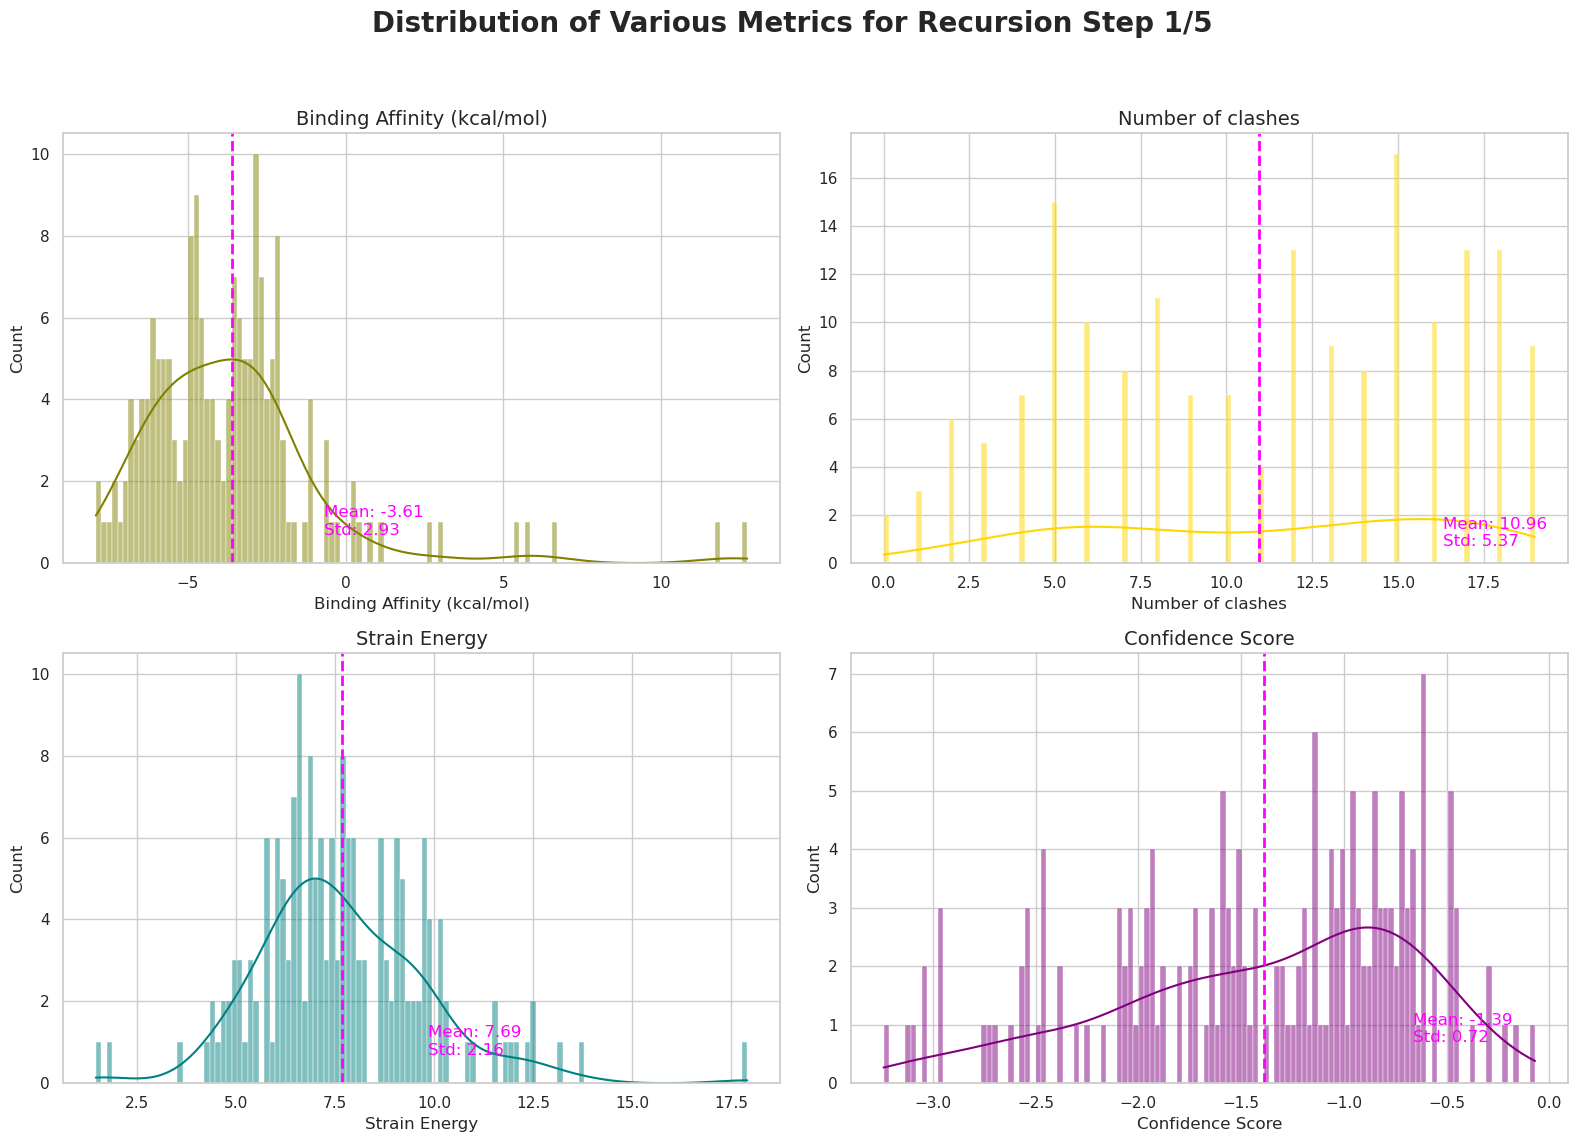

Total number of data points for recursion step 2/5: 34


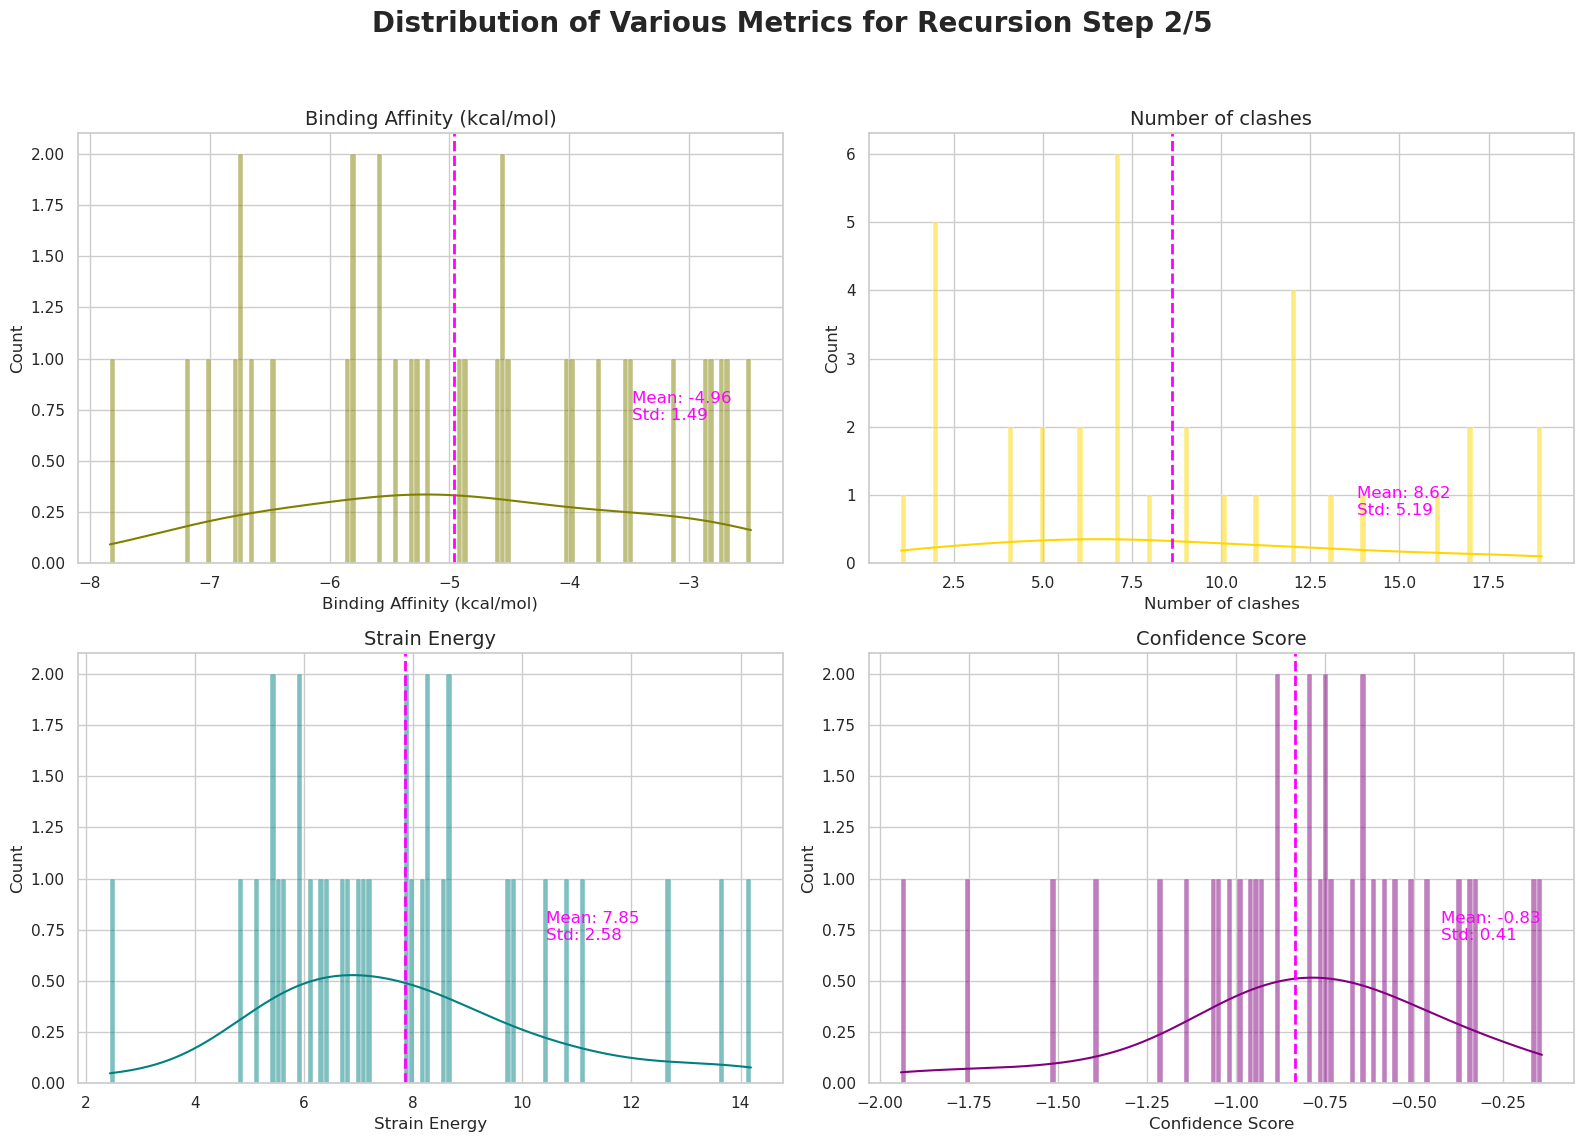

Total number of data points for recursion step 3/5: 20


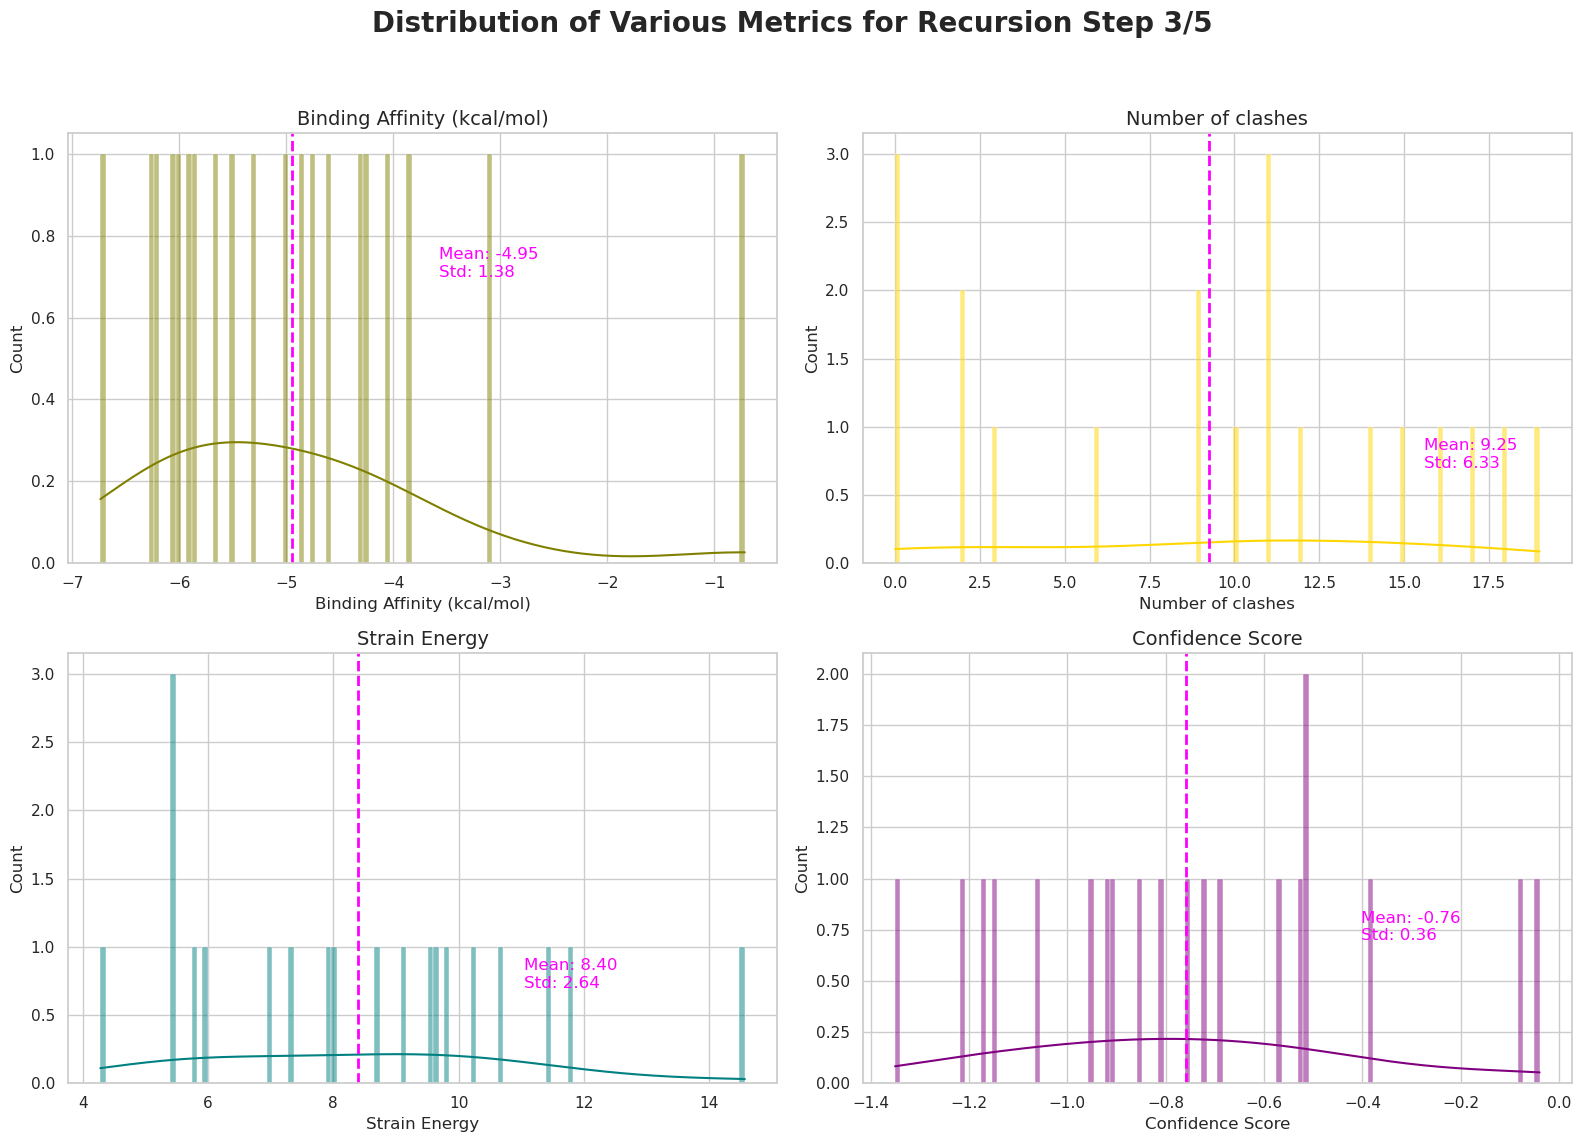

Total number of data points for recursion step 4/5: 12


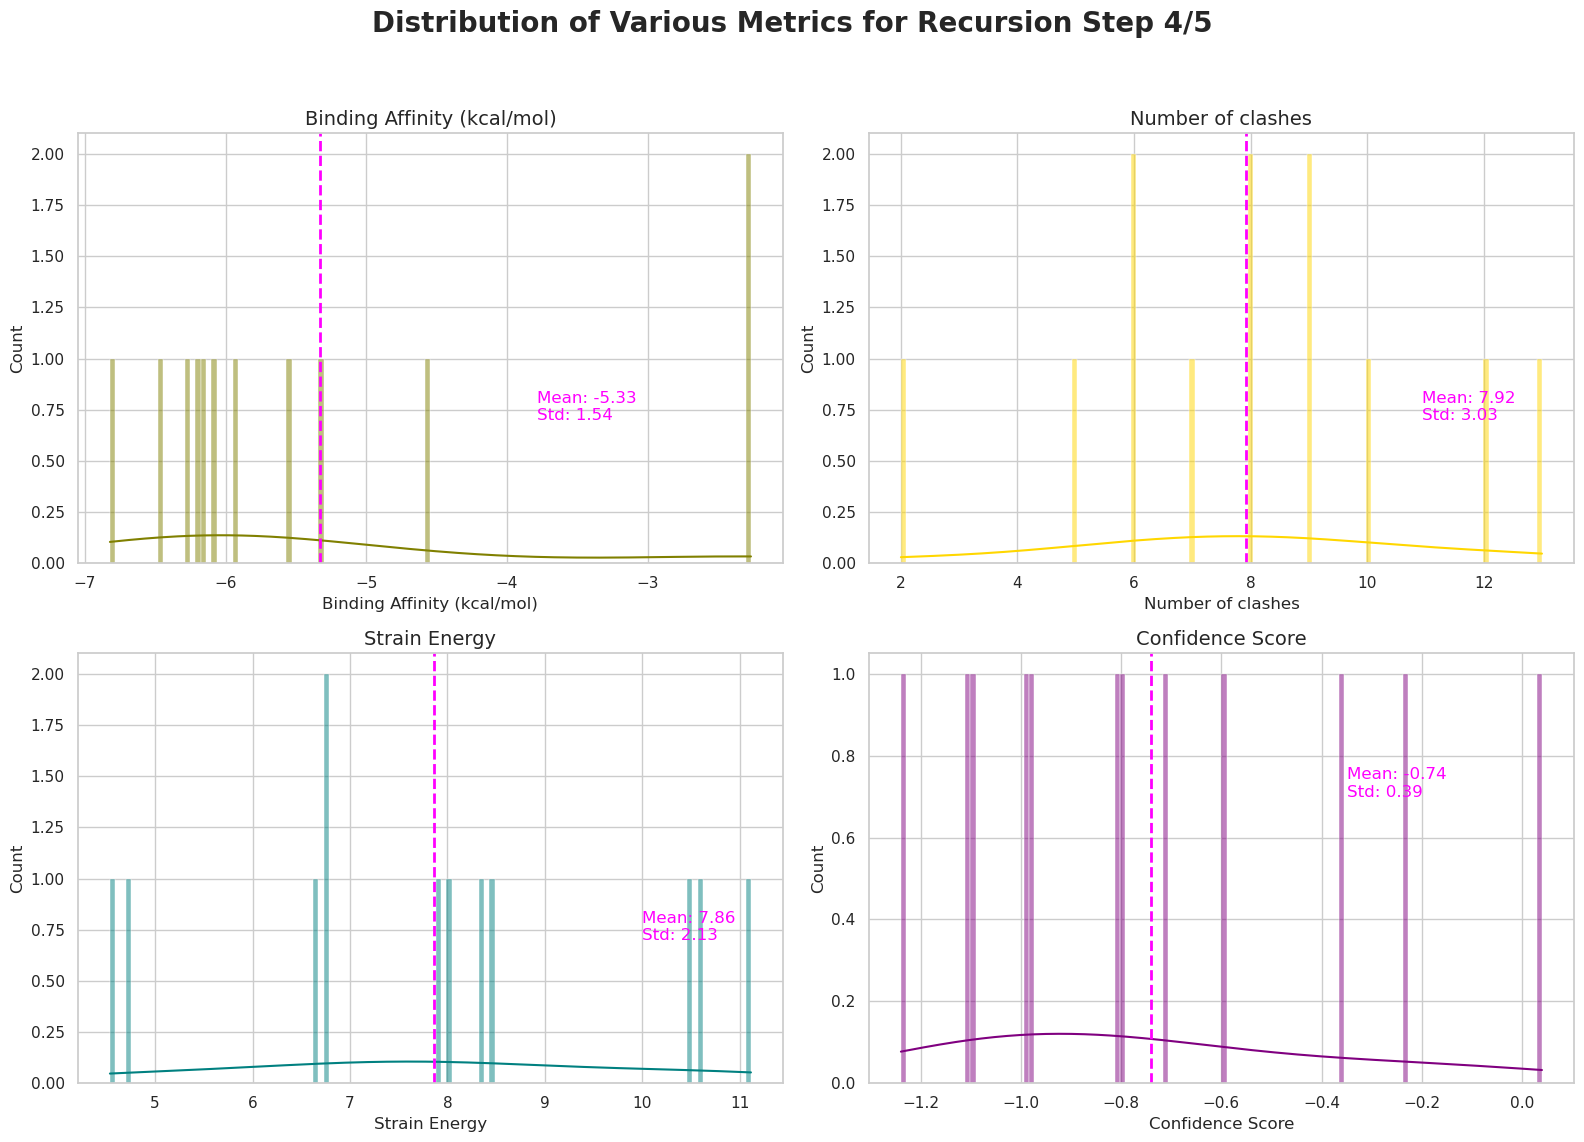

Total number of data points for recursion step 5/5: 11


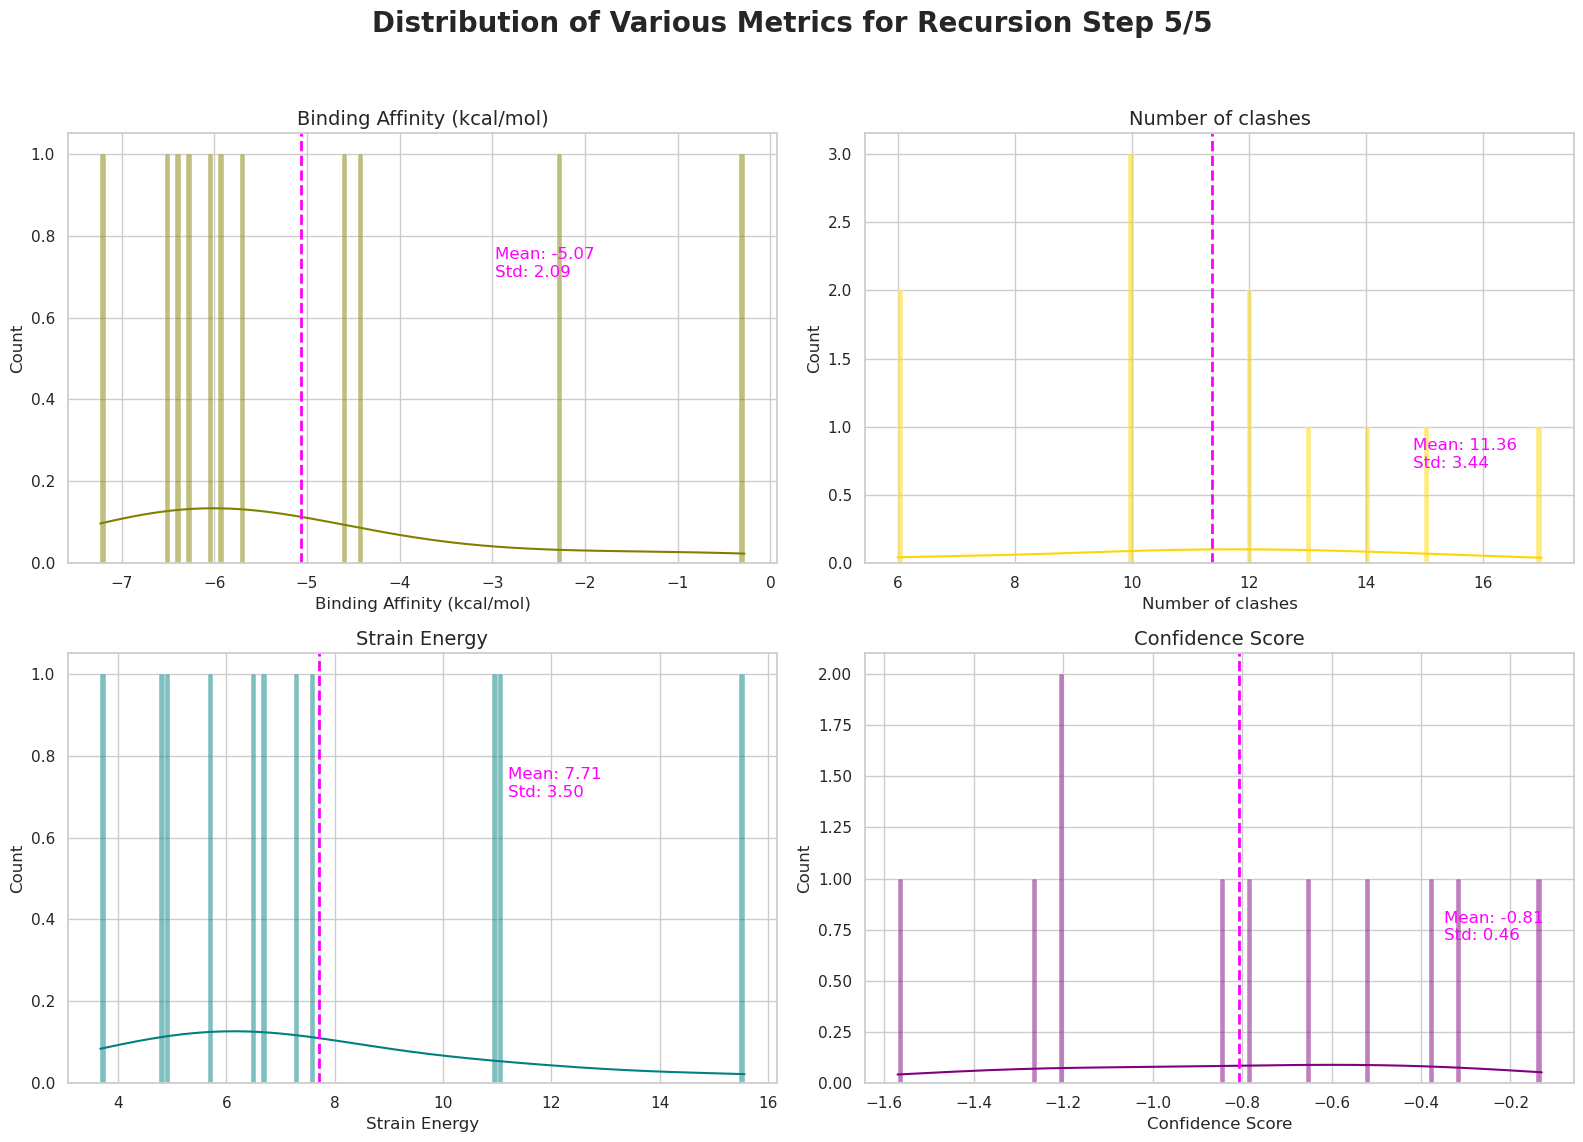

In [4]:
# Function to plot distributions of metrics from a given dataset
def plot_metrics_distributions(data, figure_title):
    # Set the overall aesthetics
    sns.set(style="whitegrid", palette="pastel")

    # Prepare the figure with a larger size for better readability
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # Increased figure size for better legibility
    fig.suptitle(figure_title, fontsize=20, fontweight='bold')

    # Define a common bin size for comparable scales
    common_bins = 120  # Example bin size, adjust based on data distribution

    # List of metrics to plot
    metrics = ['Binding Affinity (kcal/mol)', 'Number of clashes', 'Strain Energy', 'Confidence Score']
    colors = ['olive', 'gold', 'teal', 'purple']

    # Plotting distributions
    for i, metric in enumerate(metrics):
        ax = axes.flat[i]
        sns.histplot(data=data, x=metric, kde=True, ax=ax, color=colors[i], bins=common_bins)
        ax.set_title(metric, fontsize=14)
        ax.grid(True)

        # Calculate mean and std, and annotate on the plots
        mean_value = data[metric].mean()
        std_value = data[metric].std()
        ax.axvline(mean_value, color='magenta', linestyle='dashed', linewidth=2)
        ax.text(mean_value + std_value, 0.7, f'Mean: {mean_value:.2f}\nStd: {std_value:.2f}', color='magenta', ha='left')

    # Adjust layout for a clean look and ensure the titles and labels don't overlap
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Show plot
    plt.show()


# Loop over the recursion steps and plot for each step
for step in range(1, 6):
    file_path = f'{base_dir}{output_filename_pattern.format(step)}'
    data = pd.read_csv(file_path)
    num_rows = data.shape[0]  
    print(f'Total number of data points for recursion step {step}/5: {num_rows}')
    plot_metrics_distributions(data, f'Distribution of Various Metrics for Recursion Step {step}/5')


## Data Distribution Ranges

Total number of data points for recursion step 1/5: 177


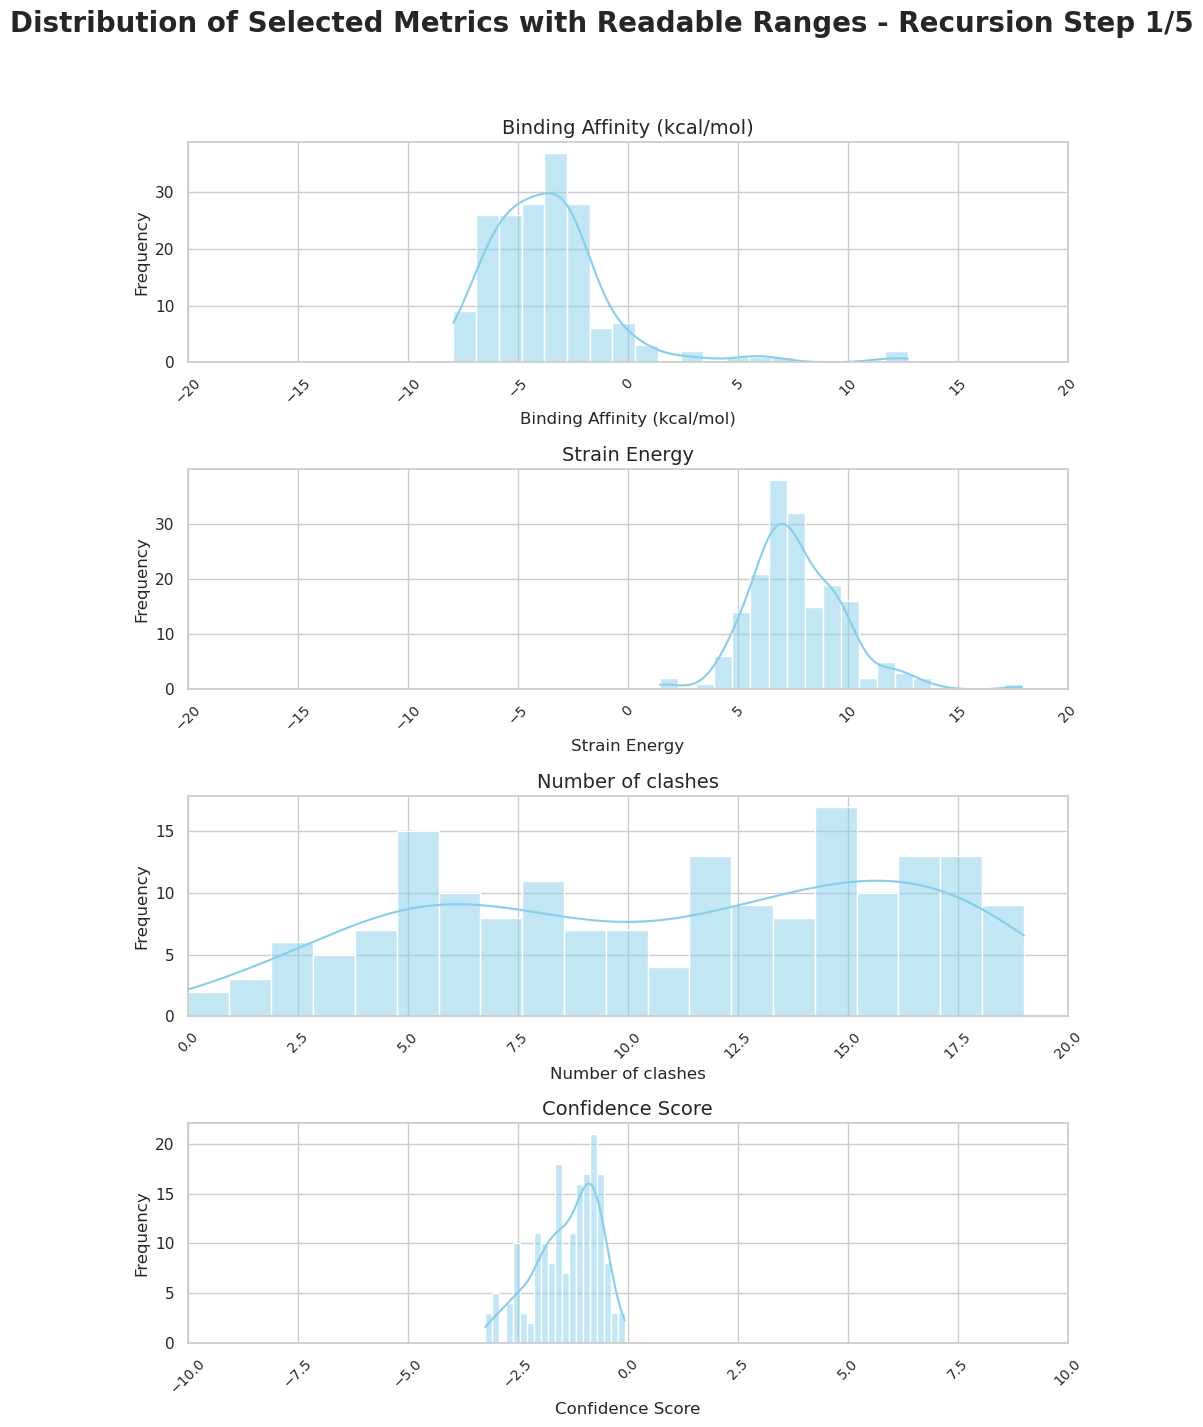

Total number of data points for recursion step 2/5: 34


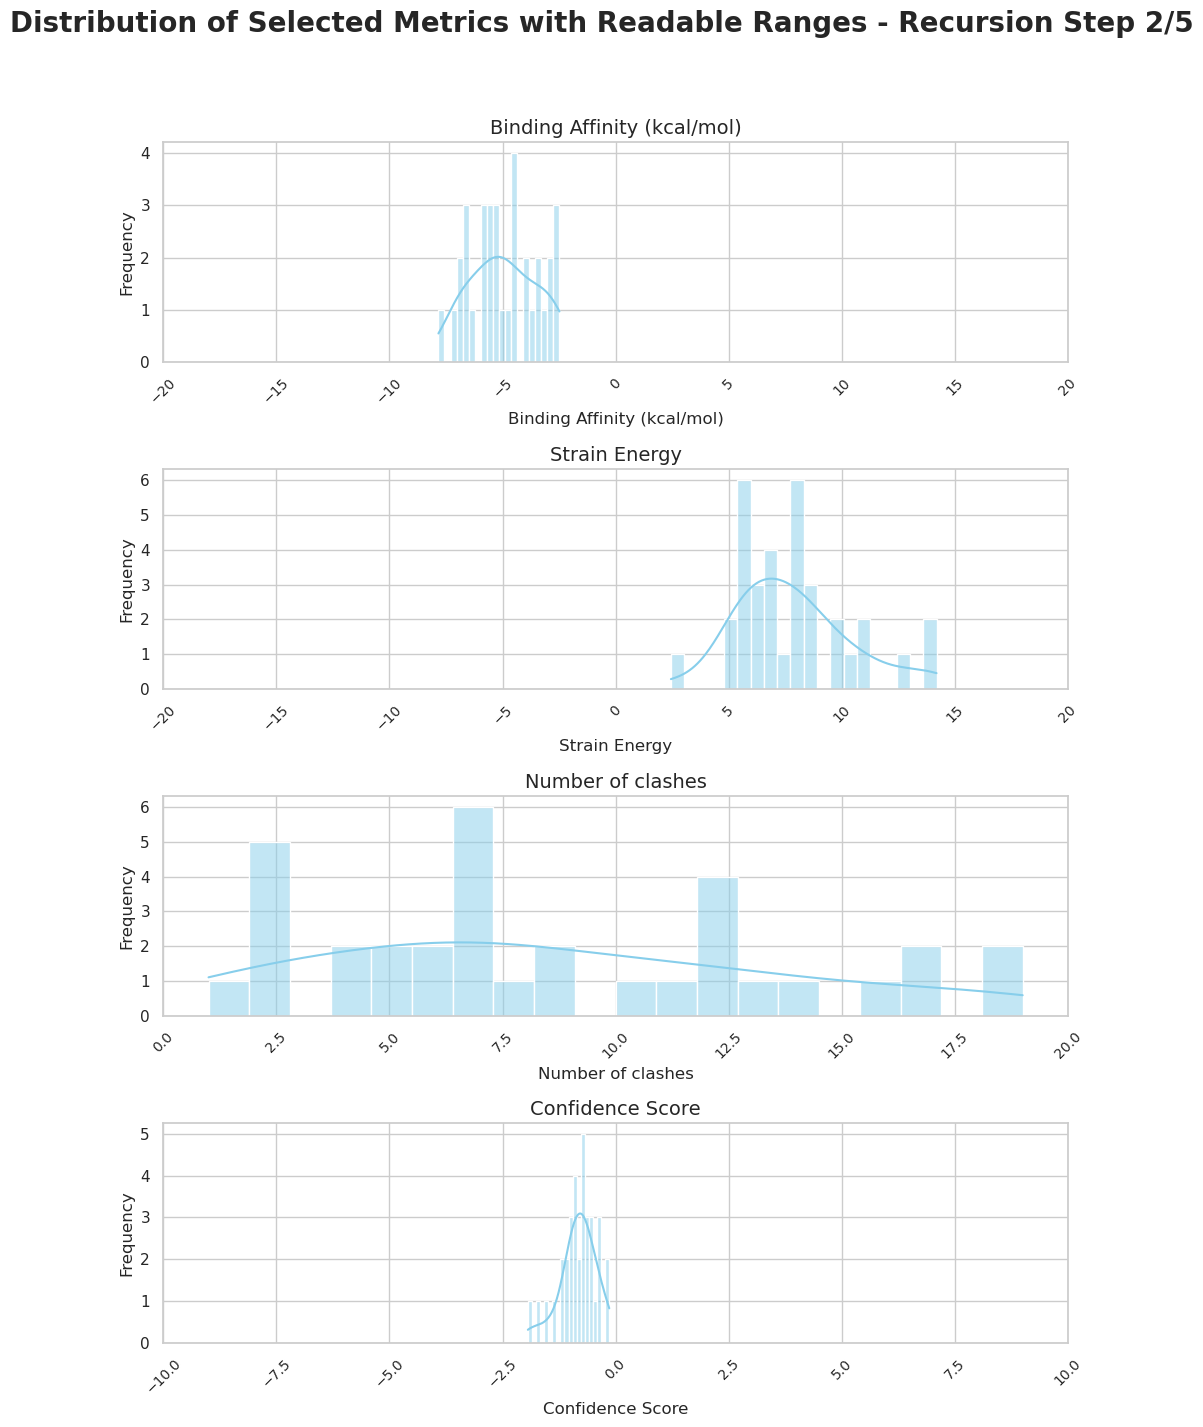

Total number of data points for recursion step 3/5: 20


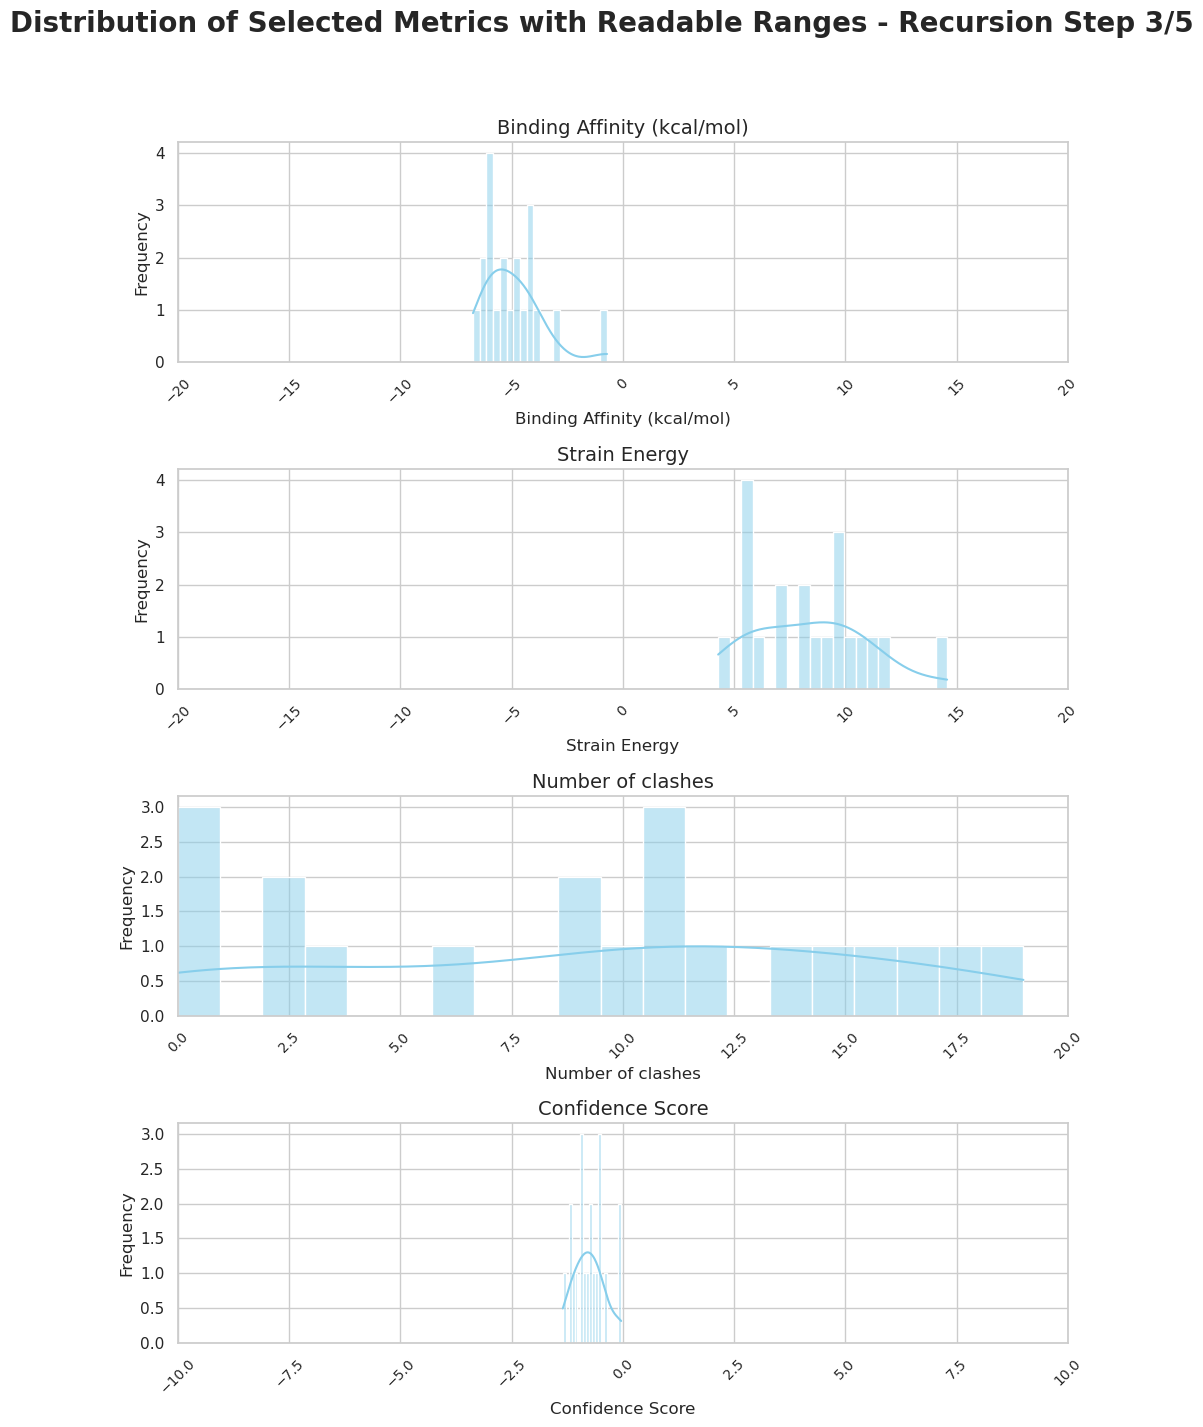

Total number of data points for recursion step 4/5: 12


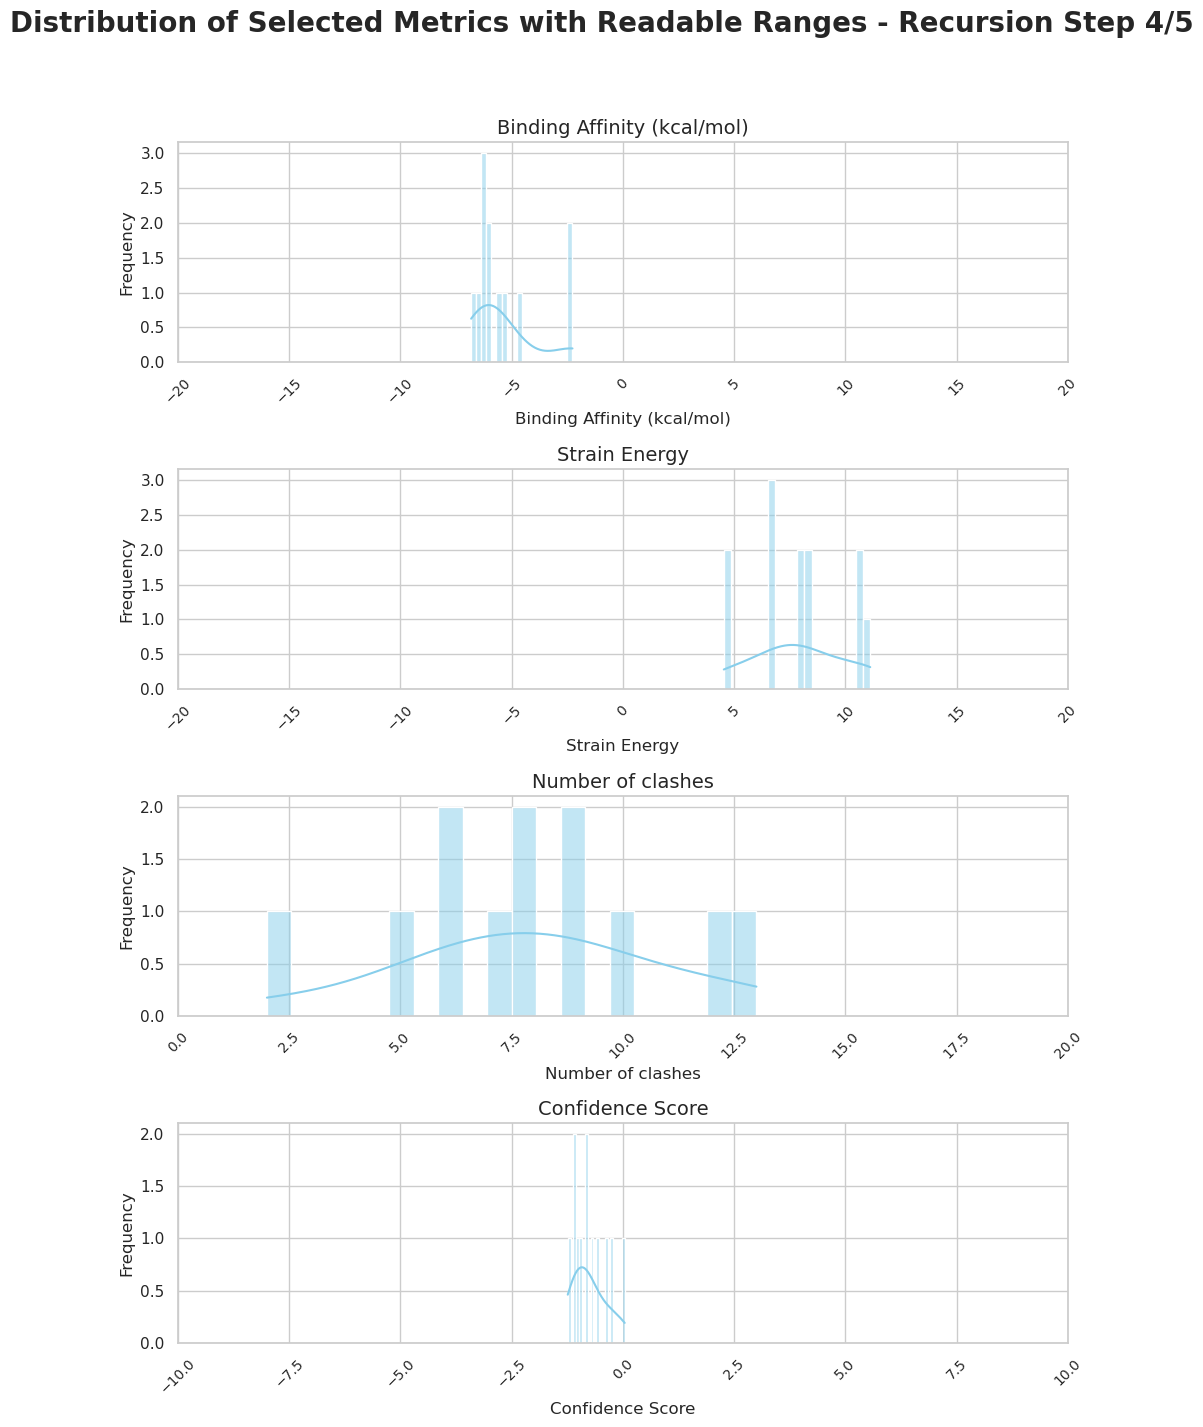

Total number of data points for recursion step 5/5: 11


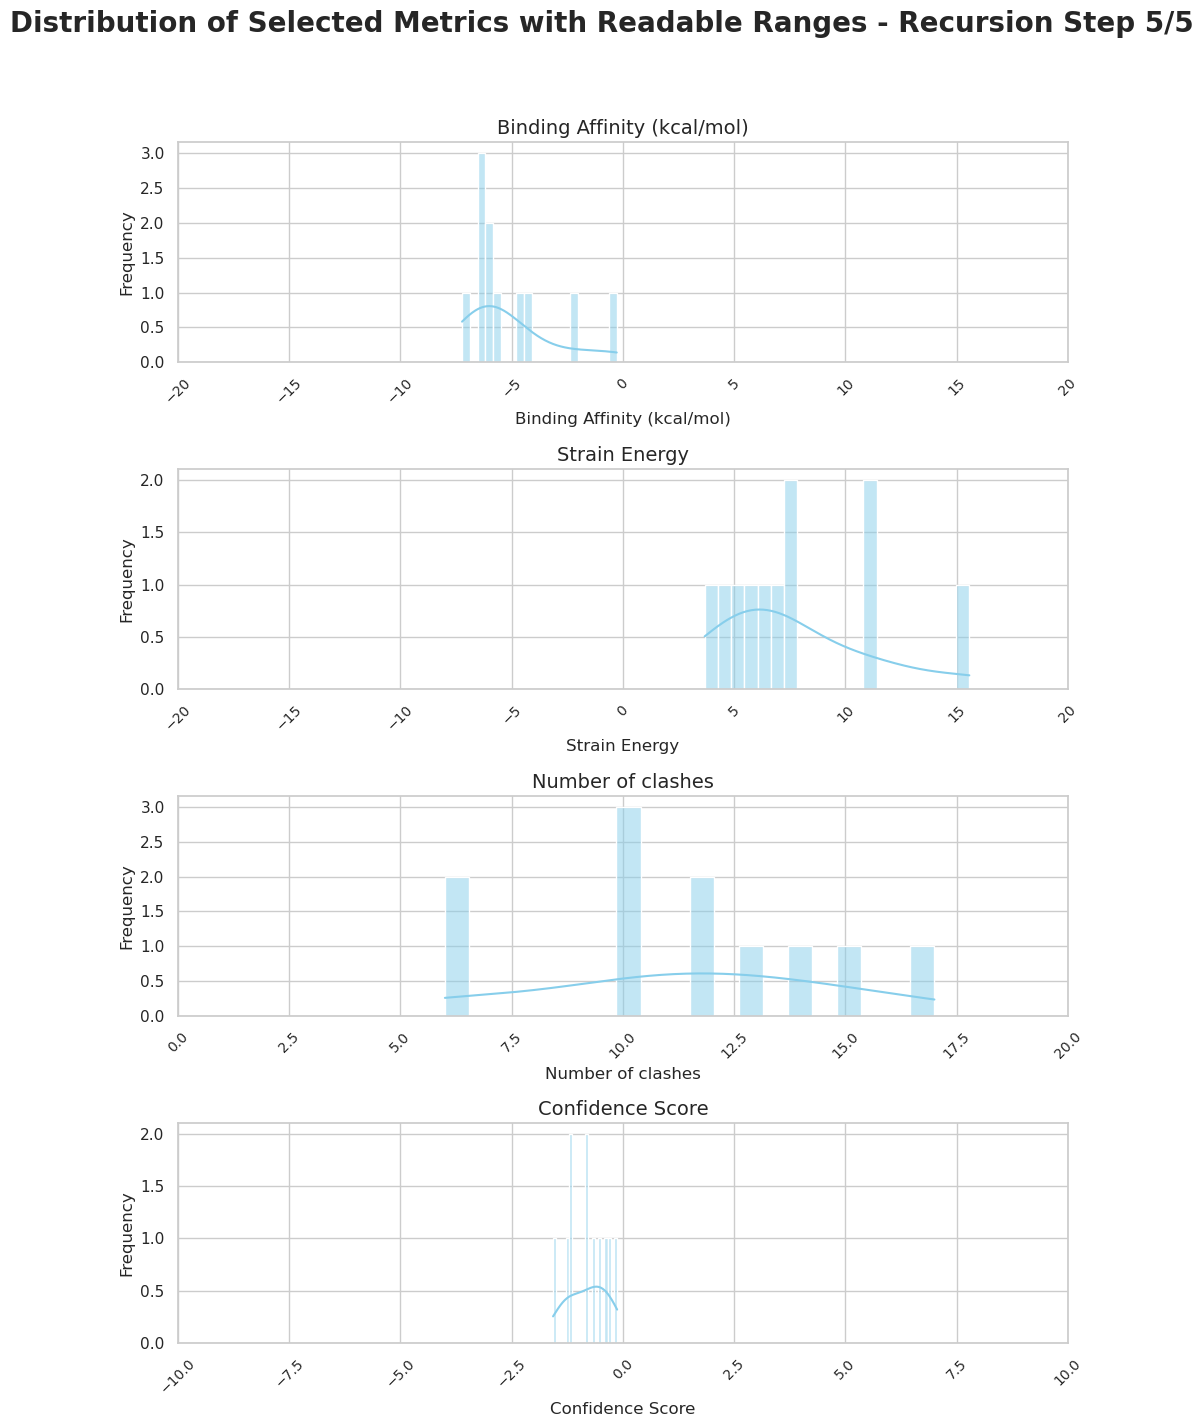

In [5]:
# Function to plot histograms with readable ranges for a given dataset
def plot_histograms_with_readable_ranges(data, title_suffix):
    # Enhancing overall aesthetics
    sns.set(style="whitegrid", palette="pastel")

    # Initializing a larger figure for clearer detail
    fig, axes = plt.subplots(4, 1, figsize=(10, 15))  # Using a vertical layout for better x-axis label readability

    # Titles and customization for improved readability
    fig.suptitle(f'Distribution of Selected Metrics with Readable Ranges - {title_suffix}', fontsize=20, fontweight='bold')

    # Adjusting bin sizes and x-axis limits for clarity
    metrics_info = {
        'Binding Affinity (kcal/mol)': {'bins': 20, 'ax': axes[0], 'xlim': (-20, 20)},
        'Strain Energy': {'bins': 20, 'ax': axes[1], 'xlim': (-20, 20)},
        'Number of clashes': {'bins': 20, 'ax': axes[2], 'xlim': (0, 20)},
        'Confidence Score': {'bins': 20, 'ax': axes[3], 'xlim': (-10, 10)}
    }

    for metric, info in metrics_info.items():
        sns.histplot(data=data, x=metric, kde=True, ax=info['ax'], bins=info['bins'], color='skyblue')
        info['ax'].set_title(metric, fontsize=14)
        info['ax'].set_xlabel(metric, fontsize=12)
        info['ax'].set_ylabel('Frequency', fontsize=12)
        info['ax'].set_xlim(info['xlim'])  # Adjusting x-axis limits for focusing on interesting ranges
        info['ax'].tick_params(axis='x', labelsize=10, rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



# Loop over the recursion steps and plot for each step
for step in range(1, 6):
    file_path = f'{base_dir}{output_filename_pattern.format(step)}'
    data = pd.read_csv(file_path)
    num_rows = data.shape[0]  
    print(f'Total number of data points for recursion step {step}/5: {num_rows}')
    plot_histograms_with_readable_ranges(data, f'Recursion Step {step}/5')


## Correlation Between Confidence Score vs Physical Scores (Binding Affinity, Strain Energy, Number of Clashes) 

- This is all data without selecting range values

Total number of data points for recursion step 1/5: 177


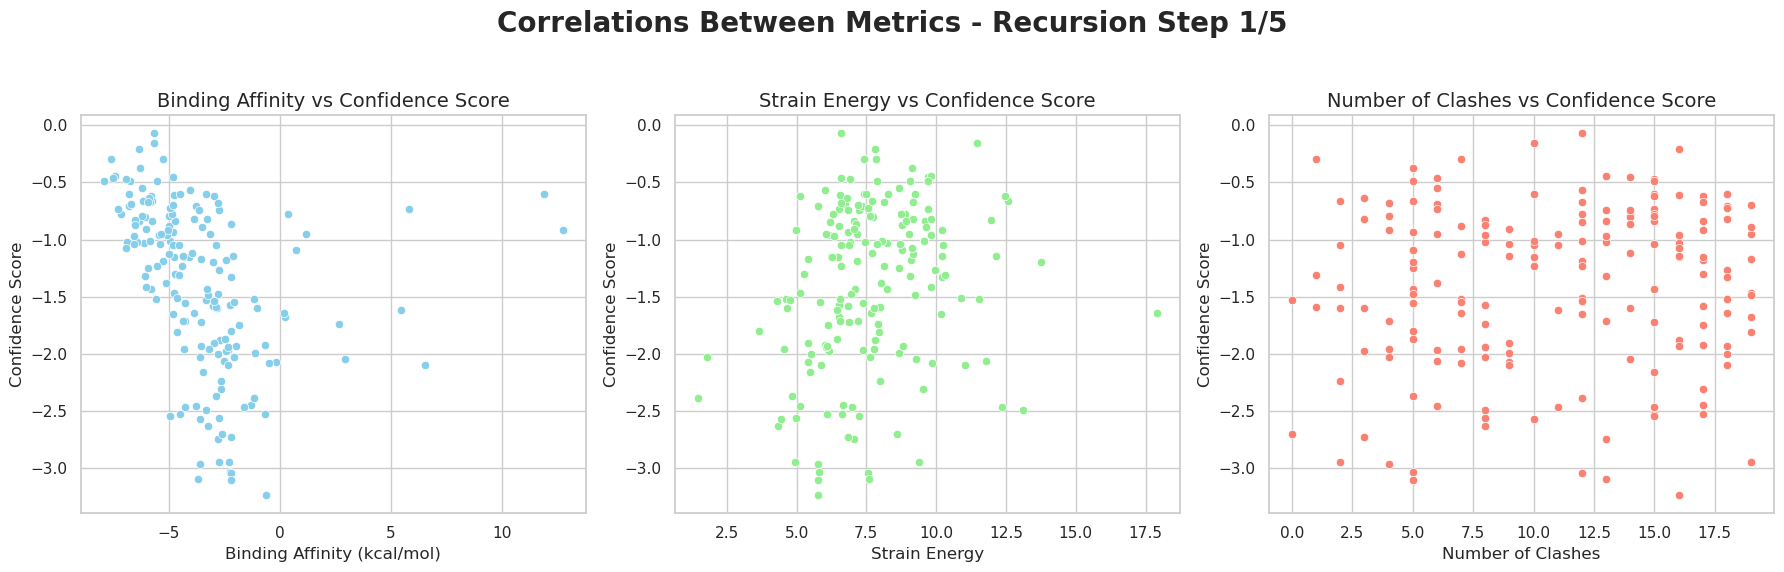

Total number of data points for recursion step 2/5: 34


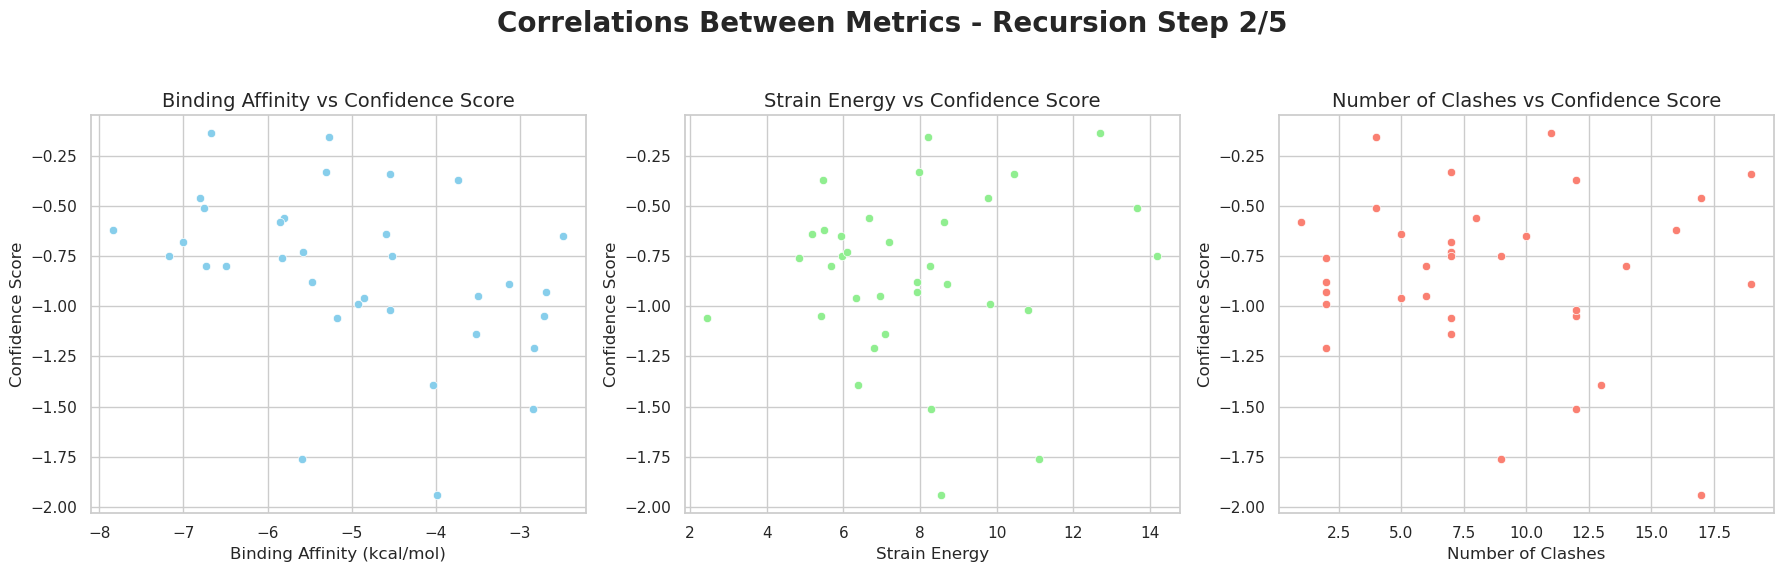

Total number of data points for recursion step 3/5: 20


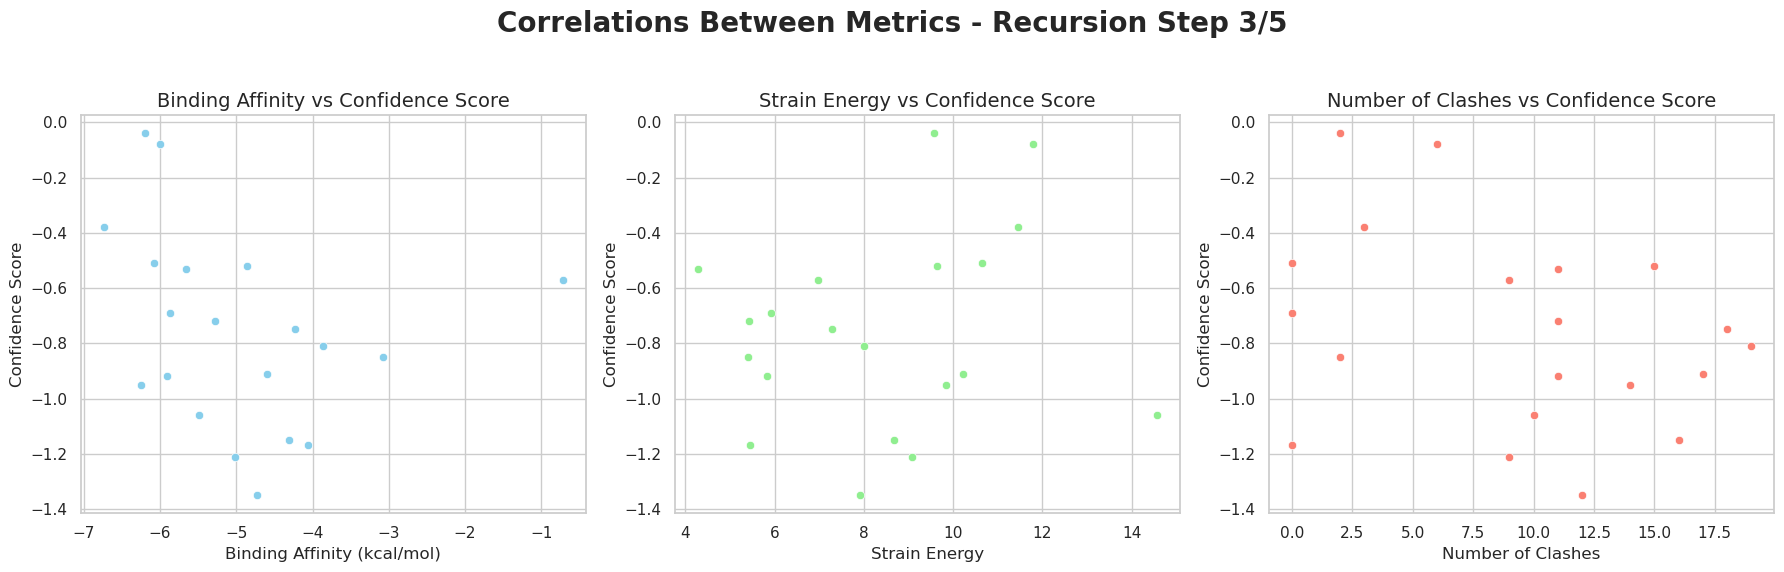

Total number of data points for recursion step 4/5: 12


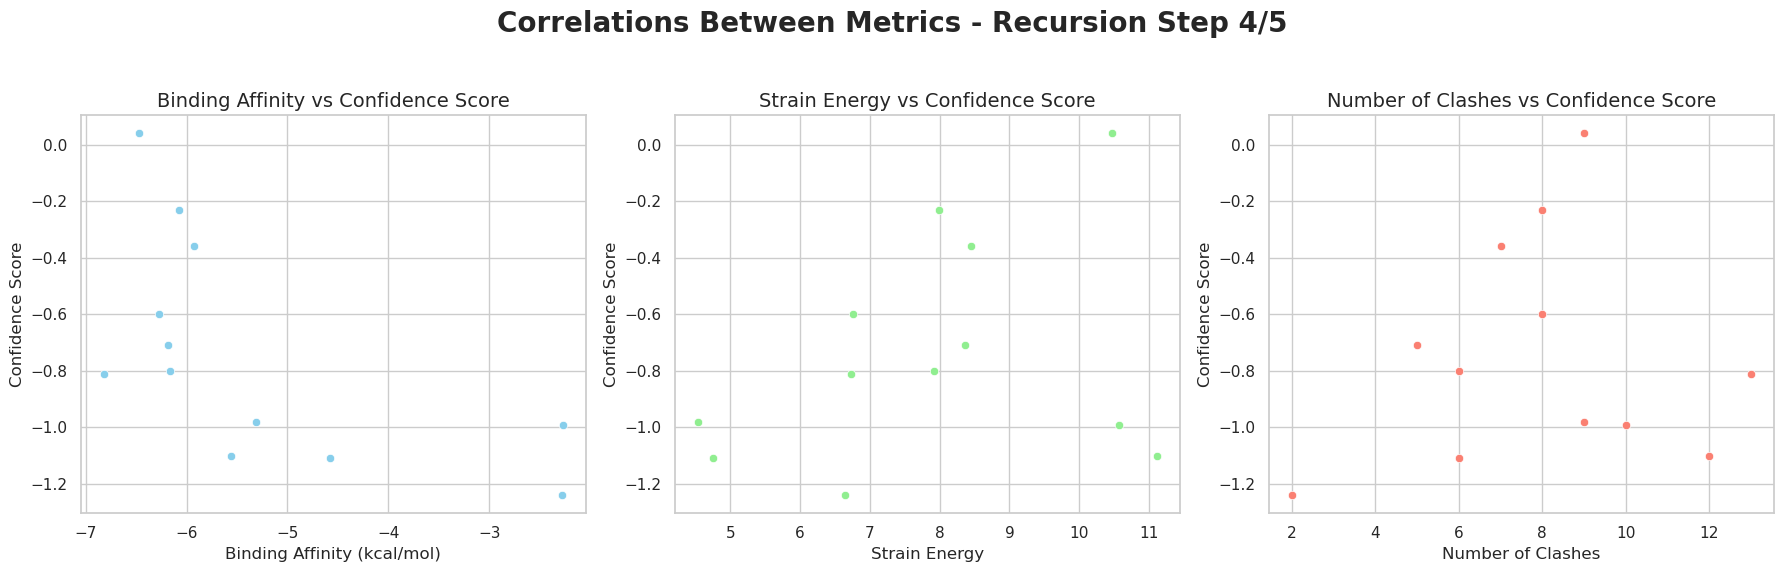

Total number of data points for recursion step 5/5: 11


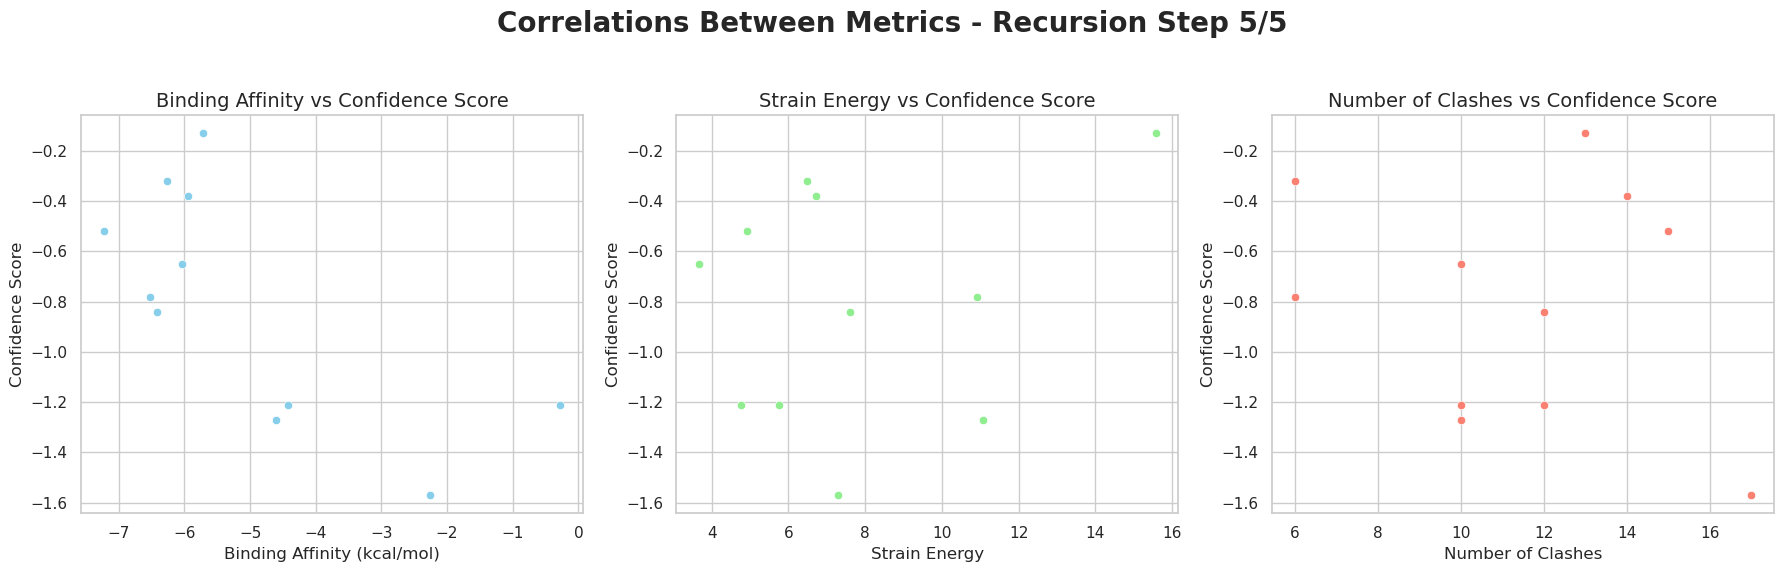

In [6]:
def plot_correlations(data, title_suffix):
    # Plotting correlations for the specified pairs of metrics
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f'Correlations Between Metrics - {title_suffix}', fontsize=20, fontweight='bold')

    # Binding Affinity (kcal/mol) vs Confidence Score
    sns.scatterplot(data=data, x='Binding Affinity (kcal/mol)', y='Confidence Score', ax=axes[0], color='skyblue')
    axes[0].set_title('Binding Affinity vs Confidence Score', fontsize=14)
    axes[0].set_xlabel('Binding Affinity (kcal/mol)', fontsize=12)
    axes[0].set_ylabel('Confidence Score', fontsize=12)

    # Strain Energy vs Confidence Score
    sns.scatterplot(data=data, x='Strain Energy', y='Confidence Score', ax=axes[1], color='lightgreen')
    axes[1].set_title('Strain Energy vs Confidence Score', fontsize=14)
    axes[1].set_xlabel('Strain Energy', fontsize=12)
    axes[1].set_ylabel('Confidence Score', fontsize=12)

    # Number of clashes vs Confidence Score
    sns.scatterplot(data=data, x='Number of clashes', y='Confidence Score', ax=axes[2], color='salmon')
    axes[2].set_title('Number of Clashes vs Confidence Score', fontsize=14)
    axes[2].set_xlabel('Number of Clashes', fontsize=12)
    axes[2].set_ylabel('Confidence Score', fontsize=12)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



# Loop over the recursion steps and plot correlations for each step
for step in range(1, 6):
    file_path = f'{base_dir}{output_filename_pattern.format(step)}'
    data = pd.read_csv(file_path)
    num_rows = data.shape[0]  
    print(f'Total number of data points for recursion step {step}/5: {num_rows}')
    plot_correlations(data, f'Recursion Step {step}/5')


## Correlation Between Confidence Score vs Physical Scores (Binding Affinity, Strain Energy, Number of Clashes) 

- This is all data with selecting range values

Total number of data points for recursion step 1/5: 177


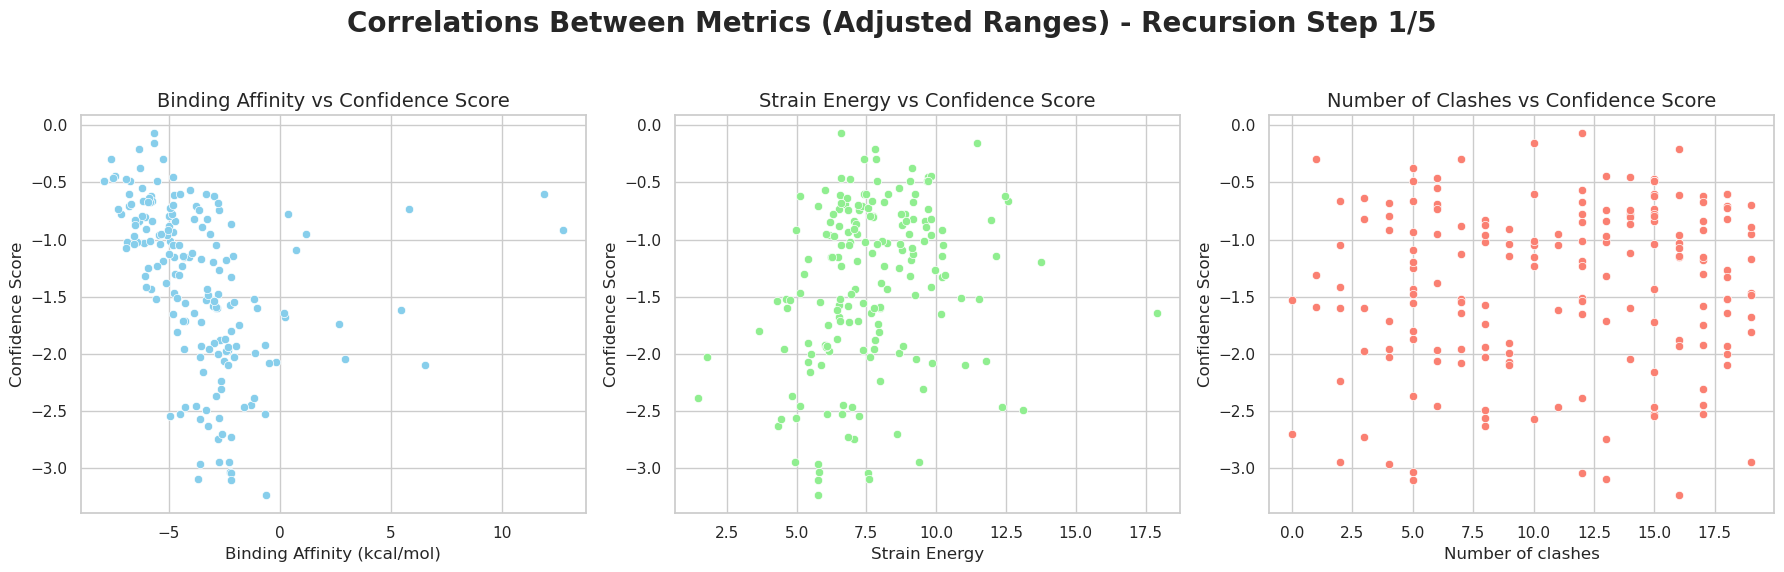

Total number of data points for recursion step 2/5: 34


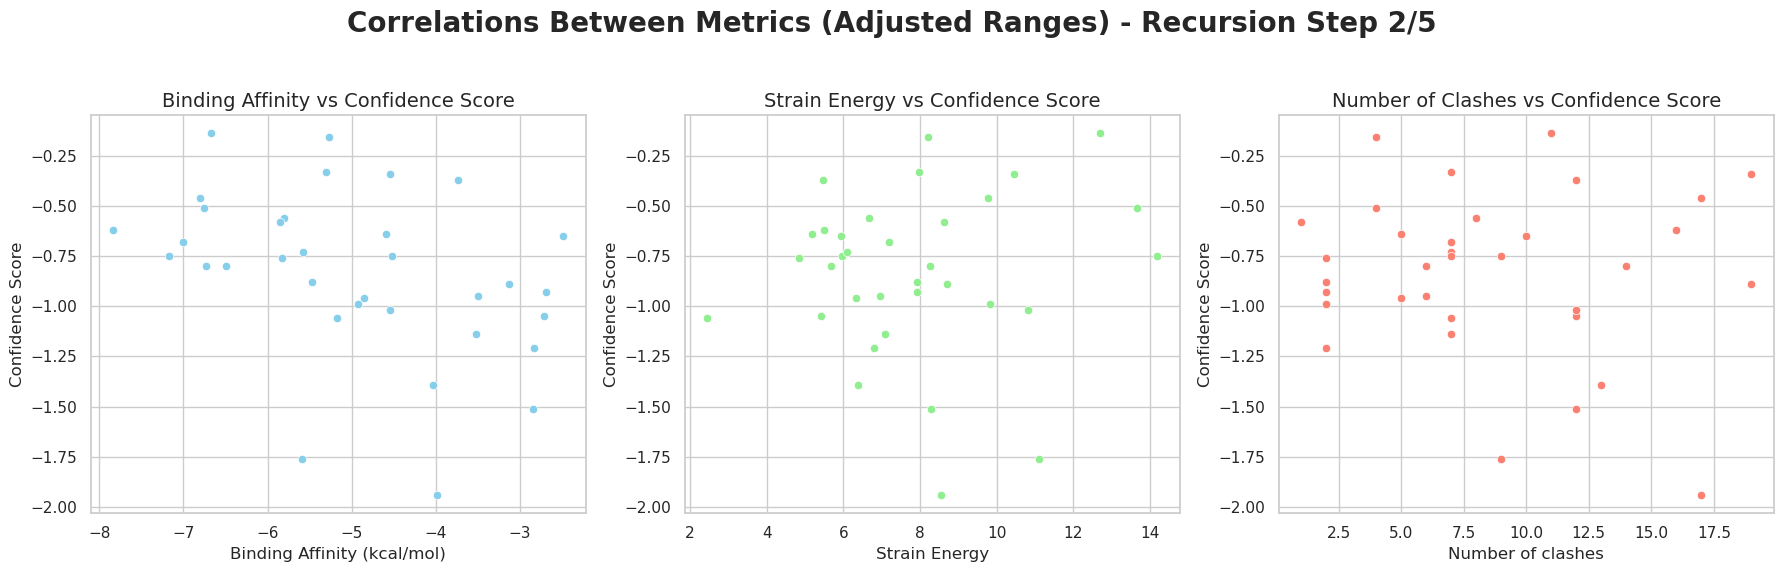

Total number of data points for recursion step 3/5: 20


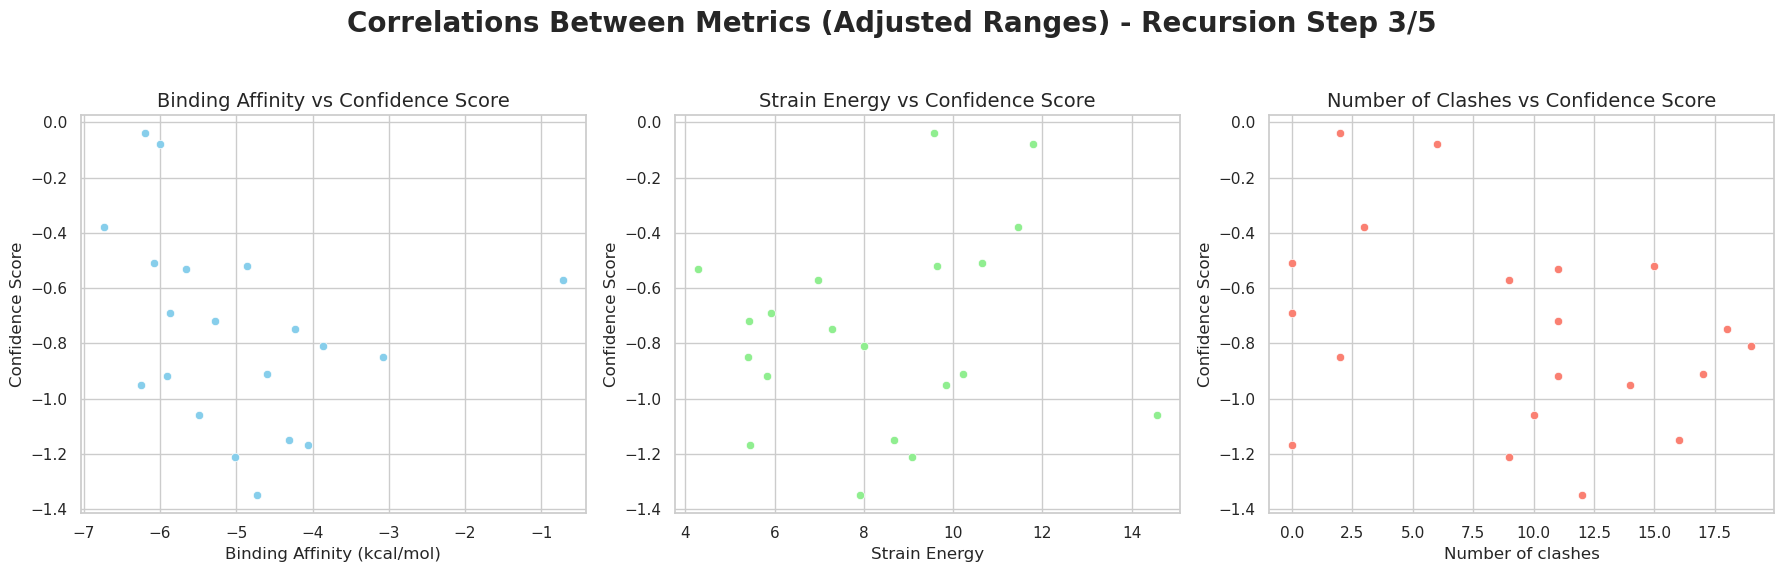

Total number of data points for recursion step 4/5: 12


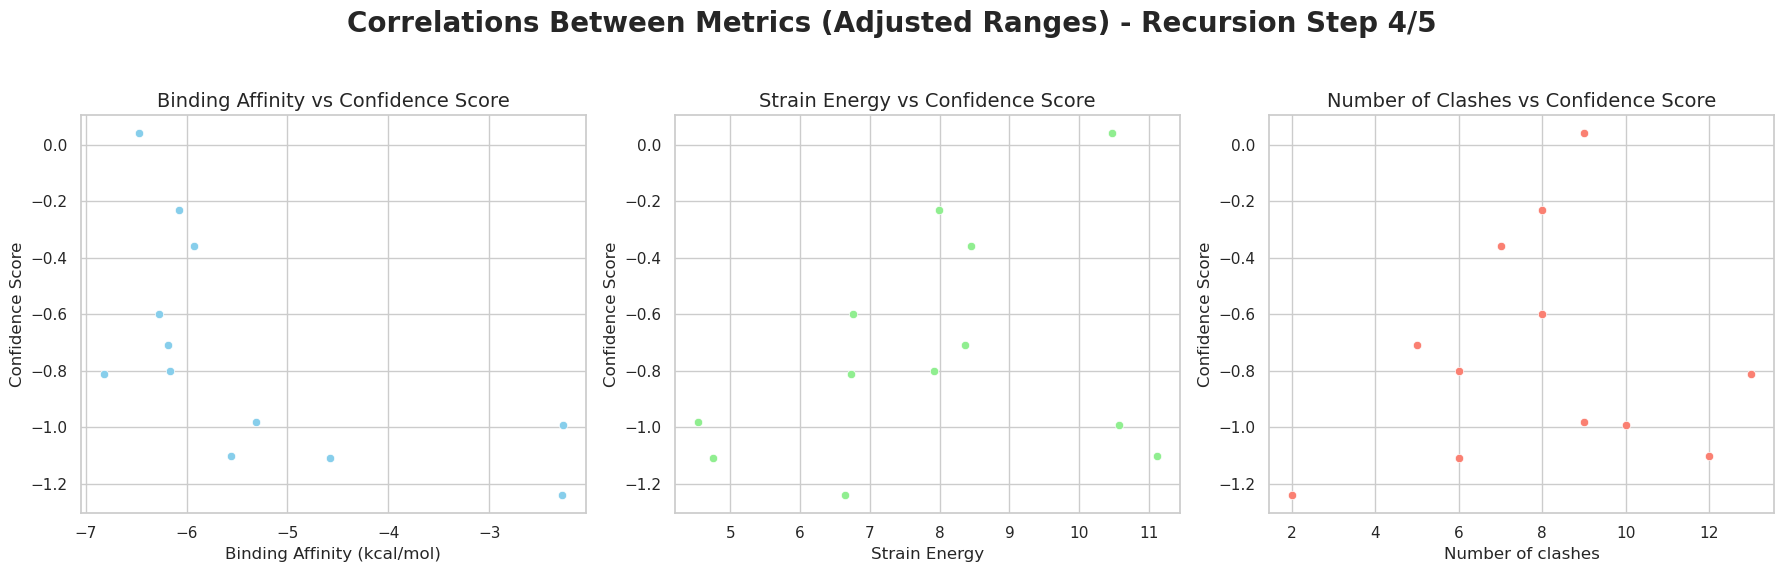

Total number of data points for recursion step 5/5: 11


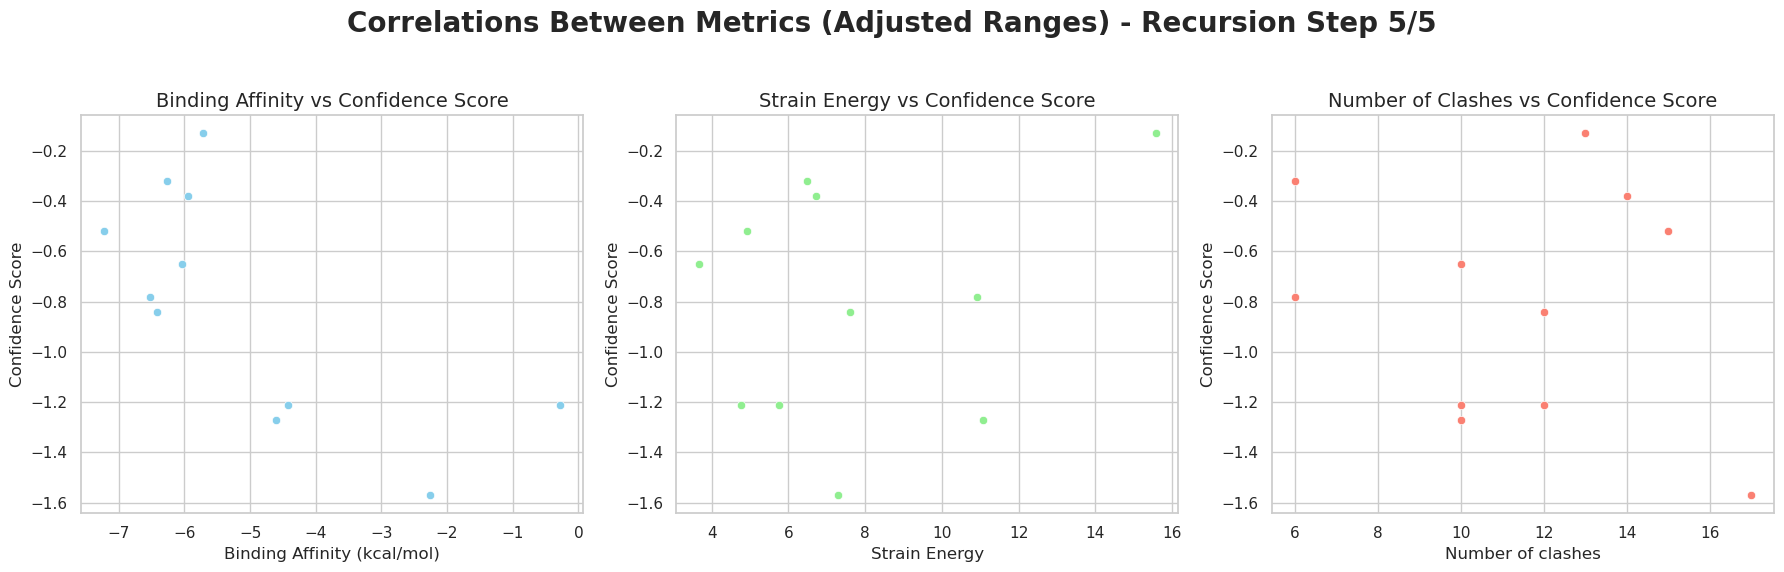

In [7]:

def filter_and_plot_correlations(data, title_suffix):
    # Filter the data for the given ranges
    filtered_data = data[
        (data['Confidence Score'] >= -5) & (data['Confidence Score'] <= 5) &
        (data['Binding Affinity (kcal/mol)'] >= -20) & (data['Binding Affinity (kcal/mol)'] <= 20) &
        (data['Strain Energy'] >= -20) & (data['Strain Energy'] <= 20)
    ]

    # Plotting correlations for the specified pairs of metrics with all adjusted ranges
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f'Correlations Between Metrics (Adjusted Ranges) - {title_suffix}', fontsize=20, fontweight='bold')

    # Binding Affinity (kcal/mol) vs Confidence Score
    sns.scatterplot(data=filtered_data, x='Binding Affinity (kcal/mol)', y='Confidence Score', ax=axes[0], color='skyblue')
    axes[0].set_title('Binding Affinity vs Confidence Score', fontsize=14)

    # Strain Energy vs Confidence Score
    sns.scatterplot(data=filtered_data, x='Strain Energy', y='Confidence Score', ax=axes[1], color='lightgreen')
    axes[1].set_title('Strain Energy vs Confidence Score', fontsize=14)

    # Number of clashes vs Confidence Score
    sns.scatterplot(data=filtered_data, x='Number of clashes', y='Confidence Score', ax=axes[2], color='salmon')
    axes[2].set_title('Number of Clashes vs Confidence Score', fontsize=14)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



# Loop over the recursion steps and apply the filter and plotting function
for step in range(1, 6):
    file_path = f'{base_dir}{output_filename_pattern.format(step)}'
    data = pd.read_csv(file_path)
    num_rows = data.shape[0]  
    print(f'Total number of data points for recursion step {step}/5: {num_rows}')
    filter_and_plot_correlations(data, f'Recursion Step {step}/5')


## Correlation Between Confidence Score vs Physical Scores (Binding Affinity, Strain Energy, Number of Clashes) 

- This is all data with selecting range values 
- Best lines with `R^2` values

Total number of data points for recursion step 1/5: 177


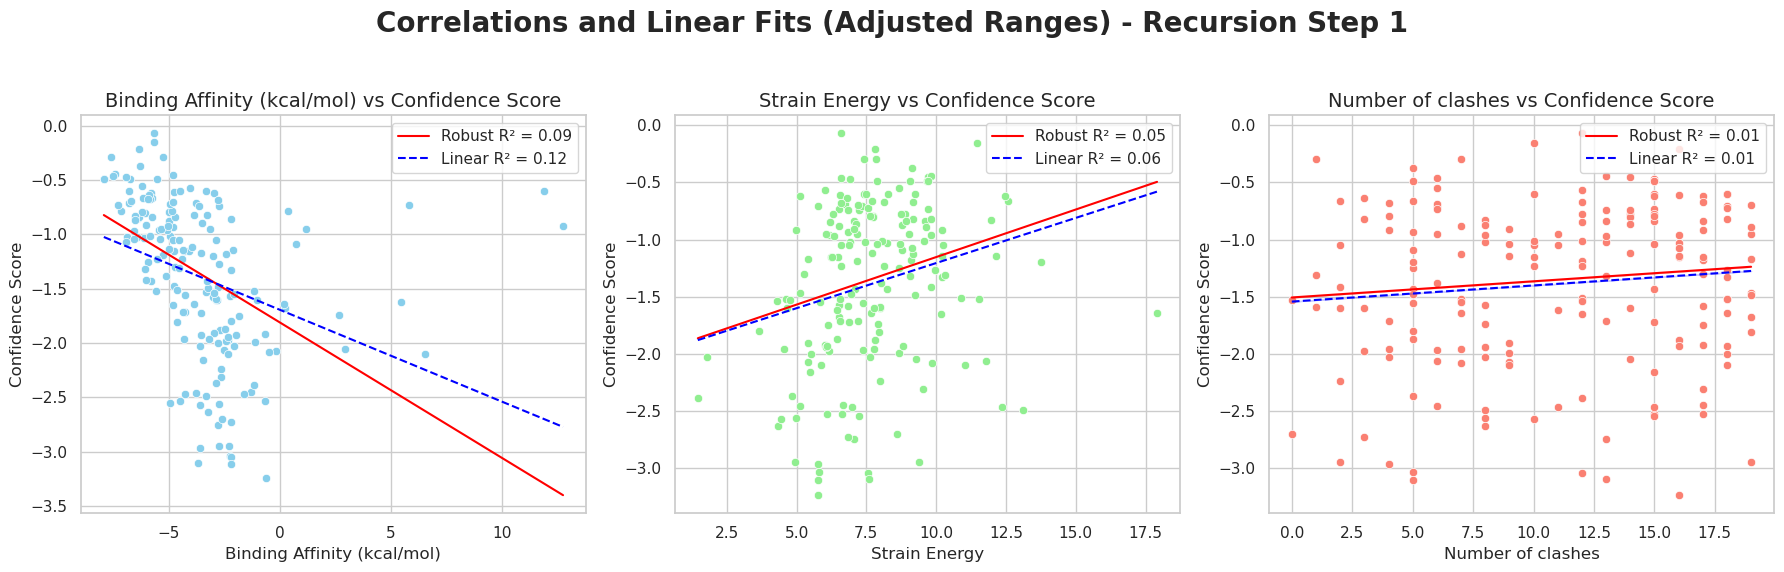

Total number of data points for recursion step 2/5: 34


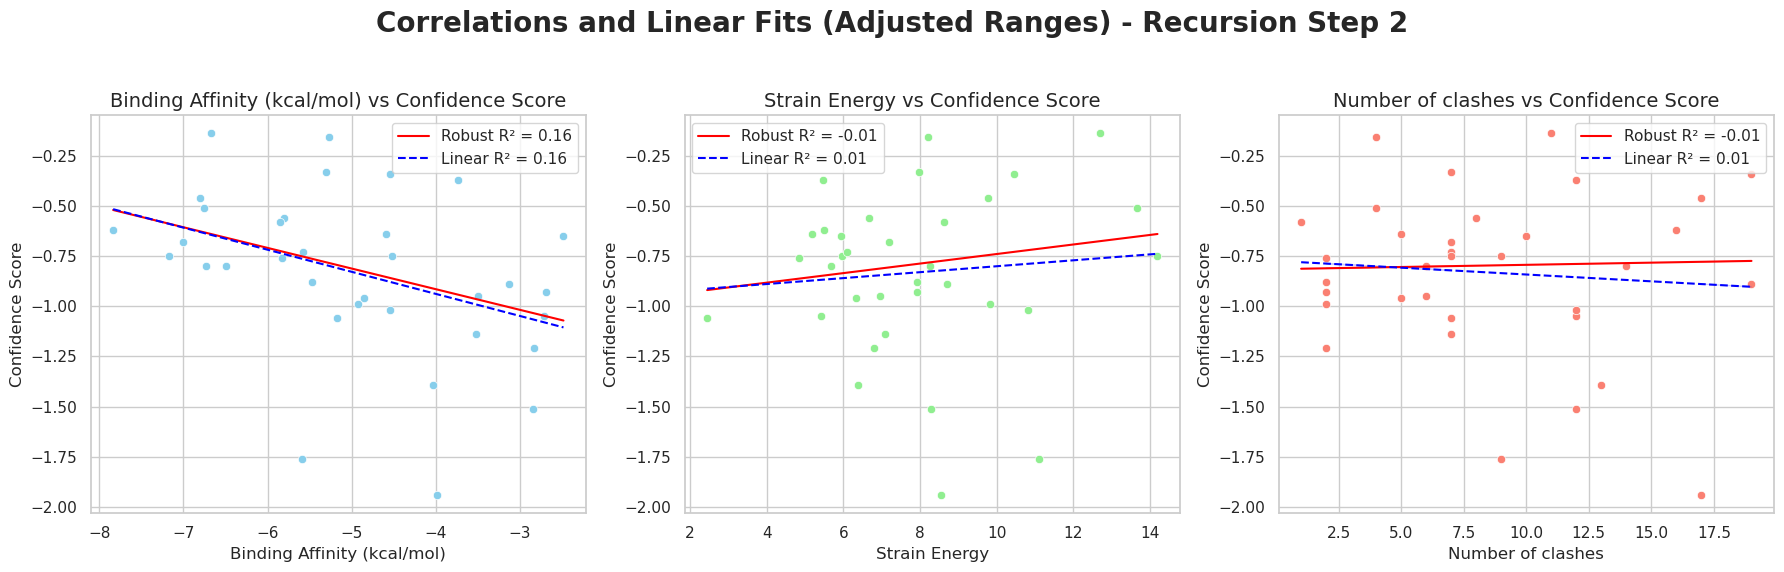

Total number of data points for recursion step 3/5: 20


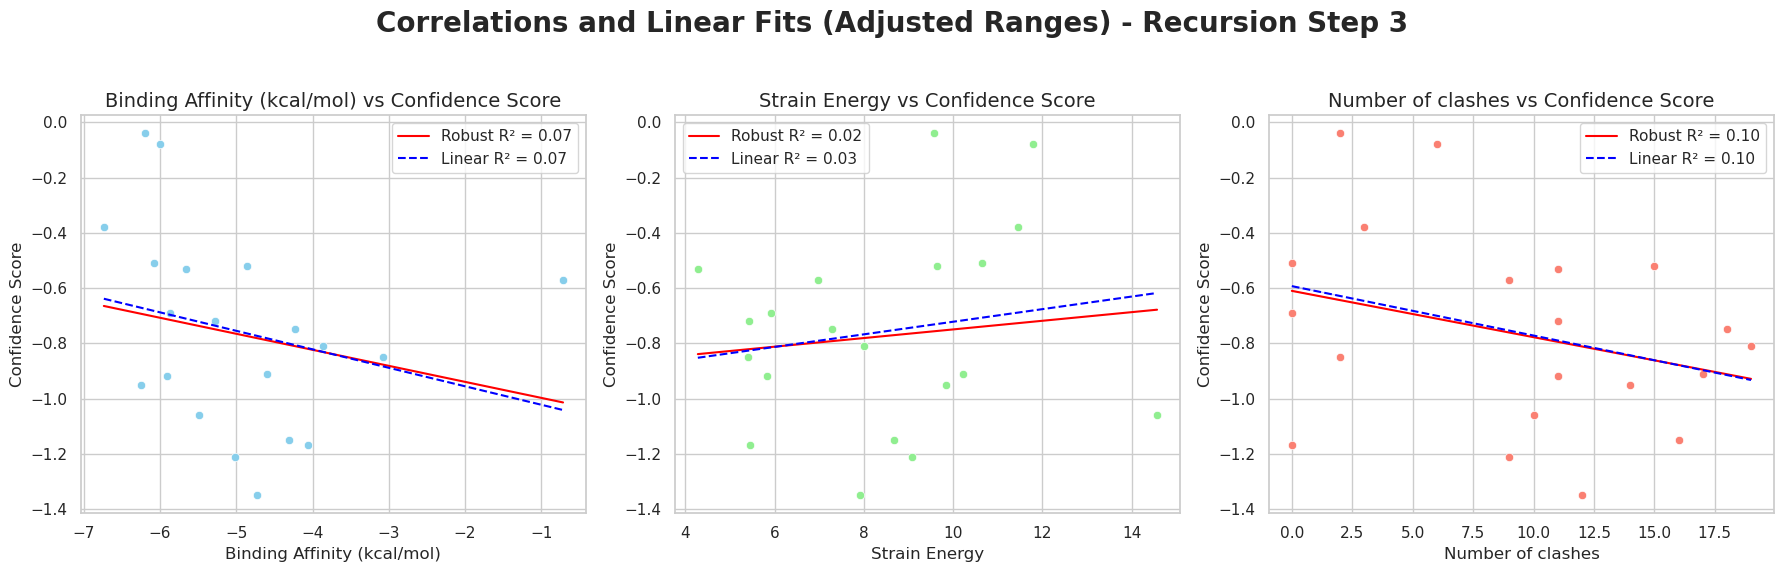

Total number of data points for recursion step 4/5: 12


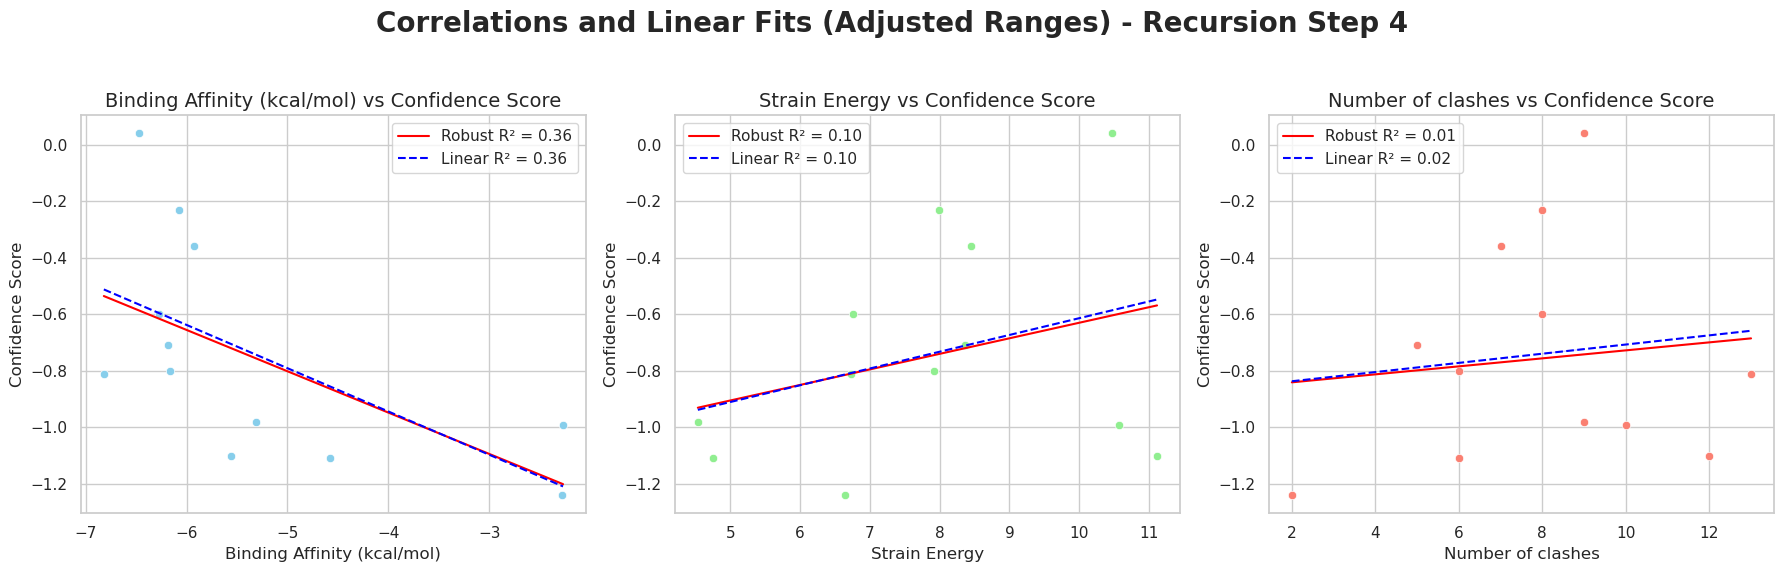

Total number of data points for recursion step 5/5: 11


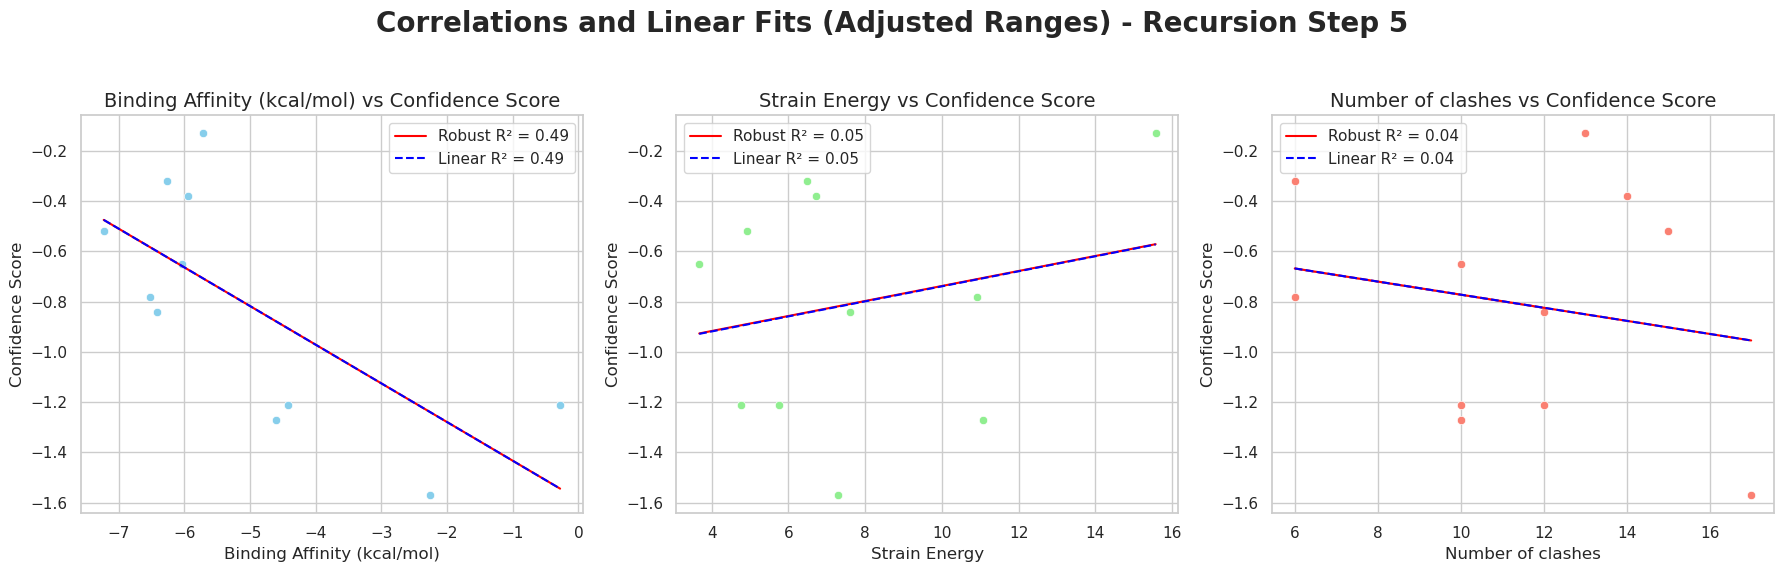

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm

def plot_correlation_with_fit(data, recursion_step):
    # Filter data based on the specified ranges
    filtered_data = data[
        (data['Confidence Score'] >= -5) & (data['Confidence Score'] <= 5) &
        (data['Binding Affinity (kcal/mol)'] >= -20) & (data['Binding Affinity (kcal/mol)'] <= 20) &
        (data['Strain Energy'] >= -20) & (data['Strain Energy'] <= 20)
    ]

    # Preparing the figure
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f'Correlations and Linear Fits (Adjusted Ranges) - Recursion Step {recursion_step}', fontsize=20, fontweight='bold')

    # Defining metrics pairs for correlation
    metrics_pairs = [
        ('Binding Affinity (kcal/mol)', 'Confidence Score'),
        ('Strain Energy', 'Confidence Score'),
        ('Number of clashes', 'Confidence Score')
    ]

    colors = ['skyblue', 'lightgreen', 'salmon']

    for i, (x_metric, y_metric) in enumerate(metrics_pairs):
        # Scatter plot
        sns.scatterplot(data=filtered_data, x=x_metric, y=y_metric, ax=axes[i], color=colors[i])
        
        # Robust linear model
        X = sm.add_constant(filtered_data[x_metric])  # Adding a constant for the intercept
        robust_model = sm.RLM(filtered_data[y_metric], X, M=sm.robust.norms.HuberT())
        robust_results = robust_model.fit()
        
        # Calculate R^2 score for robust model
        y_pred_robust = robust_results.predict(X)
        r2_robust = r2_score(filtered_data[y_metric], y_pred_robust)
        
        # Linear model
        coef = np.polyfit(filtered_data[x_metric], filtered_data[y_metric], 1)
        poly1d_fn = np.poly1d(coef) 
        
        # Calculate R^2 score for linear model
        y_pred_linear = poly1d_fn(filtered_data[x_metric])
        r2_linear = r2_score(filtered_data[y_metric], y_pred_linear)
        
        # Plot robust fit and linear fit
        sns.lineplot(x=filtered_data[x_metric], y=y_pred_robust, ax=axes[i], color='red', label=f'Robust R² = {r2_robust:.2f}')
        sns.lineplot(x=filtered_data[x_metric], y=poly1d_fn(filtered_data[x_metric]), ax=axes[i], color='blue', label=f'Linear R² = {r2_linear:.2f}', linestyle='--')
        
        axes[i].set_title(f'{x_metric} vs {y_metric}', fontsize=14)
        axes[i].set_xlabel(x_metric, fontsize=12)
        axes[i].set_ylabel(y_metric, fontsize=12)
        axes[i].legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Loop over the recursion steps and plot for each step
for step in range(1, 6):
    file_path = f'{base_dir}{output_filename_pattern.format(step)}'
    data = pd.read_csv(file_path)
    num_rows = data.shape[0]  
    print(f'Total number of data points for recursion step {step}/5: {num_rows}')
    plot_correlation_with_fit(data, step)


## Comparison of Same Size Recursived Proteins

Now we are comparising the the Proteins which completed 5/5 Recursion step. First we seperate the results in `Recursion Step Done` values. Each `csv` file must be same number of `Protein ID`!

In [9]:
def filter_data_for_recursion_step(recursion_step, base_dir, filtered_proteins_file, summary_file_template, output_file_template):
    # Load the file with filtered Protein IDs
    filtered_proteins_df = pd.read_csv(filtered_proteins_file)
    filtered_proteins = filtered_proteins_df['Protein ID']
    
    # Format the file name for the current recursion step
    summary_file_path = summary_file_template.format(recursion_step)
    
    # Load the summary data for the current recursion step
    summary_data = pd.read_csv(summary_file_path)

    filtered_data = data[
        (data['Recursion Step Done'] == recursion_step) &
        (data['Binding Affinity (kcal/mol)'] < 20) &
        (data['Number of clashes'] < 20) &
        (data['Strain Energy'] < 20) &
        (data['Confidence Score'] > -10)
    ]
    
    # Filter the summary data for the current recursion step
    filtered_summary_new = summary_data[summary_data['Protein ID'].isin(filtered_proteins) & 
        (summary_data['Recursion Step Done'] == f'{recursion_step}/5') & 
        (summary_data['Binding Affinity (kcal/mol)'] < 1000)
        
        ]
    
    # Save the filtered data to a new CSV file
    output_file_path = output_file_template.format(recursion_step)
    filtered_summary_new.to_csv(output_file_path, index=False)
    
    print(f"Filtered data for recursion step {recursion_step}/5 saved to: {output_file_path}")

# Base directory and file patterns
base_dir = '/fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/DOCKGEN/data/'
filtered_proteins_file = base_dir + 'filtered_summary_new_rec_5.csv'
summary_file_template = base_dir + 'summary_new.csv' 
output_file_template = base_dir + 'filtered_proteins_from_summary_rec{}.csv'

# Loop through each recursion step
for step in range(1, 6):
    filter_data_for_recursion_step(step, base_dir, filtered_proteins_file, summary_file_template, output_file_template)


Filtered data for recursion step 1/5 saved to: /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/DOCKGEN/data/filtered_proteins_from_summary_rec1.csv
Filtered data for recursion step 2/5 saved to: /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/DOCKGEN/data/filtered_proteins_from_summary_rec2.csv
Filtered data for recursion step 3/5 saved to: /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/DOCKGEN/data/filtered_proteins_from_summary_rec3.csv
Filtered data for recursion step 4/5 saved to: /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/DOCKGEN/data/filtered_proteins_from_summary_rec4.csv
Filtered data for recursion step 5/5 saved to: /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/DOCKGEN/data/filtered_proteins_from_summary_rec5.csv


## Read Each Seperated Files (Each Shows Recursion Steps)

In [10]:
# Loop over the recursion steps and read each file
for step in range(1, 6):
    file_path = f'{output_file_template.format(step)}'
    data = pd.read_csv(file_path)
    num_rows = data.shape[0]  
    print(f'Total number of data points for recursion step {step}/5: {num_rows}')
    print(f'First few rows of the dataframe for recursion step {step}/5:')
    display(data.head())

Total number of data points for recursion step 1/5: 14
First few rows of the dataframe for recursion step 1/5:


Protein ID Recursion Step Done  Ligand Description  \
0  1lri_1_CLR_0_protein_processed                 1/5                 NaN   
1  1hw8_1_114_1_protein_processed                 1/5                 NaN   
2  6u1v_1_FDA_2_protein_processed                 1/5                 NaN   
3  5f52_1_ASP_2_protein_processed                 1/5                 NaN   
4  1lri_1_CLR_0_protein_processed                 1/5                 NaN   

   Binding Affinity (kcal/mol)  Number of clashes  Strain Energy  \
0                    -6.286836                  5       9.124463   
1                    -5.243455                  1       7.419965   
2                    -6.756535                  5       9.045757   
3                    -4.080300                 10       6.276814   
4                    -6.801621                  6       7.348484   

   Confidence Score            Rank of sdf    _timestamp   _runtime  _step  
0             -0.37  rank1_confidence-0.37  1.712993e+09  26.489006      8  
1             -0.29  rank1_confidence-0.29  1.712992e+09  53.904696      8  
2             -0.49  rank1_confidence-0.49  1.713020e+09  93.840793      8  
3             -1.15  rank1_confidence-1.15  1.713021e+09  30.951948      8  
4             -0.71  rank1_confidence-0.71  1.713020e+09  14.092745      8

Total number of data points for recursion step 2/5: 12
First few rows of the dataframe for recursion step 2/5:


Protein ID Recursion Step Done  \
0  5f52_1_ASP_2_protein_processed                 2/5   
1  1lri_1_CLR_0_protein_processed                 2/5   
2  6npp_1_KWG_0_protein_processed                 2/5   
3  1hw8_1_114_1_protein_processed                 2/5   
4  1lri_1_CLR_0_protein_processed                 2/5   

                                  Ligand Description  \
0  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
1  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
2  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
3  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
4  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   

   Binding Affinity (kcal/mol)  Number of clashes  Strain Energy  \
0                    -4.030397                 13       6.372906   
1                    -5.825592                  2       4.848598   
2                    -2.695374                  2       7.909430   
3                    -5.264767                  4       8.210662   
4                    -6.998493                  7       7.186073   

   Confidence Score            Rank of sdf    _timestamp   _runtime  _step  
0             -1.39  rank1_confidence-1.39  1.712993e+09  19.894832      8  
1             -0.76  rank1_confidence-0.76  1.713020e+09  12.659541      8  
2             -0.93  rank1_confidence-0.93  1.713023e+09  28.185075      8  
3             -0.16  rank1_confidence-0.16  1.712992e+09  30.890568      8  
4             -0.68  rank1_confidence-0.68  1.712993e+09  25.010250      8

Total number of data points for recursion step 3/5: 11
First few rows of the dataframe for recursion step 3/5:


Protein ID Recursion Step Done  \
0  1lri_1_CLR_0_protein_processed                 3/5   
1  1lri_1_CLR_0_protein_processed                 3/5   
2  1hw8_1_114_1_protein_processed                 3/5   
3  3pfd_1_FDA_2_protein_processed                 3/5   
4  6u1v_1_FDA_2_protein_processed                 3/5   

                                  Ligand Description  \
0  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
1  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
2  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
3  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
4  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   

   Binding Affinity (kcal/mol)  Number of clashes  Strain Energy  \
0                    -6.079165                  0      10.640166   
1                    -5.868040                  0       5.918062   
2                    -6.007771                  6      11.782120   
3                    -5.654951                 11       4.281226   
4                    -6.738001                  3      11.454404   

   Confidence Score            Rank of sdf    _timestamp   _runtime  _step  
0             -0.51  rank1_confidence-0.51  1.713020e+09  12.363924      8  
1             -0.69  rank1_confidence-0.69  1.712993e+09  25.078101      8  
2             -0.08  rank1_confidence-0.08  1.712992e+09  31.529091      8  
3             -0.53  rank1_confidence-0.53  1.712909e+09  19.592890      8  
4             -0.38  rank1_confidence-0.38  1.713021e+09  40.600553      8

Total number of data points for recursion step 4/5: 11
First few rows of the dataframe for recursion step 4/5:


Protein ID Recursion Step Done  \
0  1lri_1_CLR_0_protein_processed                 4/5   
1  6a71_1_9UX_0_protein_processed                 4/5   
2  1hw8_1_114_1_protein_processed                 4/5   
3  1hw8_1_114_1_protein_processed                 4/5   
4  6npp_1_KWG_0_protein_processed                 4/5   

                                  Ligand Description  \
0  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
1  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
2  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
3  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
4  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   

   Binding Affinity (kcal/mol)  Number of clashes  Strain Energy  \
0                    -6.169537                  6       7.919793   
1                    -2.279460                  2       6.646723   
2                    -6.073555                  8       7.993691   
3                    -6.468828                  9      10.466882   
4                    -2.267012                 10      10.570856   

   Confidence Score            Rank of sdf    _timestamp   _runtime  _step  
0             -0.80  rank1_confidence-0.80  1.712993e+09  26.409189      8  
1             -1.24  rank1_confidence-1.24  1.713021e+09  26.610418      8  
2             -0.23  rank1_confidence-0.23  1.712992e+09  32.374939      8  
3              0.04   rank1_confidence0.04  1.713020e+09  18.141228      8  
4             -0.99  rank1_confidence-0.99  1.713023e+09  29.451355      8

Total number of data points for recursion step 5/5: 11
First few rows of the dataframe for recursion step 5/5:


Protein ID Recursion Step Done  \
0      5f52_1_ASP_2_protein_processed                 5/5   
1      3pfd_1_FDA_2_protein_processed                 5/5   
2      1hw8_1_114_1_protein_processed                 5/5   
3      1lri_1_CLR_0_protein_processed                 5/5   
4  5jbf_1_GLC-GLC_0_protein_processed                 5/5   

                                  Ligand Description  \
0  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
1  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
2  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
3  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   
4  /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/FA...   

   Binding Affinity (kcal/mol)  Number of clashes  Strain Energy  \
0                    -4.429020                 10       4.768540   
1                    -6.270607                  6       6.471435   
2                    -5.951319                 14       6.704703   
3                    -6.412635                 12       7.615995   
4                    -4.604225                 10      11.079437   

   Confidence Score            Rank of sdf    _timestamp   _runtime  _step  
0             -1.21  rank1_confidence-1.21  1.713021e+09  17.919346      8  
1             -0.32  rank1_confidence-0.32  1.712909e+09  20.762196      8  
2             -0.38  rank1_confidence-0.38  1.712992e+09  22.752548      8  
3             -0.84  rank1_confidence-0.84  1.713020e+09  13.058612      8  
4             -1.27  rank1_confidence-1.27  1.712995e+09  25.538023      8

## Data Distributions of Each Recursive Step

Total number of data points for recursion step 1/5: 14


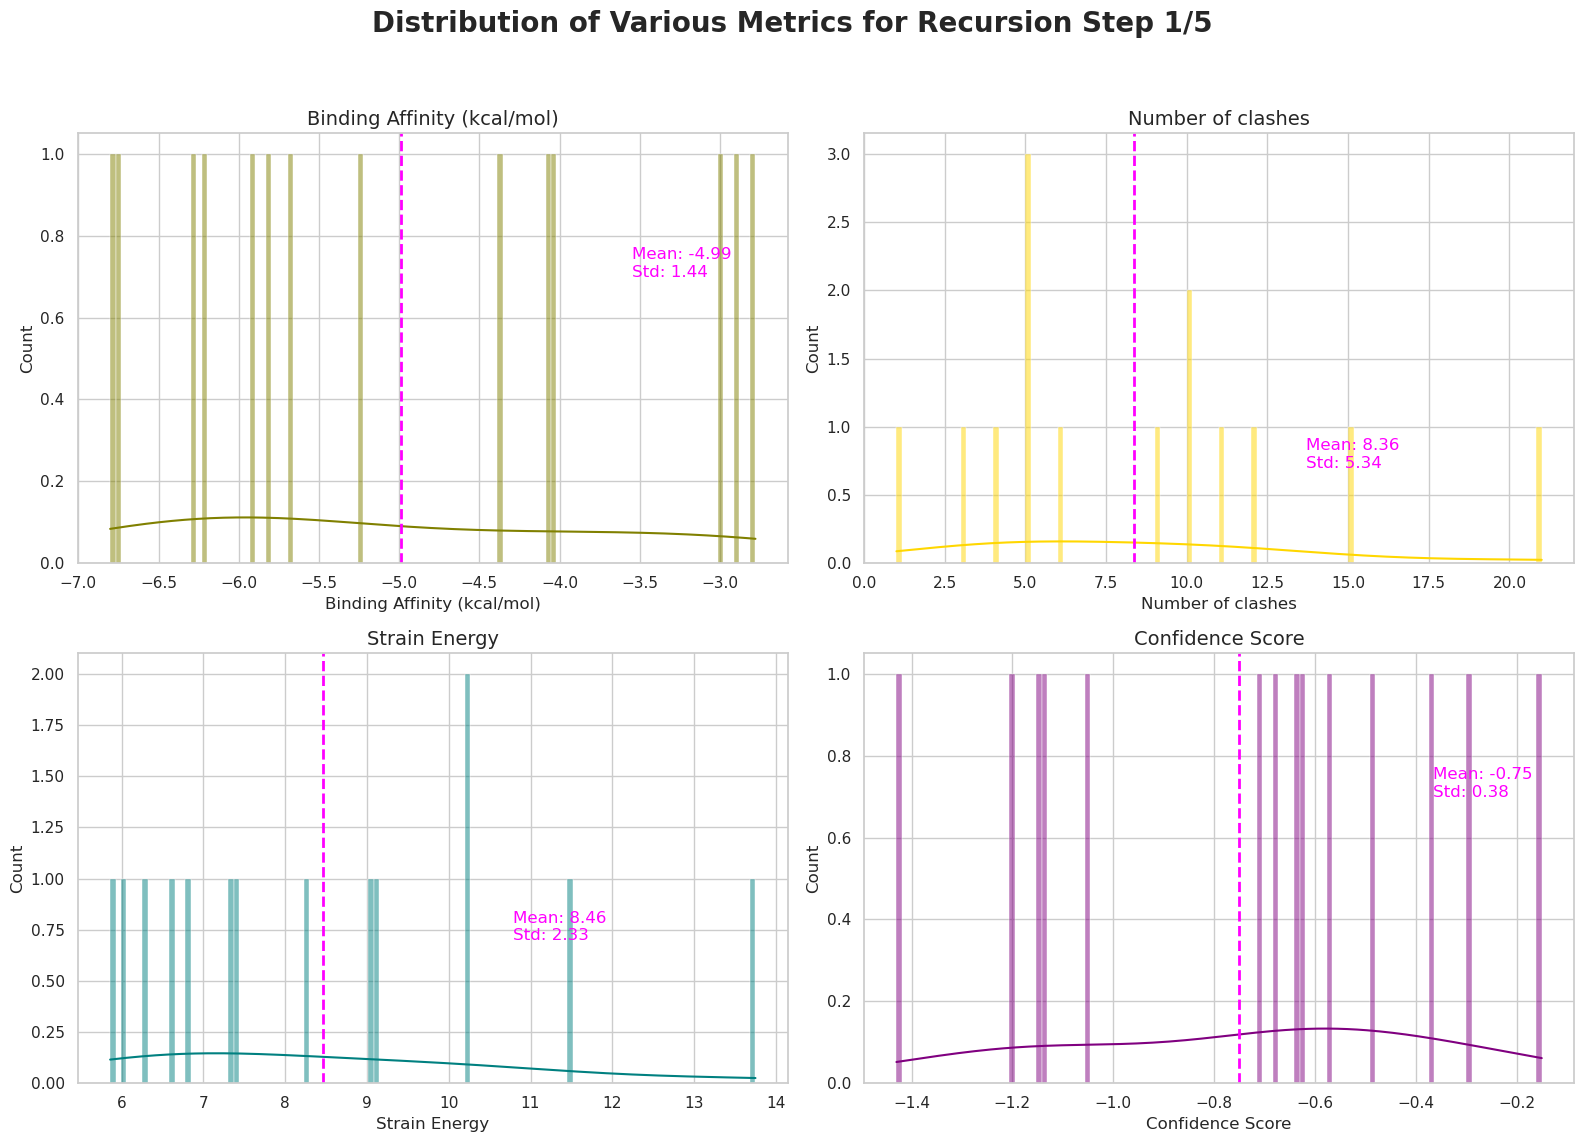

Total number of data points for recursion step 2/5: 12


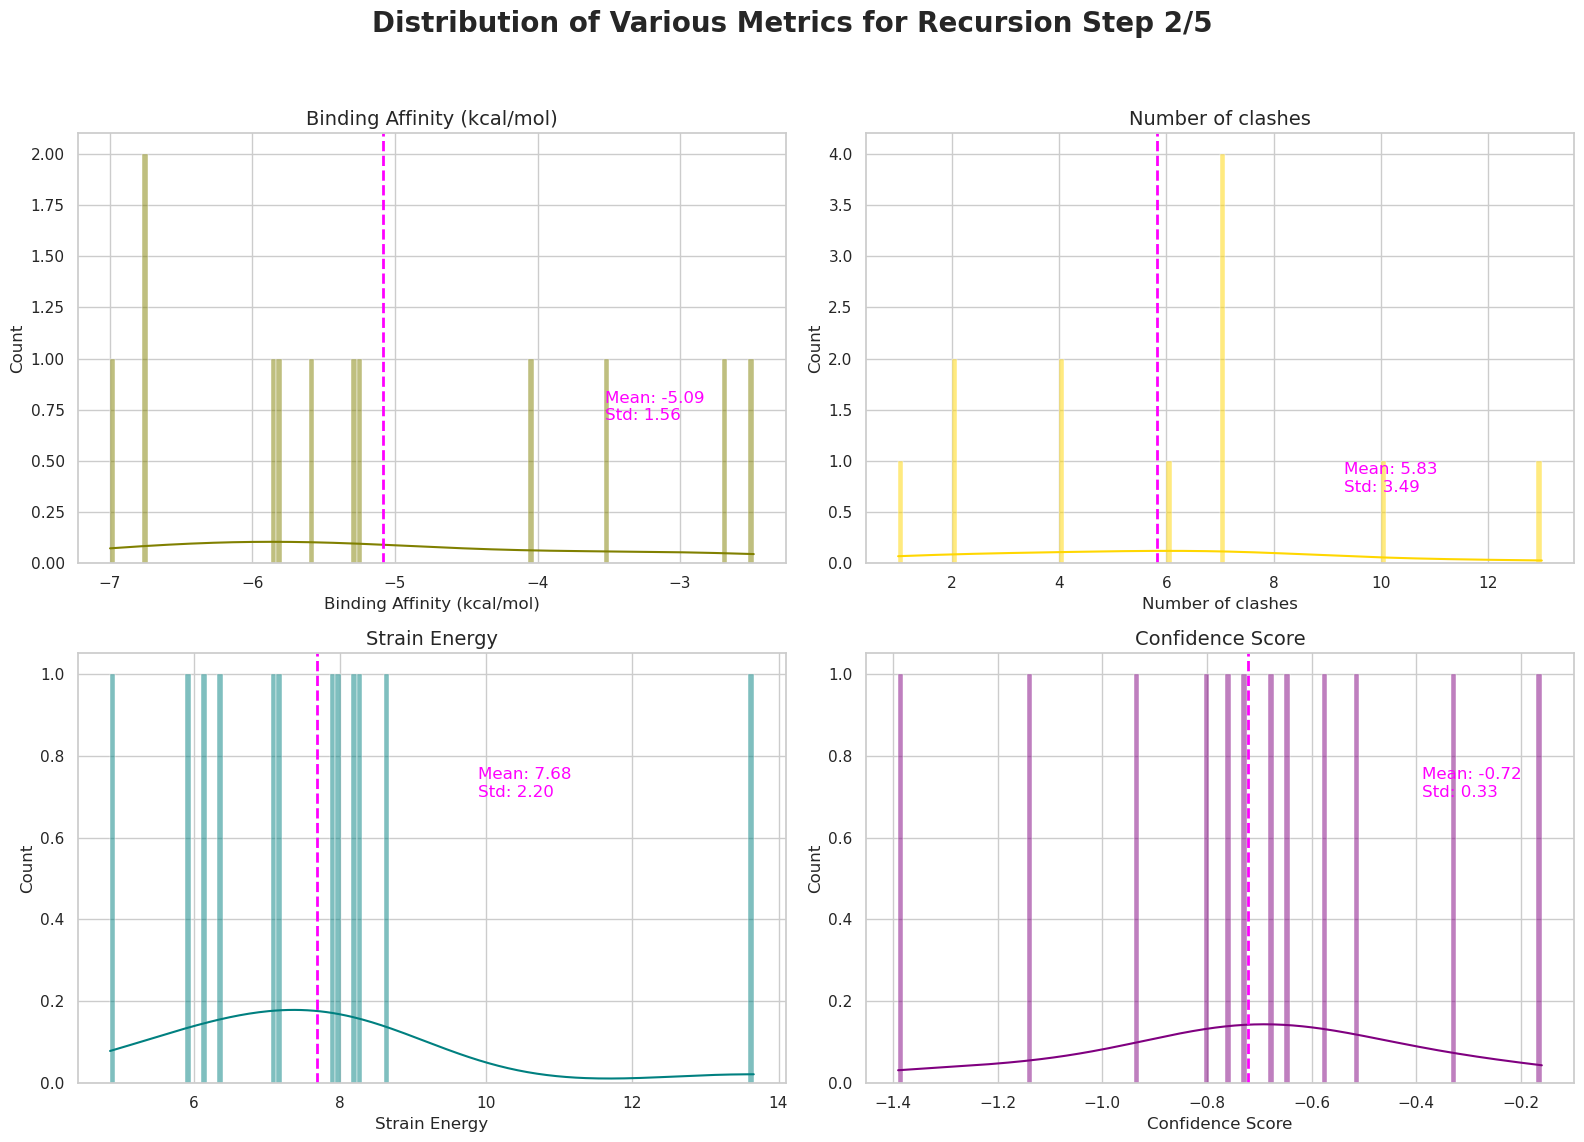

Total number of data points for recursion step 3/5: 11


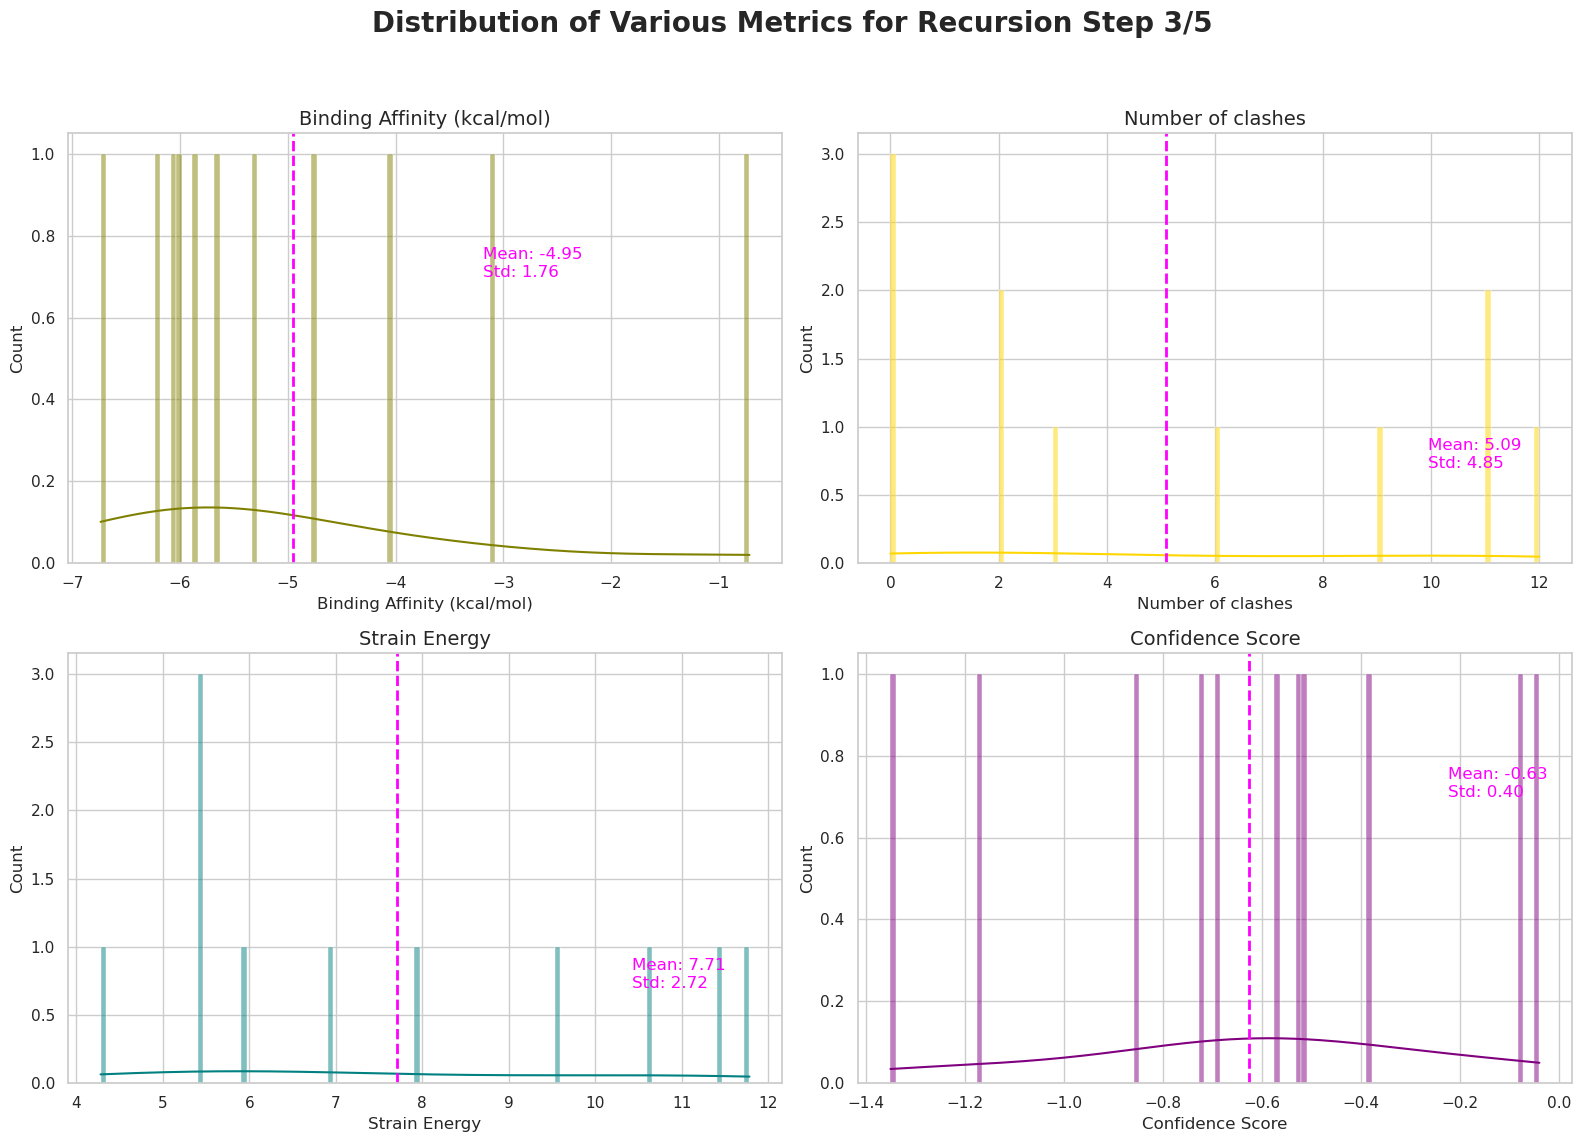

Total number of data points for recursion step 4/5: 11


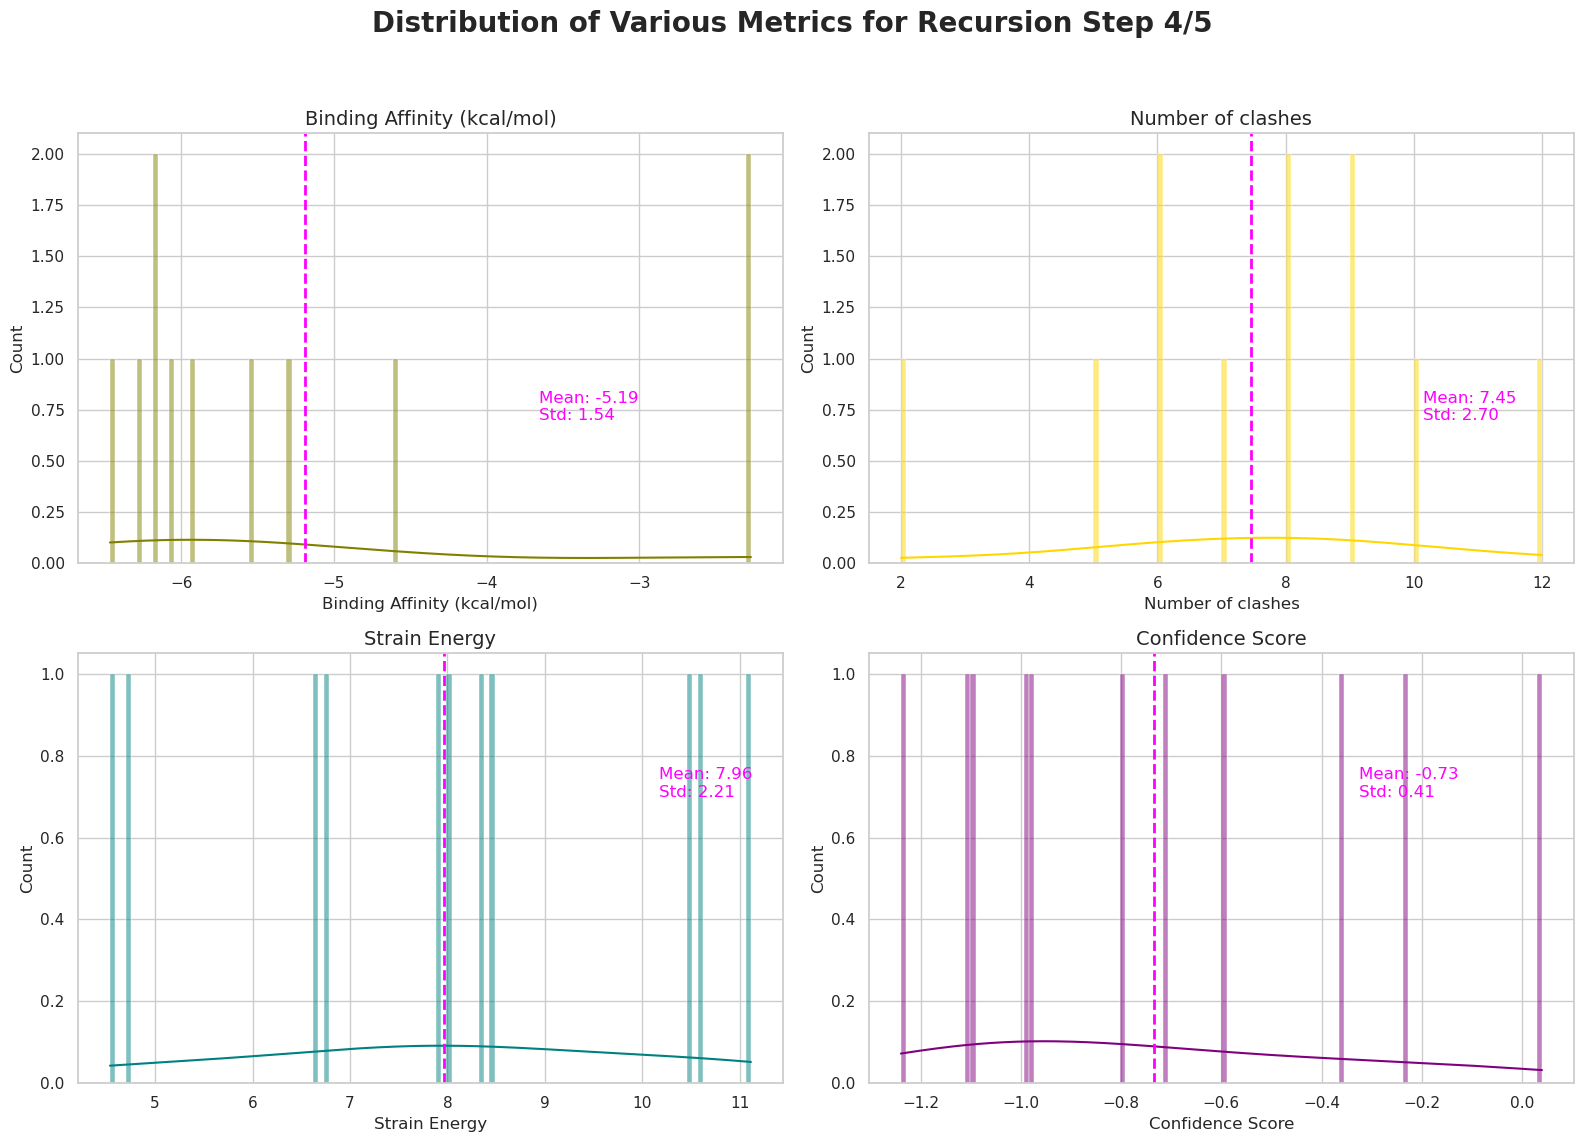

Total number of data points for recursion step 5/5: 11


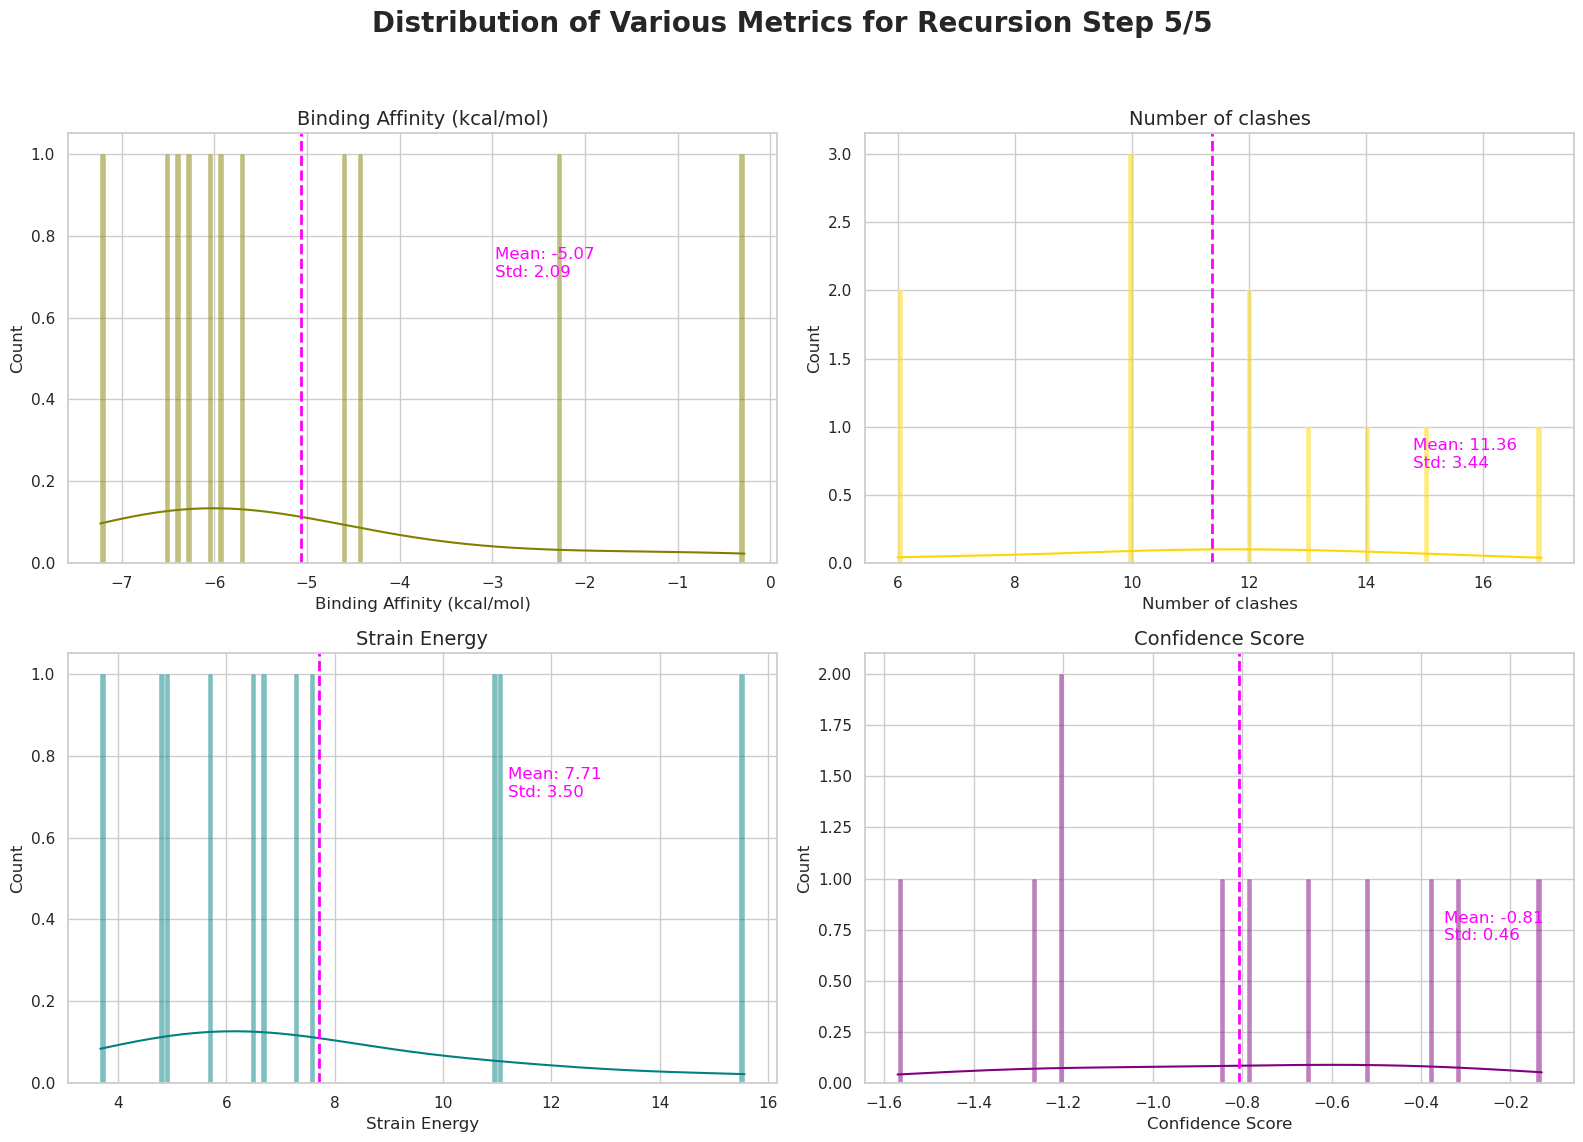

In [11]:
# Function to plot distributions of metrics from a given dataset
def plot_metrics_distributions(data, figure_title):
    # Set the overall aesthetics
    sns.set(style="whitegrid", palette="pastel")

    # Prepare the figure with a larger size for better readability
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # Increased figure size for better legibility
    fig.suptitle(figure_title, fontsize=20, fontweight='bold')

    # Define a common bin size for comparable scales
    common_bins = 120  # Example bin size, adjust based on your data distribution

    # List of metrics to plot
    metrics = ['Binding Affinity (kcal/mol)', 'Number of clashes', 'Strain Energy', 'Confidence Score']
    colors = ['olive', 'gold', 'teal', 'purple']

    # Plotting distributions
    for i, metric in enumerate(metrics):
        ax = axes.flat[i]
        sns.histplot(data=data, x=metric, kde=True, ax=ax, color=colors[i], bins=common_bins)
        ax.set_title(metric, fontsize=14)
        ax.grid(True)

        # Calculate mean and std, and annotate on the plots
        mean_value = data[metric].mean()
        std_value = data[metric].std()
        ax.axvline(mean_value, color='magenta', linestyle='dashed', linewidth=2)
        ax.text(mean_value + std_value, 0.7, f'Mean: {mean_value:.2f}\nStd: {std_value:.2f}', color='magenta', ha='left')

    # Adjust layout for a clean look and ensure the titles and labels don't overlap
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Show plot
    plt.show()


# Loop over the recursion steps and plot for each step
for step in range(1, 6):
    file_path = f'{output_file_template.format(step)}'
    data = pd.read_csv(file_path)
    num_rows = data.shape[0]  
    print(f'Total number of data points for recursion step {step}/5: {num_rows}')
    plot_metrics_distributions(data, f'Distribution of Various Metrics for Recursion Step {step}/5')


## Data Distribution Ranges of Each Recursive Step

Total number of data points for recursion step 1/5: 14


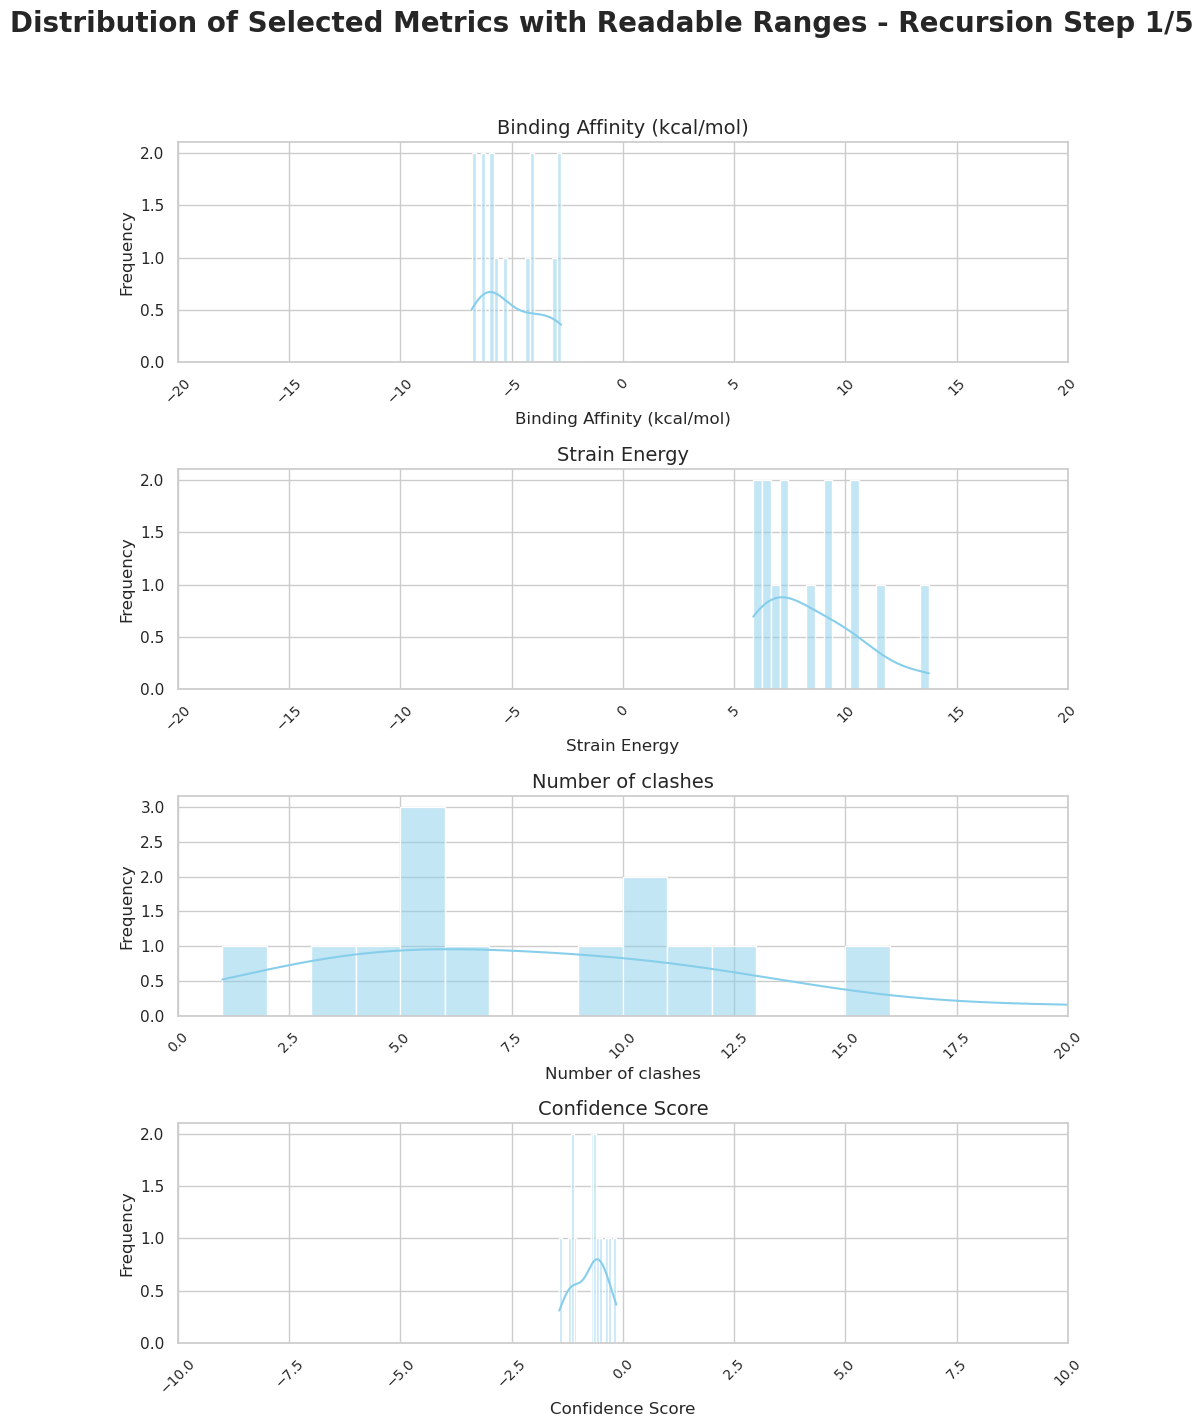

Total number of data points for recursion step 2/5: 12


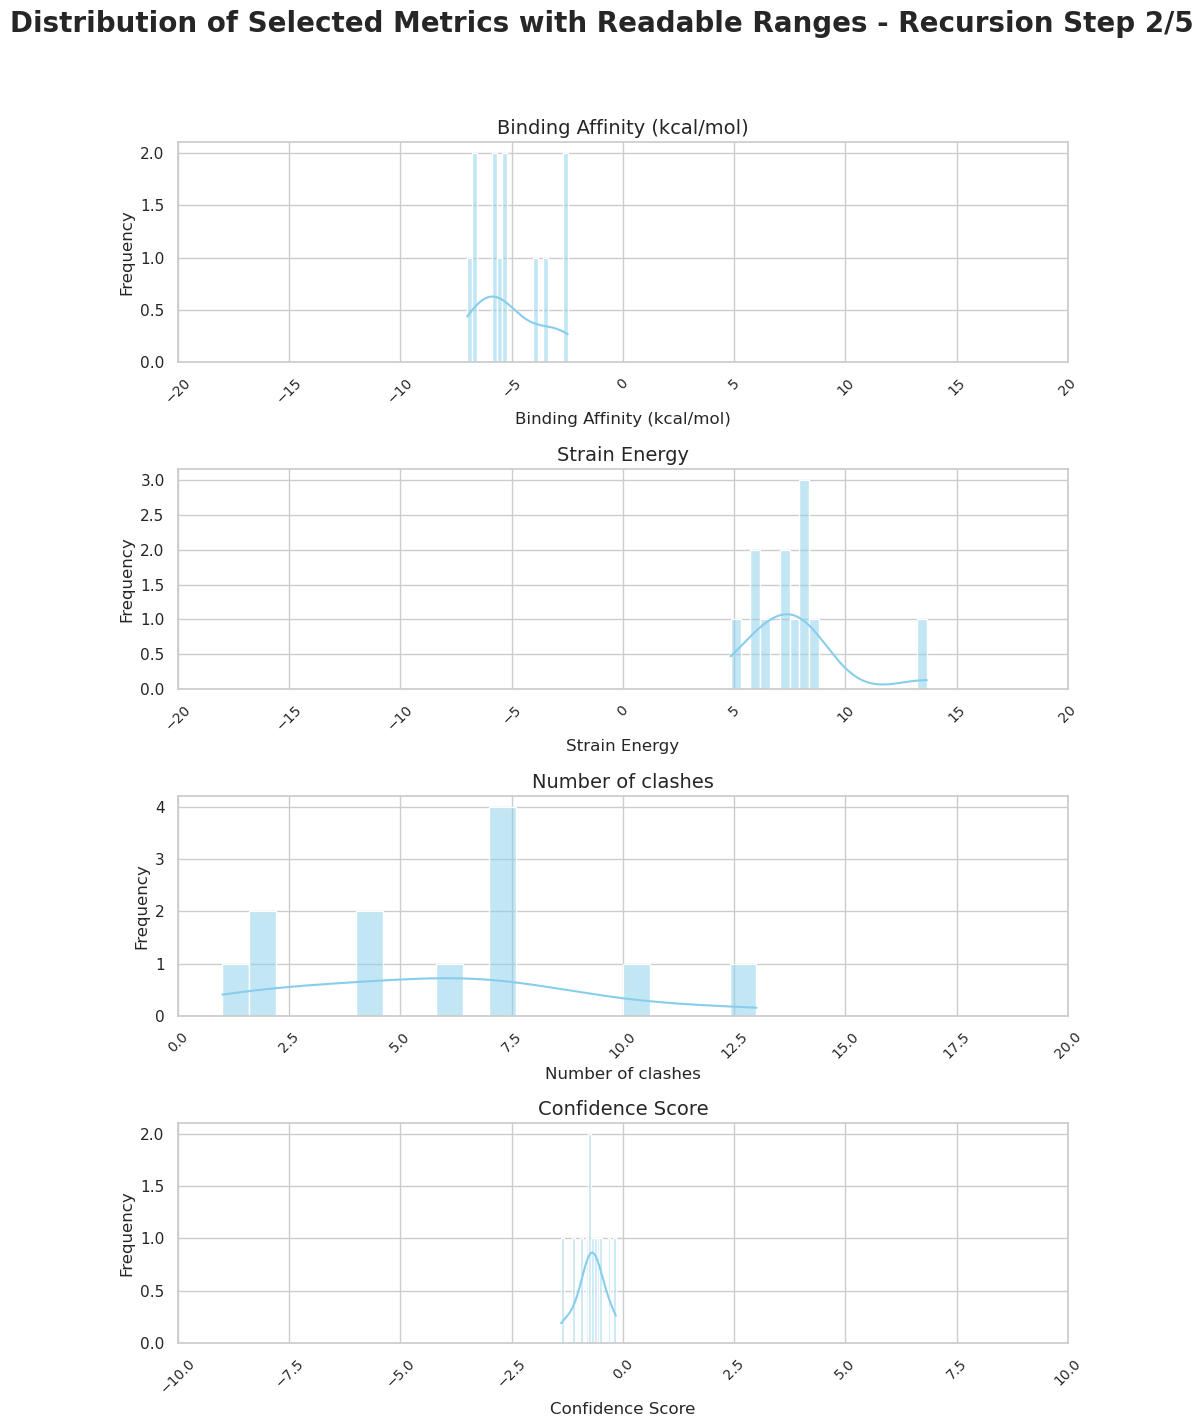

Total number of data points for recursion step 3/5: 11


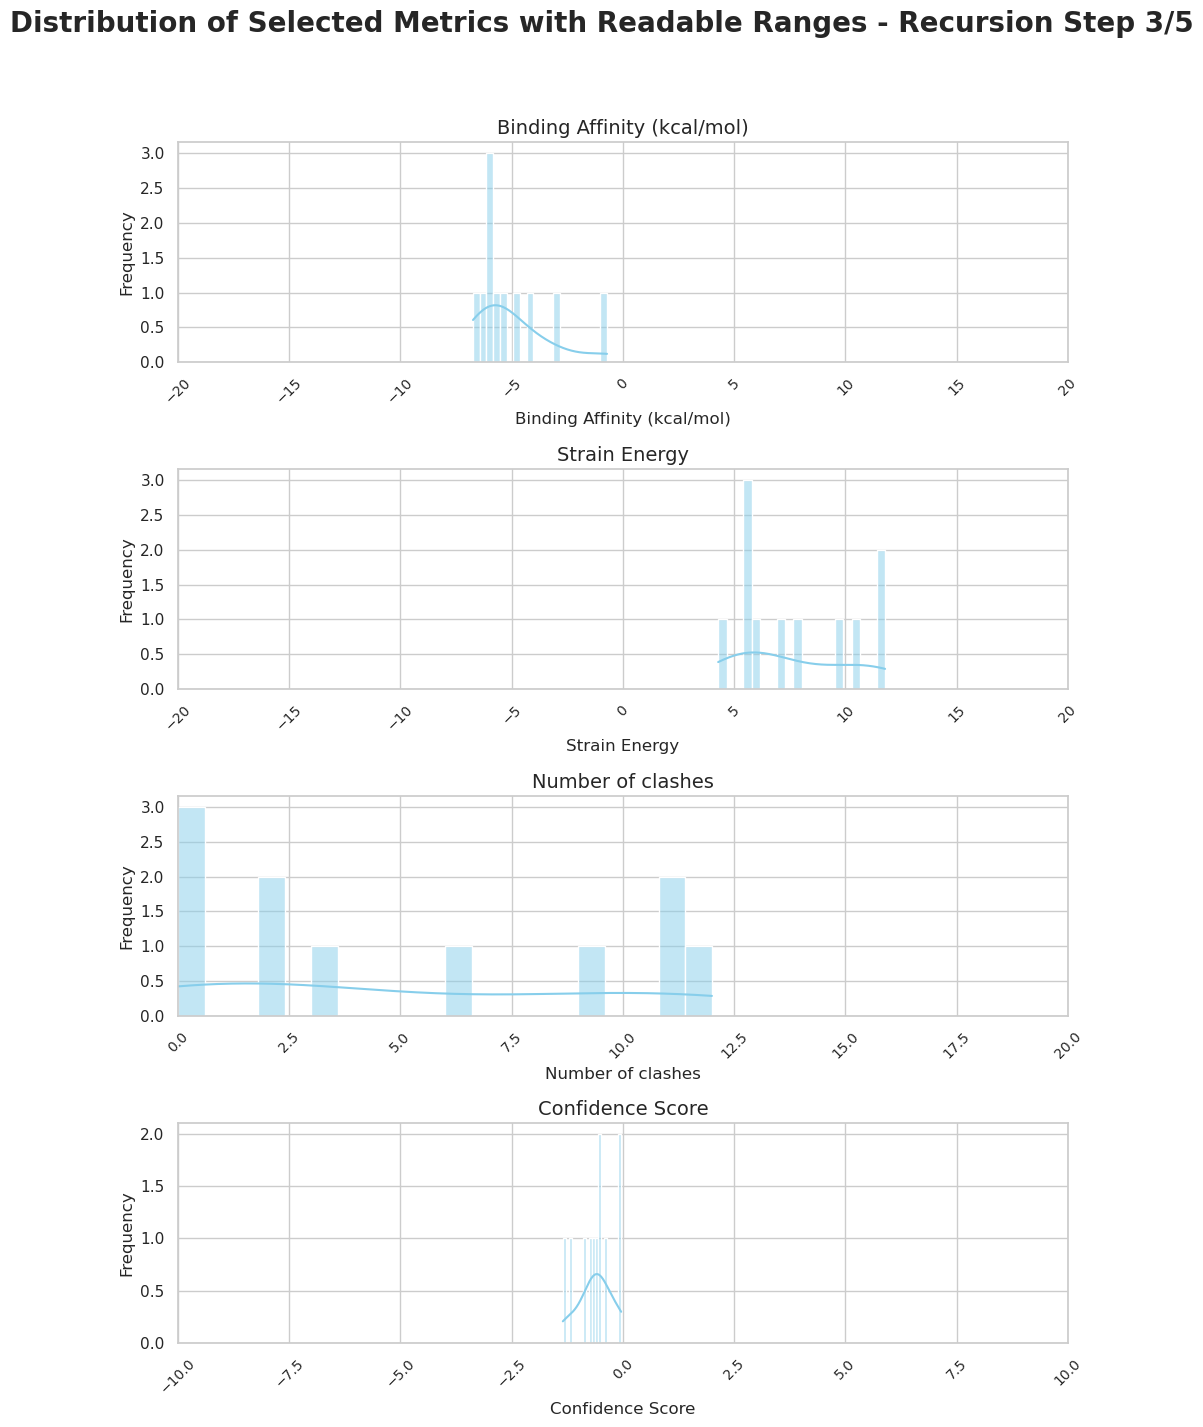

Total number of data points for recursion step 4/5: 11


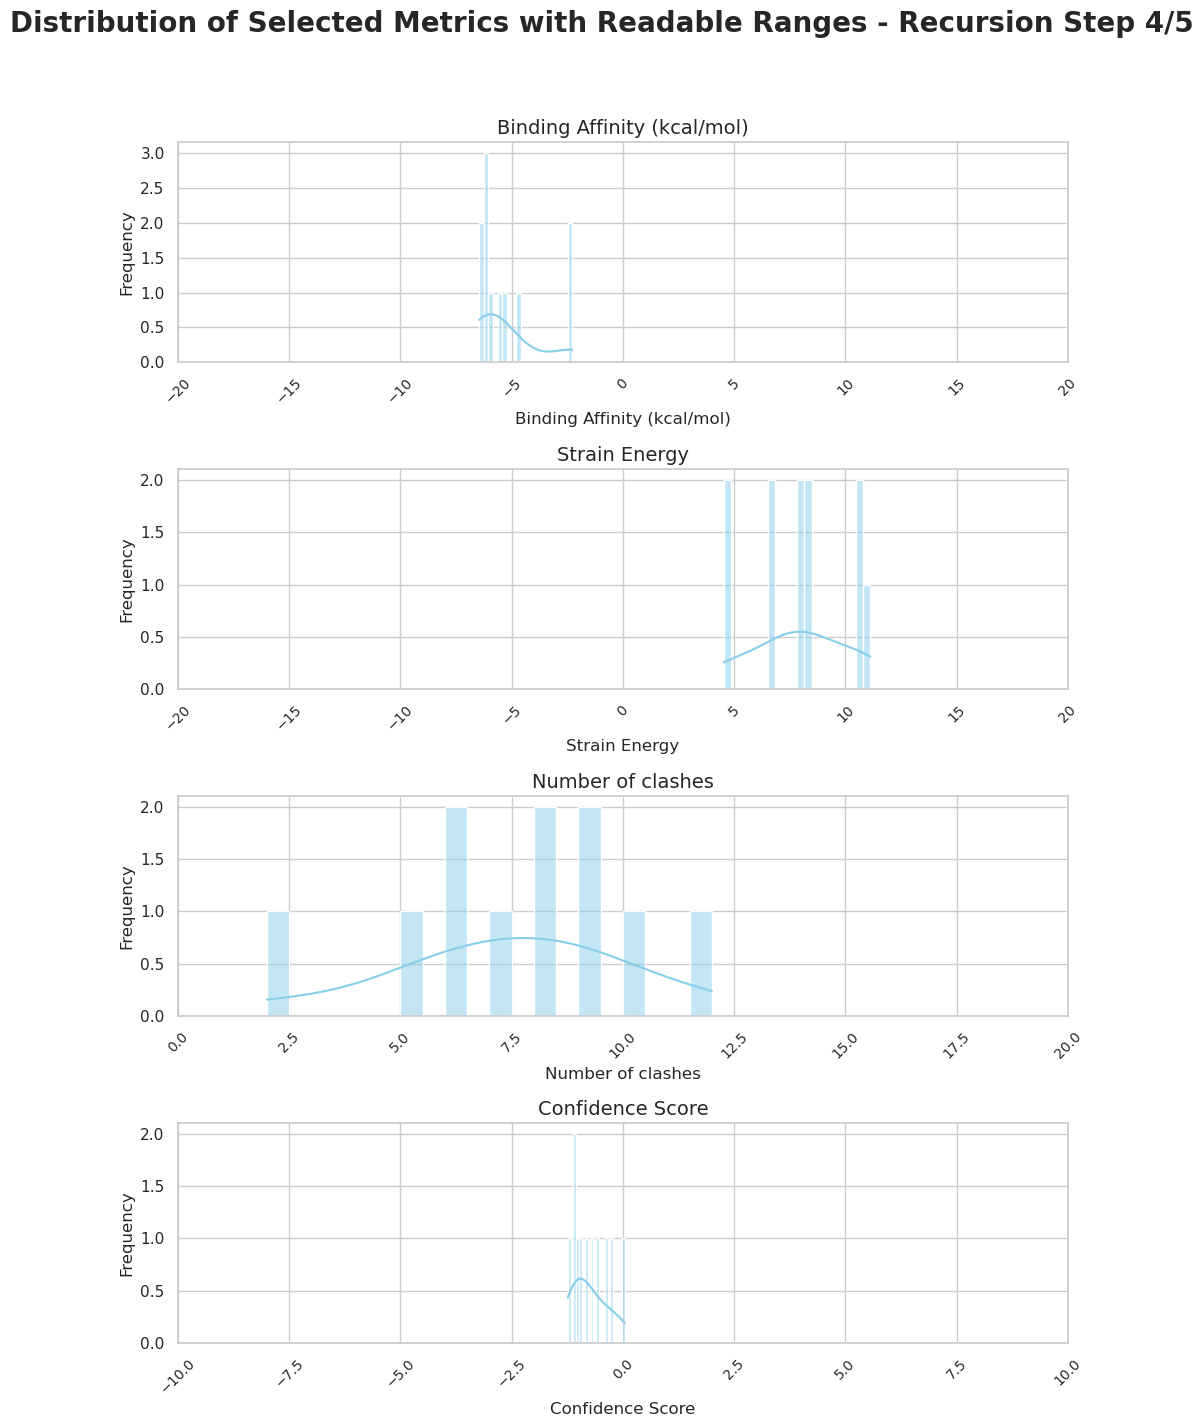

Total number of data points for recursion step 5/5: 11


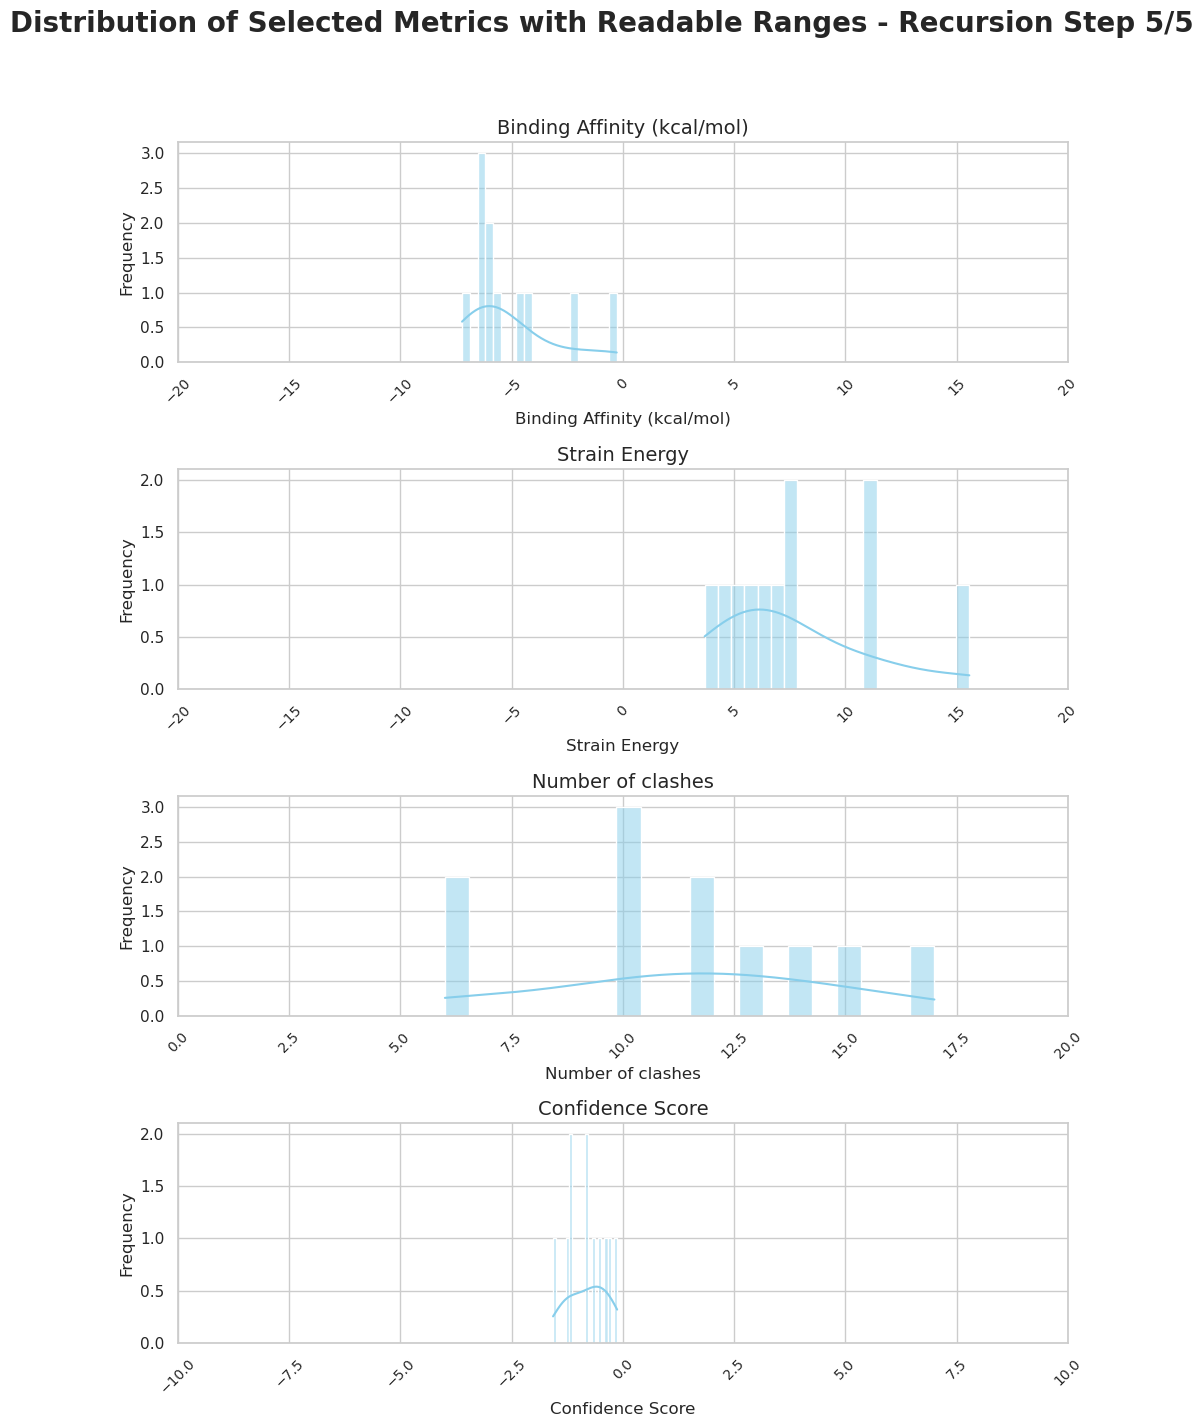

In [12]:
# Function to plot histograms with readable ranges for a given dataset
def plot_histograms_with_readable_ranges(data, title_suffix):
    # Enhancing overall aesthetics
    sns.set(style="whitegrid", palette="pastel")

    # Initializing a larger figure for clearer detail
    fig, axes = plt.subplots(4, 1, figsize=(10, 15))  # Using a vertical layout for better x-axis label readability

    # Titles and customization for improved readability
    fig.suptitle(f'Distribution of Selected Metrics with Readable Ranges - {title_suffix}', fontsize=20, fontweight='bold')

    # Adjusting bin sizes and x-axis limits for clarity
    metrics_info = {
        'Binding Affinity (kcal/mol)': {'bins': 20, 'ax': axes[0], 'xlim': (-20, 20)},
        'Strain Energy': {'bins': 20, 'ax': axes[1], 'xlim': (-20, 20)},
        'Number of clashes': {'bins': 20, 'ax': axes[2], 'xlim': (0, 20)},
        'Confidence Score': {'bins': 20, 'ax': axes[3], 'xlim': (-10, 10)}
    }

    for metric, info in metrics_info.items():
        sns.histplot(data=data, x=metric, kde=True, ax=info['ax'], bins=info['bins'], color='skyblue')
        info['ax'].set_title(metric, fontsize=14)
        info['ax'].set_xlabel(metric, fontsize=12)
        info['ax'].set_ylabel('Frequency', fontsize=12)
        info['ax'].set_xlim(info['xlim'])  # Adjusting x-axis limits for focusing on interesting ranges
        info['ax'].tick_params(axis='x', labelsize=10, rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



# Loop over the recursion steps and plot for each step
for step in range(1, 6):
    file_path = f'{output_file_template.format(step)}'
    data = pd.read_csv(file_path)
    num_rows = data.shape[0]  
    print(f'Total number of data points for recursion step {step}/5: {num_rows}')
    plot_histograms_with_readable_ranges(data, f'Recursion Step {step}/5')


## Correlation Between Confidence Score vs Physical Scores (Binding Affinity, Strain Energy, Number of Clashes) of Each Recursive Step

- This is all data without selecting range values

Total number of data points for recursion step 1/5: 14


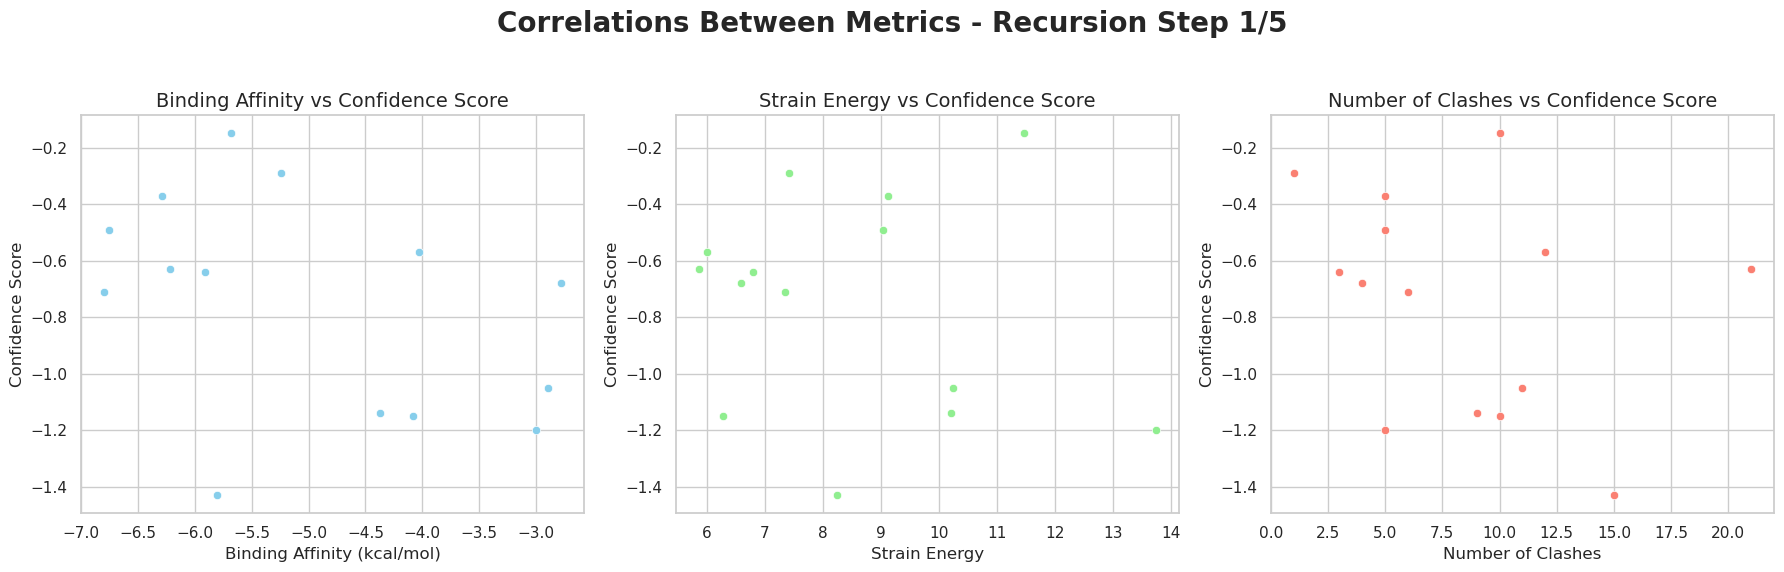

Total number of data points for recursion step 2/5: 12


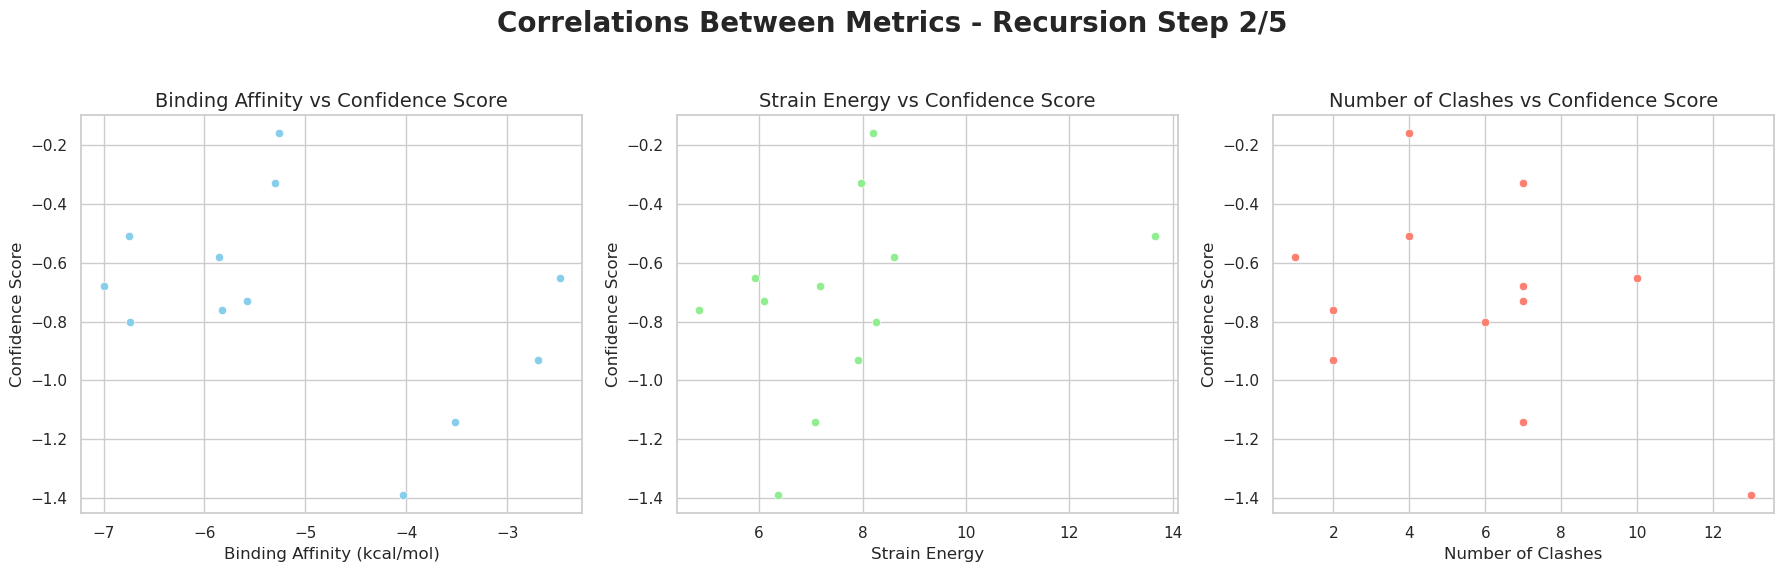

Total number of data points for recursion step 3/5: 11


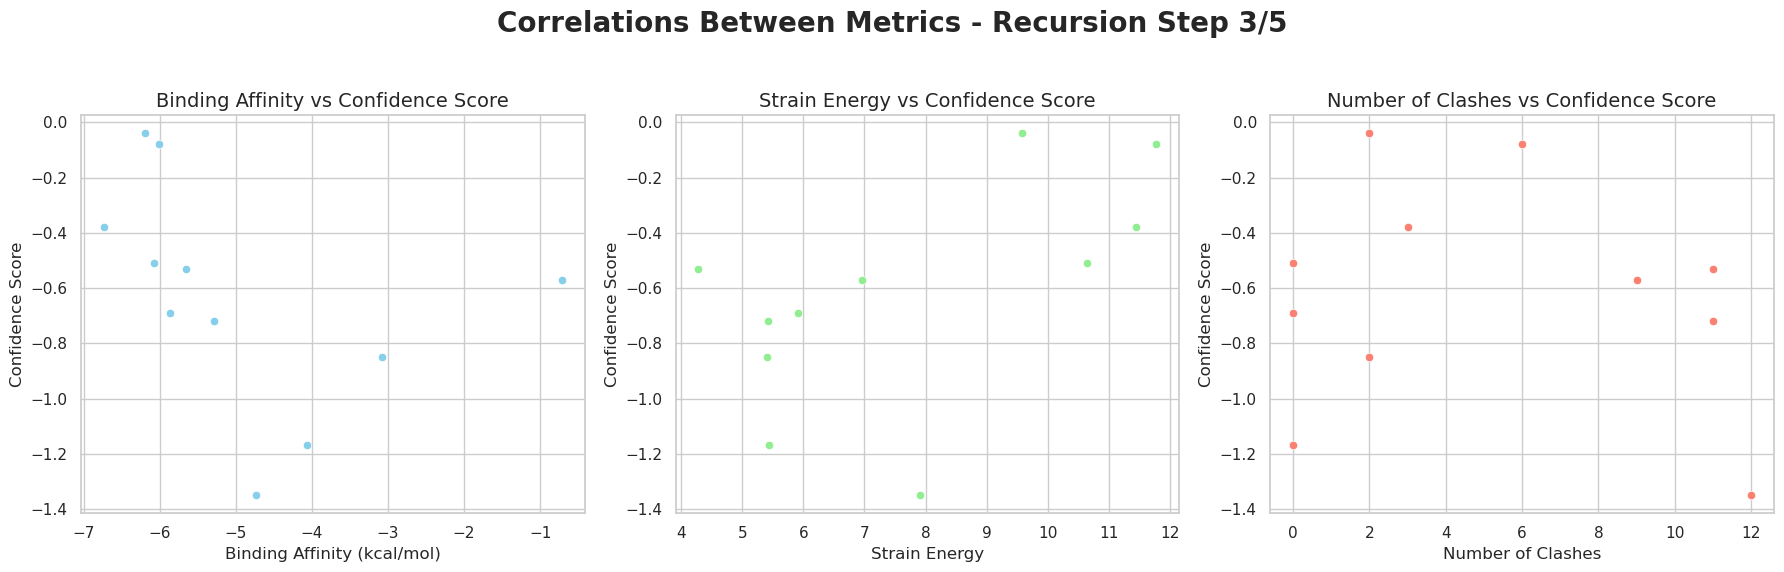

Total number of data points for recursion step 4/5: 11


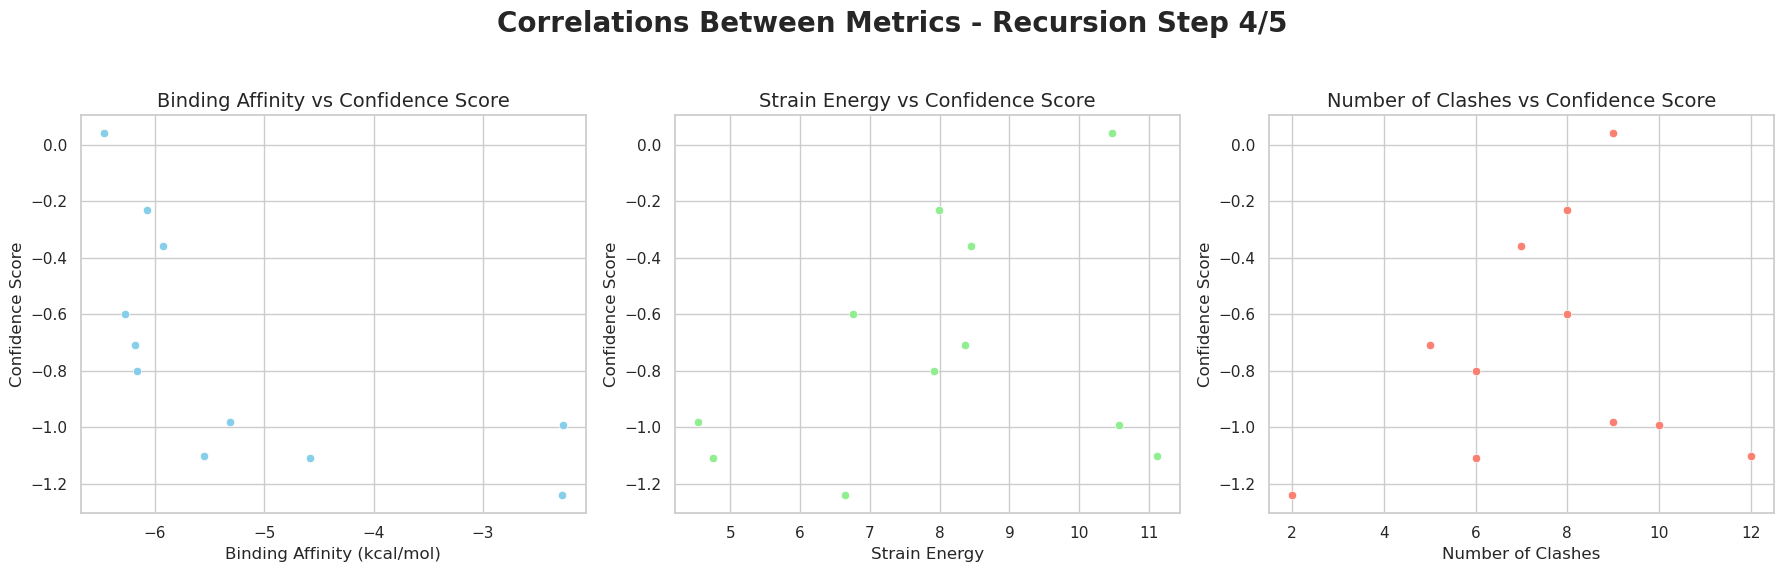

Total number of data points for recursion step 5/5: 11


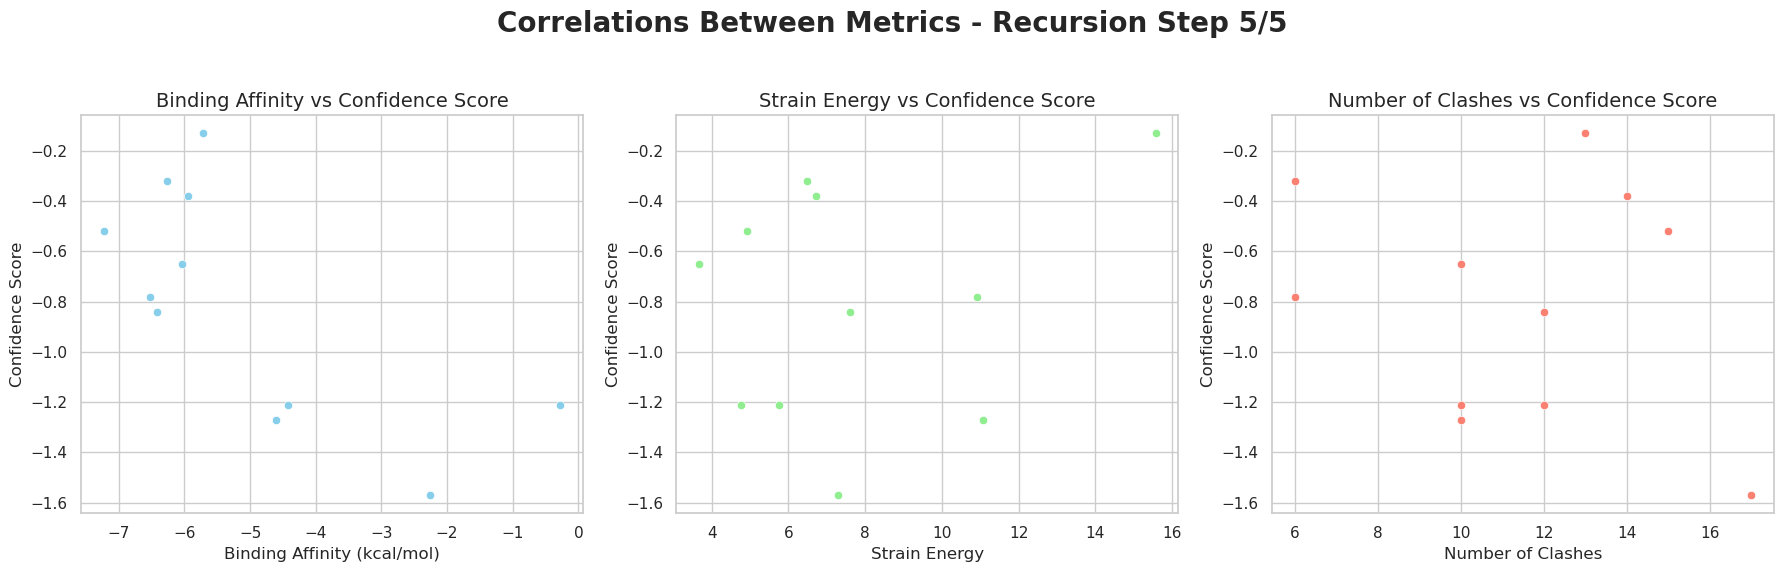

In [13]:
def plot_correlations(data, title_suffix):
    # Plotting correlations for the specified pairs of metrics
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f'Correlations Between Metrics - {title_suffix}', fontsize=20, fontweight='bold')

    # Binding Affinity (kcal/mol) vs Confidence Score
    sns.scatterplot(data=data, x='Binding Affinity (kcal/mol)', y='Confidence Score', ax=axes[0], color='skyblue')
    axes[0].set_title('Binding Affinity vs Confidence Score', fontsize=14)
    axes[0].set_xlabel('Binding Affinity (kcal/mol)', fontsize=12)
    axes[0].set_ylabel('Confidence Score', fontsize=12)

    # Strain Energy vs Confidence Score
    sns.scatterplot(data=data, x='Strain Energy', y='Confidence Score', ax=axes[1], color='lightgreen')
    axes[1].set_title('Strain Energy vs Confidence Score', fontsize=14)
    axes[1].set_xlabel('Strain Energy', fontsize=12)
    axes[1].set_ylabel('Confidence Score', fontsize=12)

    # Number of clashes vs Confidence Score
    sns.scatterplot(data=data, x='Number of clashes', y='Confidence Score', ax=axes[2], color='salmon')
    axes[2].set_title('Number of Clashes vs Confidence Score', fontsize=14)
    axes[2].set_xlabel('Number of Clashes', fontsize=12)
    axes[2].set_ylabel('Confidence Score', fontsize=12)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



# Loop over the recursion steps and plot correlations for each step
for step in range(1, 6):
    file_path = f'{output_file_template.format(step)}'
    data = pd.read_csv(file_path)
    num_rows = data.shape[0]  
    print(f'Total number of data points for recursion step {step}/5: {num_rows}')
    plot_correlations(data, f'Recursion Step {step}/5')


## Correlation Between Confidence Score vs Physical Scores (Binding Affinity, Strain Energy, Number of Clashes) of Each Recursive Step

- This is all data with selecting range values

Total number of data points for recursion step 1/5: 14


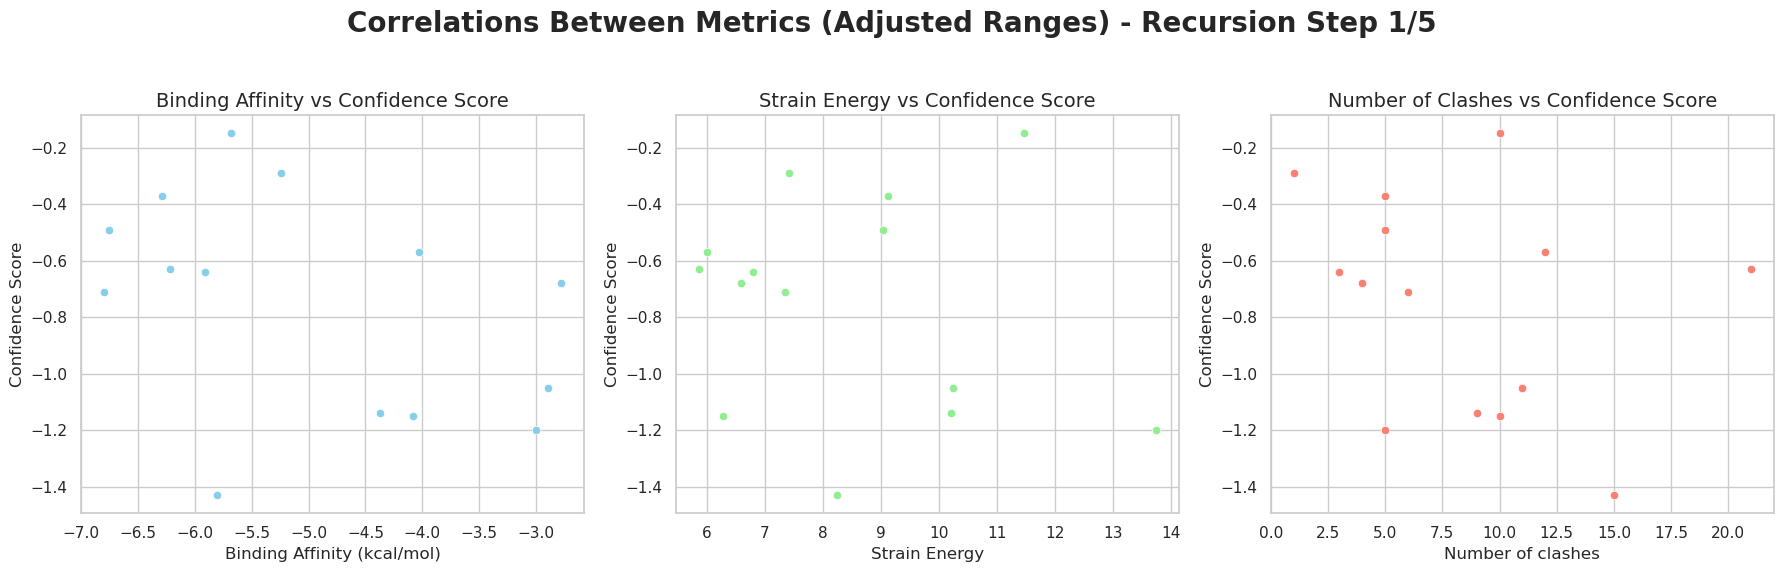

Total number of data points for recursion step 2/5: 12


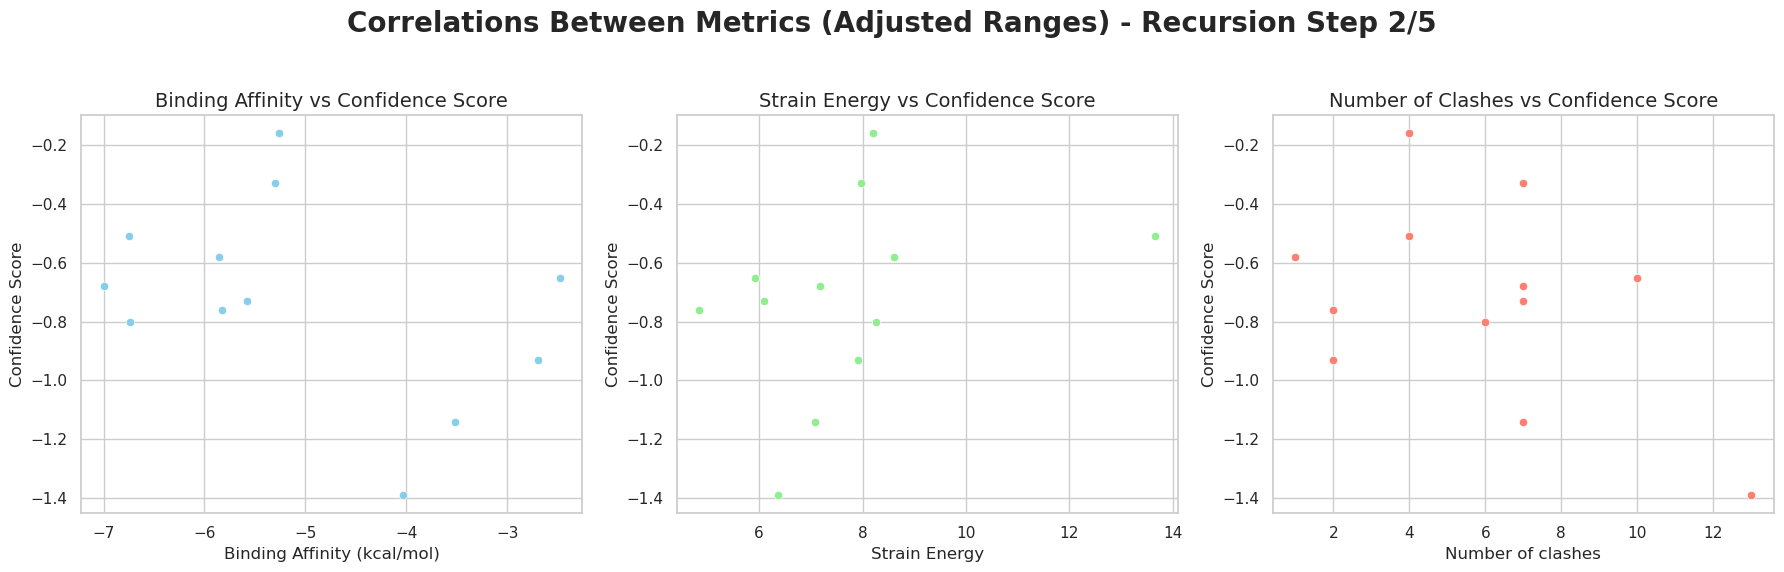

Total number of data points for recursion step 3/5: 11


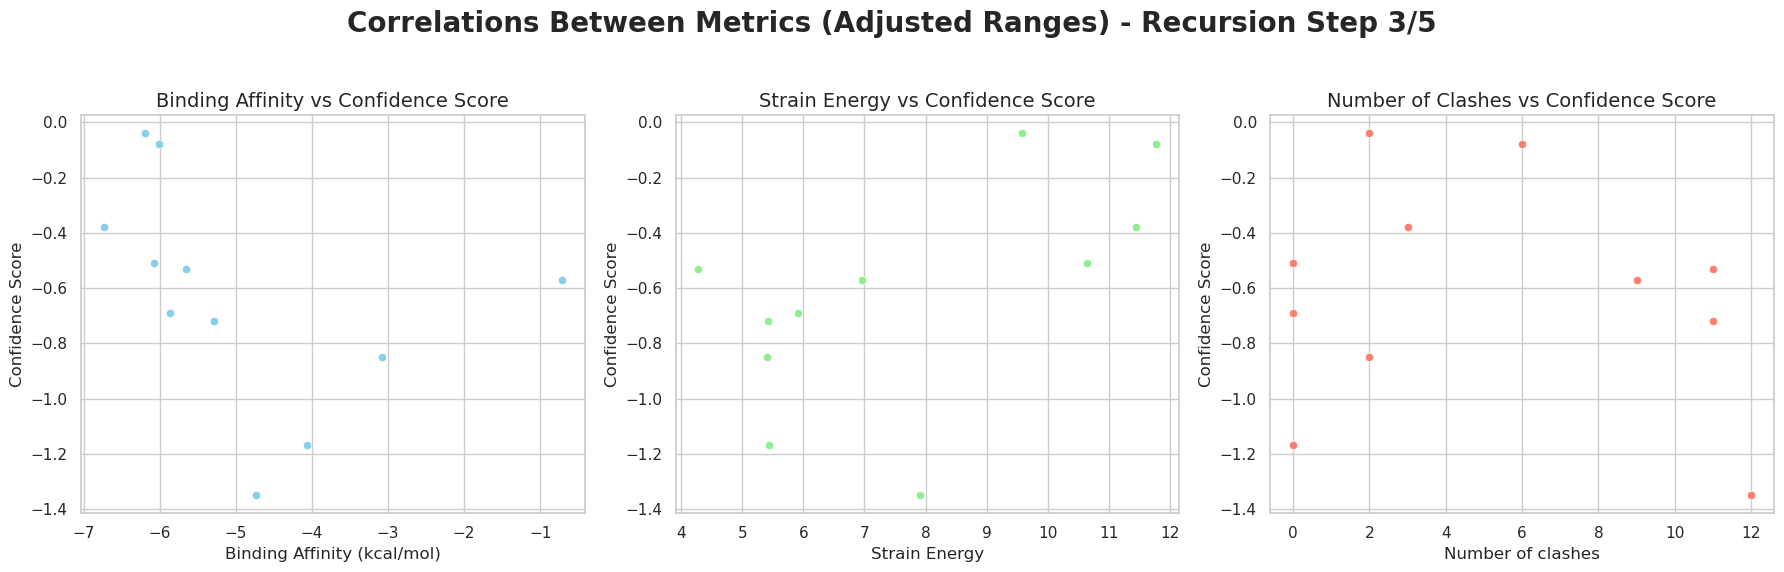

Total number of data points for recursion step 4/5: 11


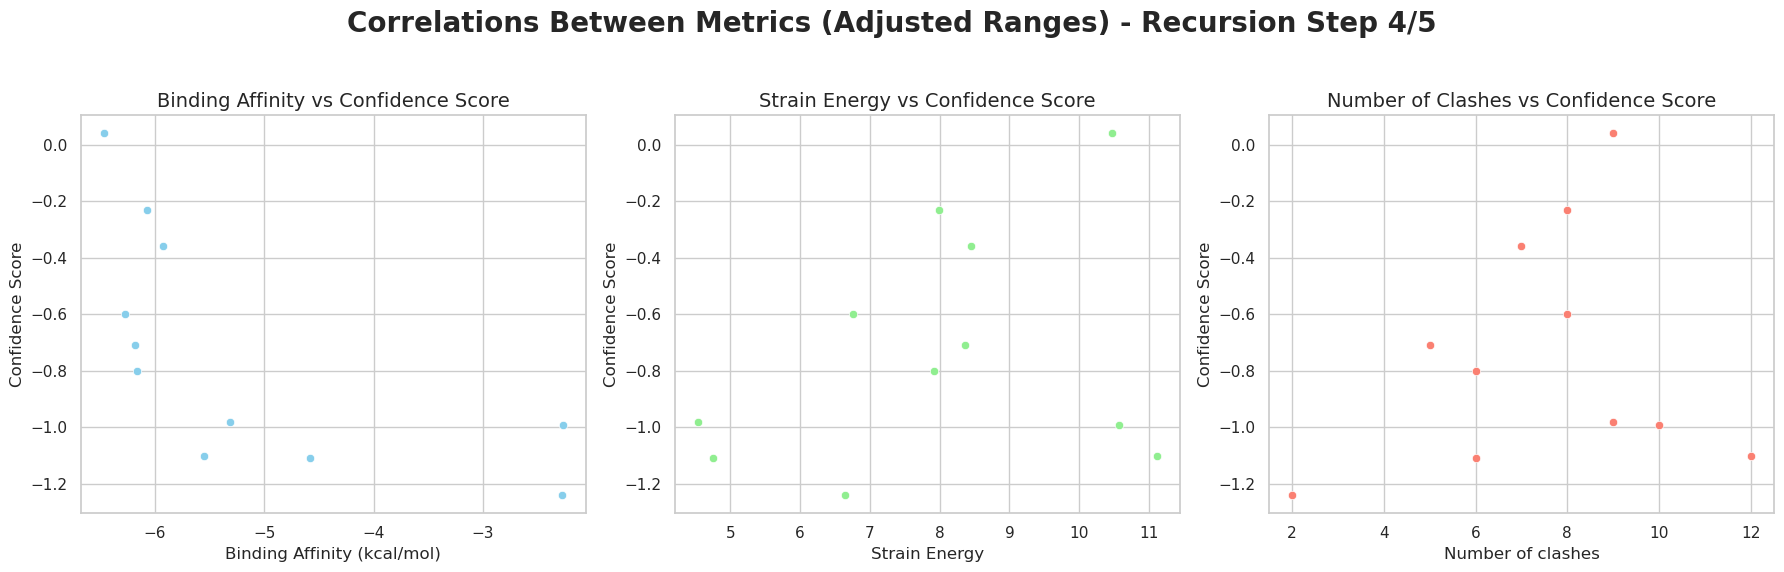

Total number of data points for recursion step 5/5: 11


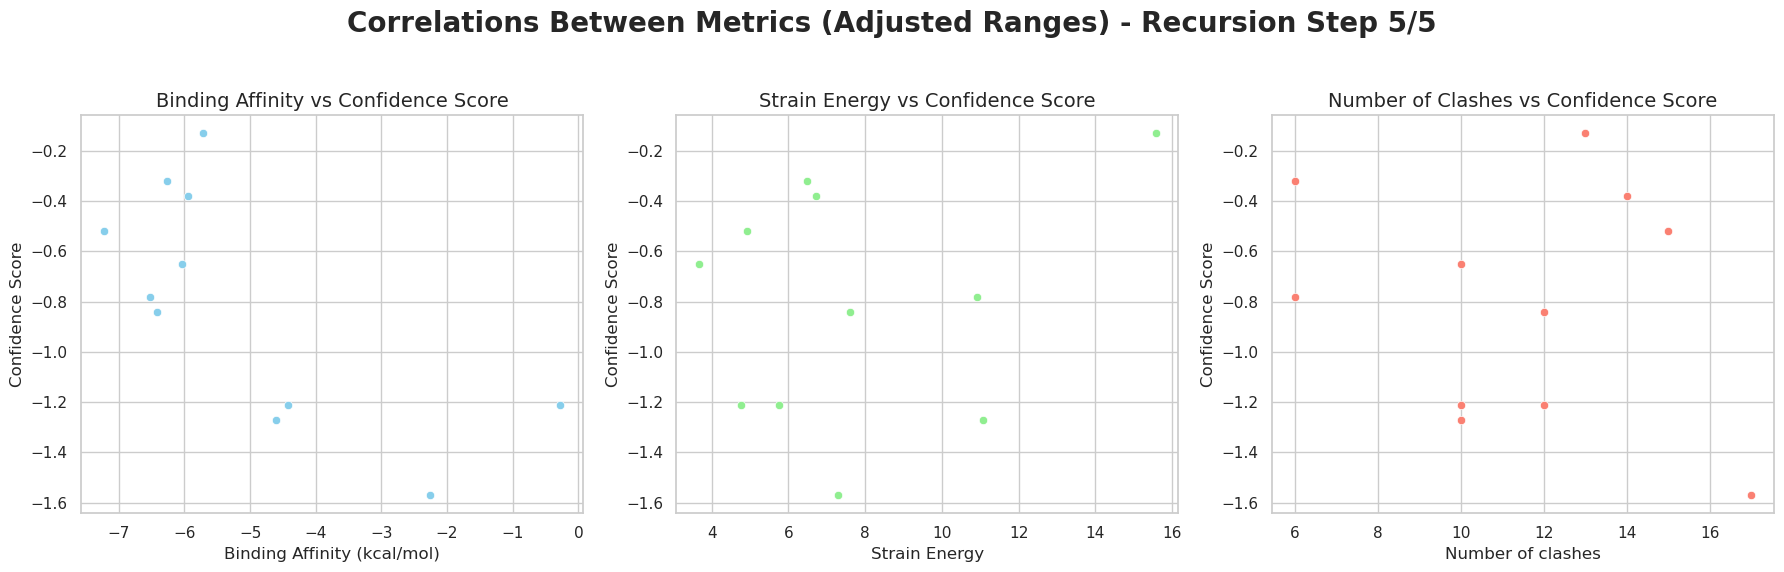

In [14]:
def filter_and_plot_correlations(data, title_suffix):
    # Filter the data for the given ranges
    filtered_data = data[
        (data['Confidence Score'] >= -5) & (data['Confidence Score'] <= 5) &
        (data['Binding Affinity (kcal/mol)'] >= -20) & (data['Binding Affinity (kcal/mol)'] <= 20) &
        (data['Strain Energy'] >= -20) & (data['Strain Energy'] <= 20)
    ]

    # Plotting correlations for the specified pairs of metrics with all adjusted ranges
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f'Correlations Between Metrics (Adjusted Ranges) - {title_suffix}', fontsize=20, fontweight='bold')

    # Binding Affinity (kcal/mol) vs Confidence Score
    sns.scatterplot(data=filtered_data, x='Binding Affinity (kcal/mol)', y='Confidence Score', ax=axes[0], color='skyblue')
    axes[0].set_title('Binding Affinity vs Confidence Score', fontsize=14)

    # Strain Energy vs Confidence Score
    sns.scatterplot(data=filtered_data, x='Strain Energy', y='Confidence Score', ax=axes[1], color='lightgreen')
    axes[1].set_title('Strain Energy vs Confidence Score', fontsize=14)

    # Number of clashes vs Confidence Score
    sns.scatterplot(data=filtered_data, x='Number of clashes', y='Confidence Score', ax=axes[2], color='salmon')
    axes[2].set_title('Number of Clashes vs Confidence Score', fontsize=14)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



# Loop over the recursion steps and apply the filter and plotting function
for step in range(1, 6):
    file_path = f'{output_file_template.format(step)}'
    data = pd.read_csv(file_path)
    num_rows = data.shape[0]  
    print(f'Total number of data points for recursion step {step}/5: {num_rows}')
    filter_and_plot_correlations(data, f'Recursion Step {step}/5')


## Correlation Between Confidence Score vs Physical Scores (Binding Affinity, Strain Energy, Number of Clashes) of Each Recursive Step

- This is all data with selecting range values 
- Best lines with `R^2` values

Total number of data points for recursion step 1/5: 14


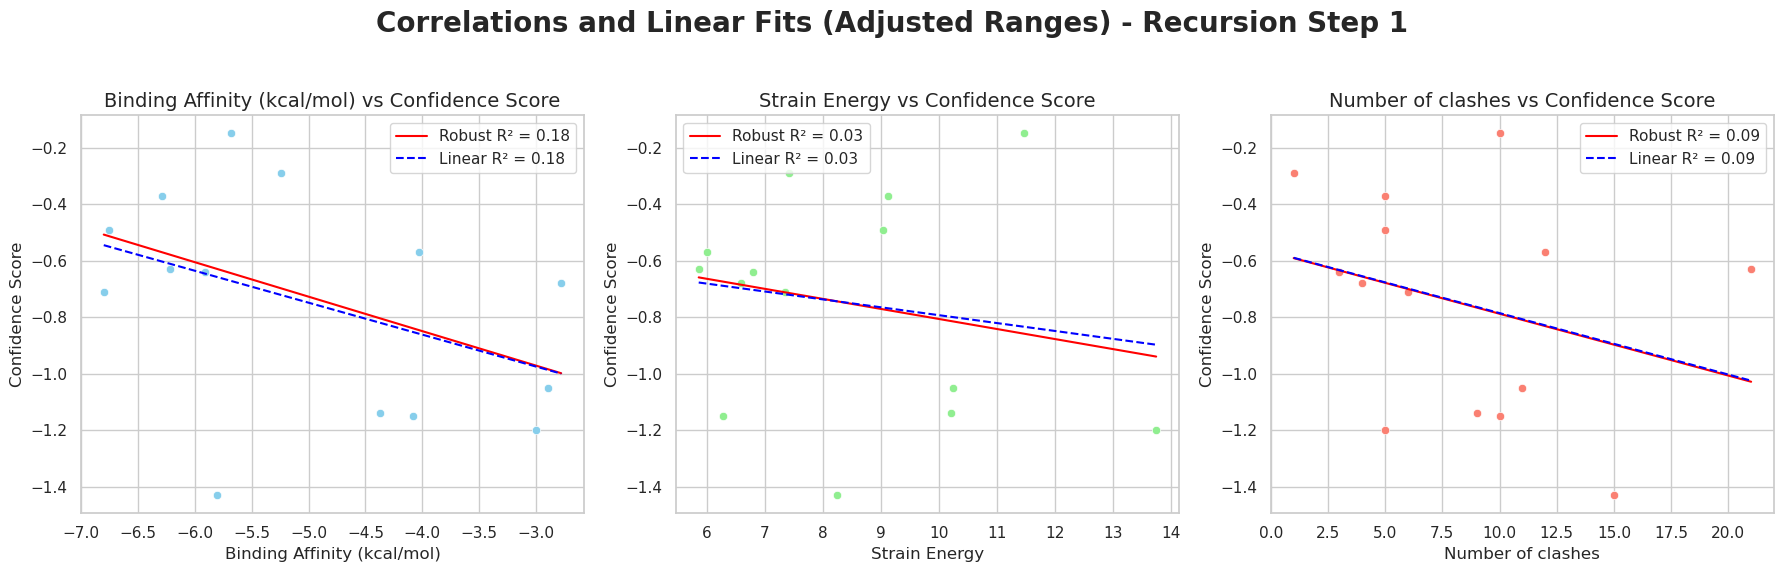

Total number of data points for recursion step 2/5: 12


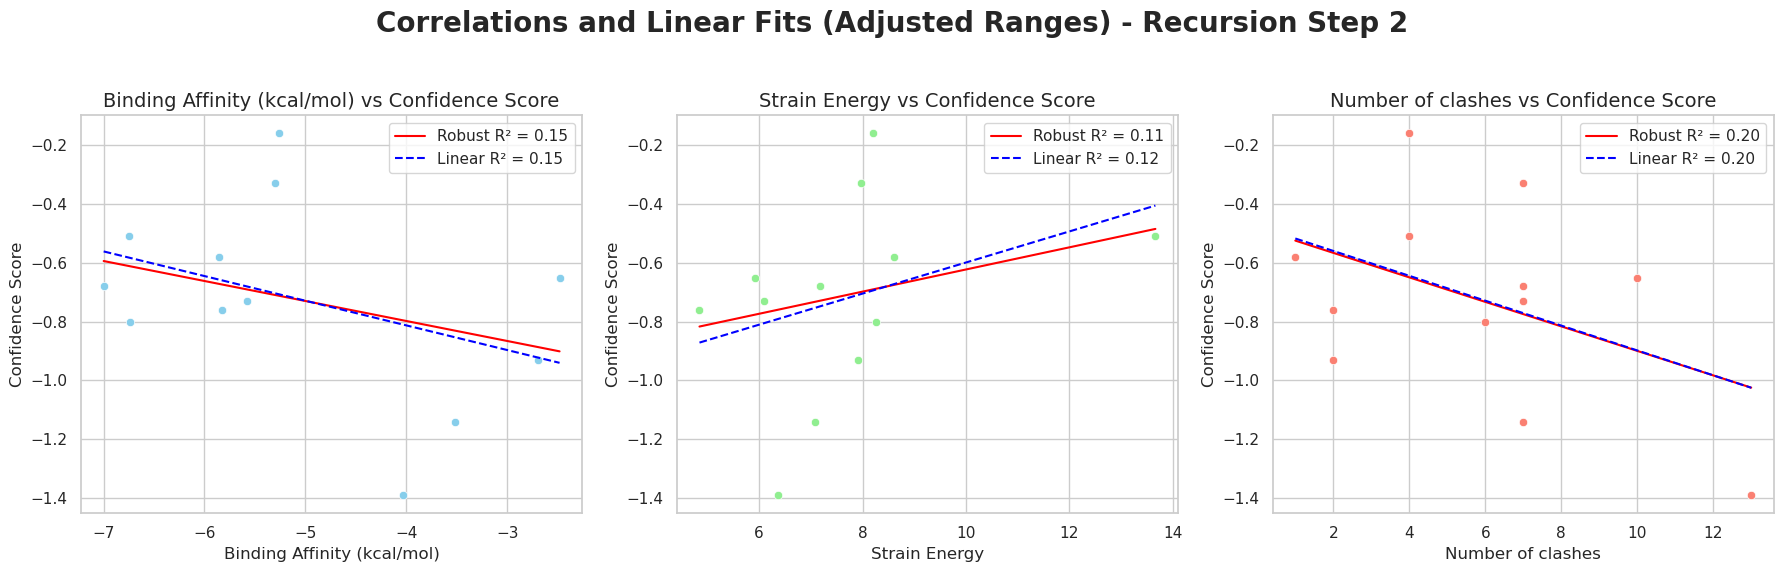

Total number of data points for recursion step 3/5: 11


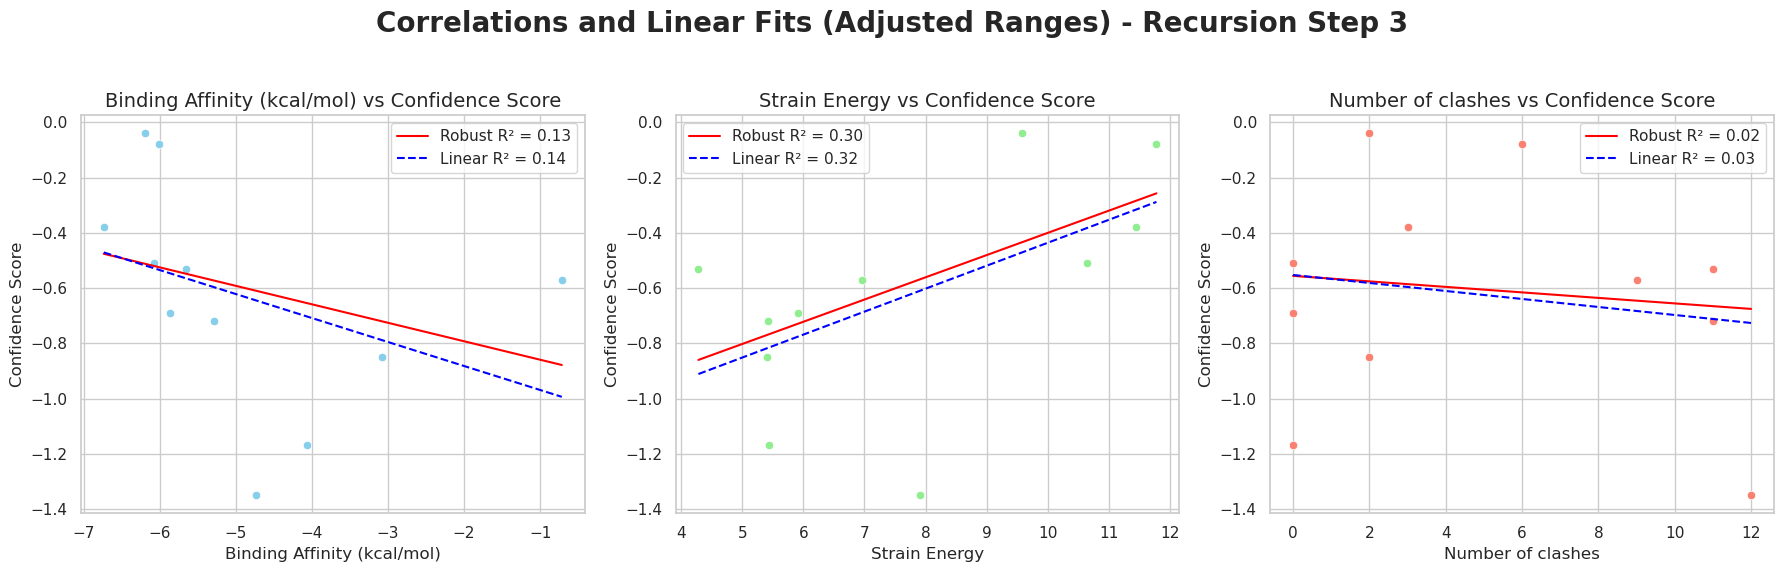

Total number of data points for recursion step 4/5: 11


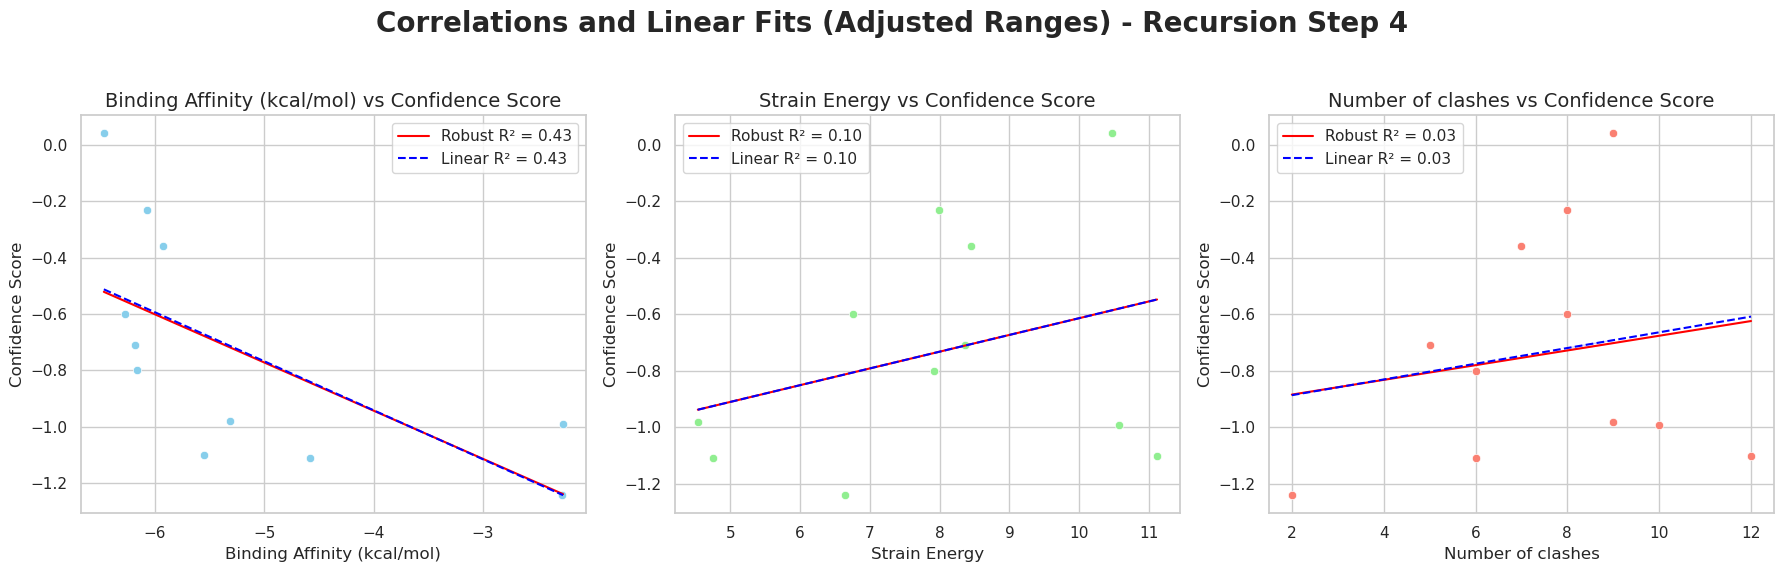

Total number of data points for recursion step 5/5: 11


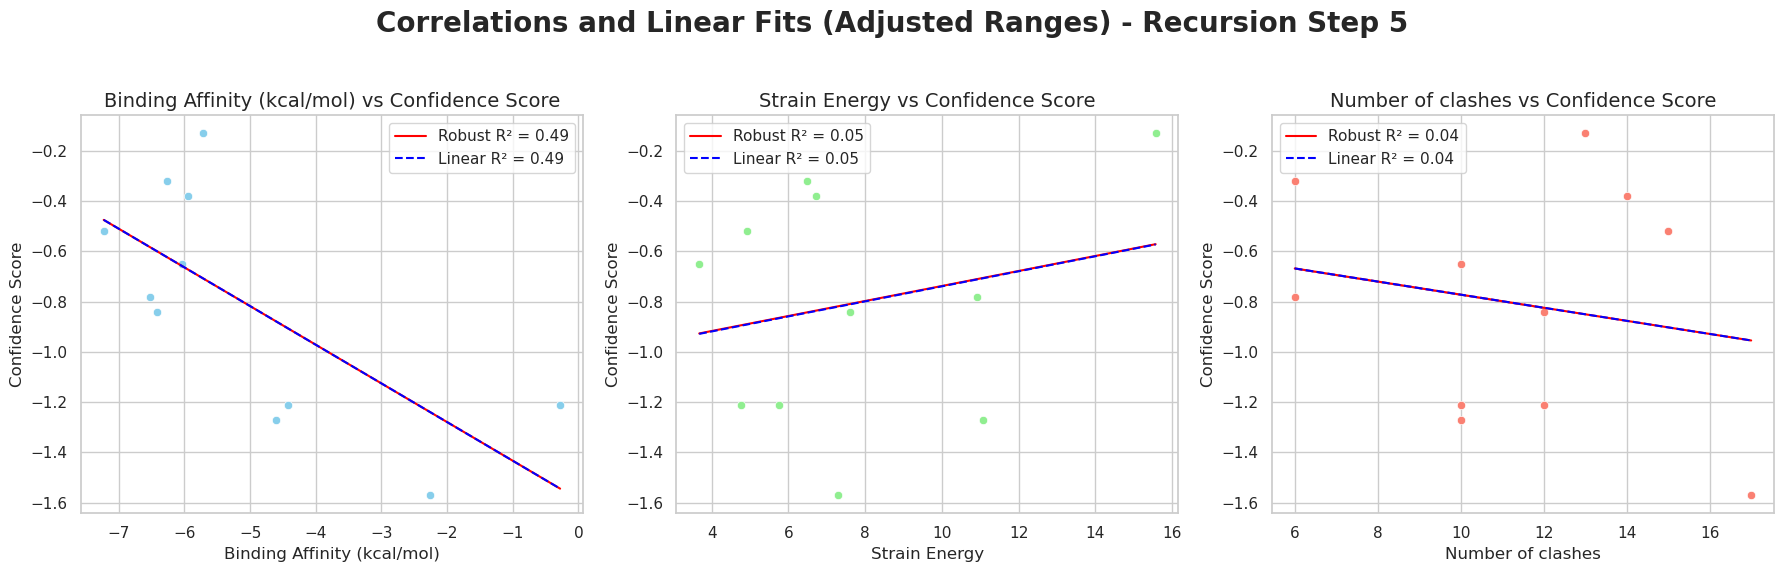

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm

def plot_correlation_with_fit(data, recursion_step):
    # Filter data based on the specified ranges
    filtered_data = data[
        (data['Confidence Score'] >= -5) & (data['Confidence Score'] <= 5) &
        (data['Binding Affinity (kcal/mol)'] >= -20) & (data['Binding Affinity (kcal/mol)'] <= 20) &
        (data['Strain Energy'] >= -20) & (data['Strain Energy'] <= 20)
    ]

    # Preparing the figure
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f'Correlations and Linear Fits (Adjusted Ranges) - Recursion Step {recursion_step}', fontsize=20, fontweight='bold')

    # Defining metrics pairs for correlation
    metrics_pairs = [
        ('Binding Affinity (kcal/mol)', 'Confidence Score'),
        ('Strain Energy', 'Confidence Score'),
        ('Number of clashes', 'Confidence Score')
    ]

    colors = ['skyblue', 'lightgreen', 'salmon']

    for i, (x_metric, y_metric) in enumerate(metrics_pairs):
        # Scatter plot
        sns.scatterplot(data=filtered_data, x=x_metric, y=y_metric, ax=axes[i], color=colors[i])
        
        # Robust linear model
        X = sm.add_constant(filtered_data[x_metric])  # Adding a constant for the intercept
        robust_model = sm.RLM(filtered_data[y_metric], X, M=sm.robust.norms.HuberT())
        robust_results = robust_model.fit()
        
        # Calculate R^2 score for robust model
        y_pred_robust = robust_results.predict(X)
        r2_robust = r2_score(filtered_data[y_metric], y_pred_robust)
        
        # Linear model
        coef = np.polyfit(filtered_data[x_metric], filtered_data[y_metric], 1)
        poly1d_fn = np.poly1d(coef) 
        
        # Calculate R^2 score for linear model
        y_pred_linear = poly1d_fn(filtered_data[x_metric])
        r2_linear = r2_score(filtered_data[y_metric], y_pred_linear)
        
        # Plot robust fit and linear fit
        sns.lineplot(x=filtered_data[x_metric], y=y_pred_robust, ax=axes[i], color='red', label=f'Robust R² = {r2_robust:.2f}')
        sns.lineplot(x=filtered_data[x_metric], y=poly1d_fn(filtered_data[x_metric]), ax=axes[i], color='blue', label=f'Linear R² = {r2_linear:.2f}', linestyle='--')
        
        axes[i].set_title(f'{x_metric} vs {y_metric}', fontsize=14)
        axes[i].set_xlabel(x_metric, fontsize=12)
        axes[i].set_ylabel(y_metric, fontsize=12)
        axes[i].legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


# Loop over the recursion steps and plot for each step
for step in range(1, 6):
    file_path = f'{output_file_template.format(step)}'
    data = pd.read_csv(file_path)
    num_rows = data.shape[0]  
    print(f'Total number of data points for recursion step {step}/5: {num_rows}')
    plot_correlation_with_fit(data, step)


## Box Plots (Binding Affinity, Strain Energy, Number of Clashes) of Each Recursive Step

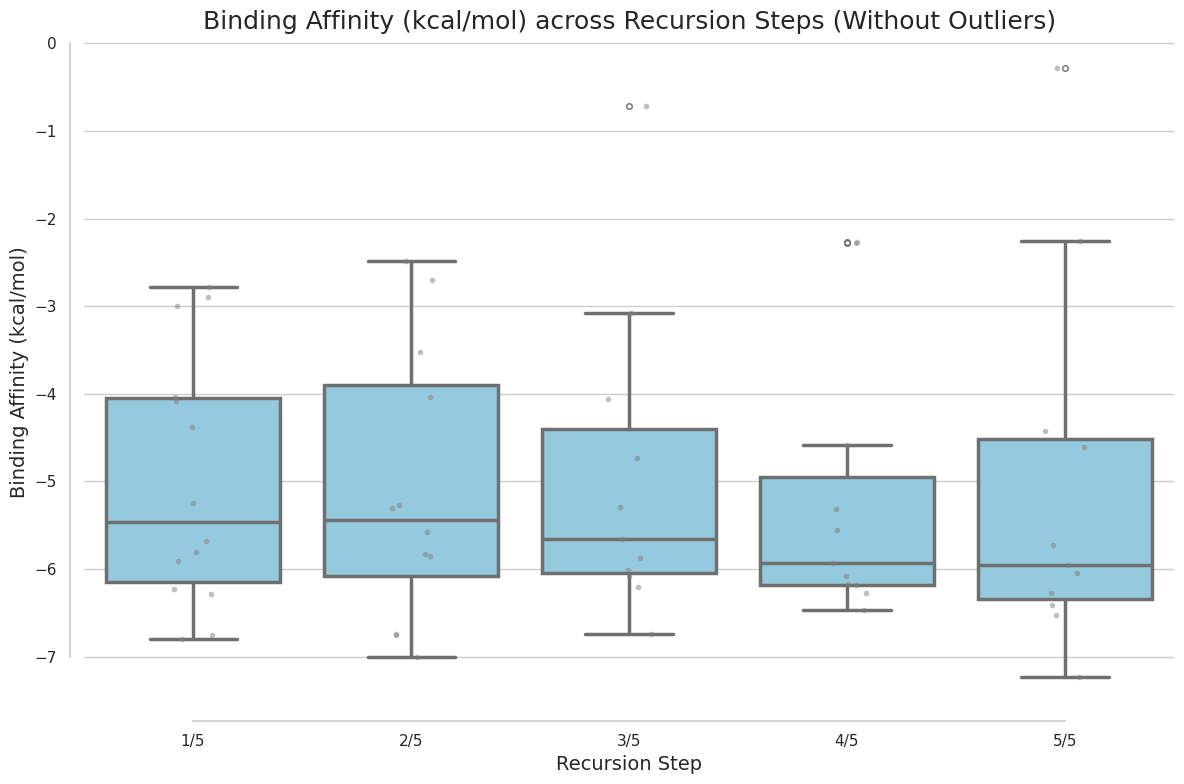

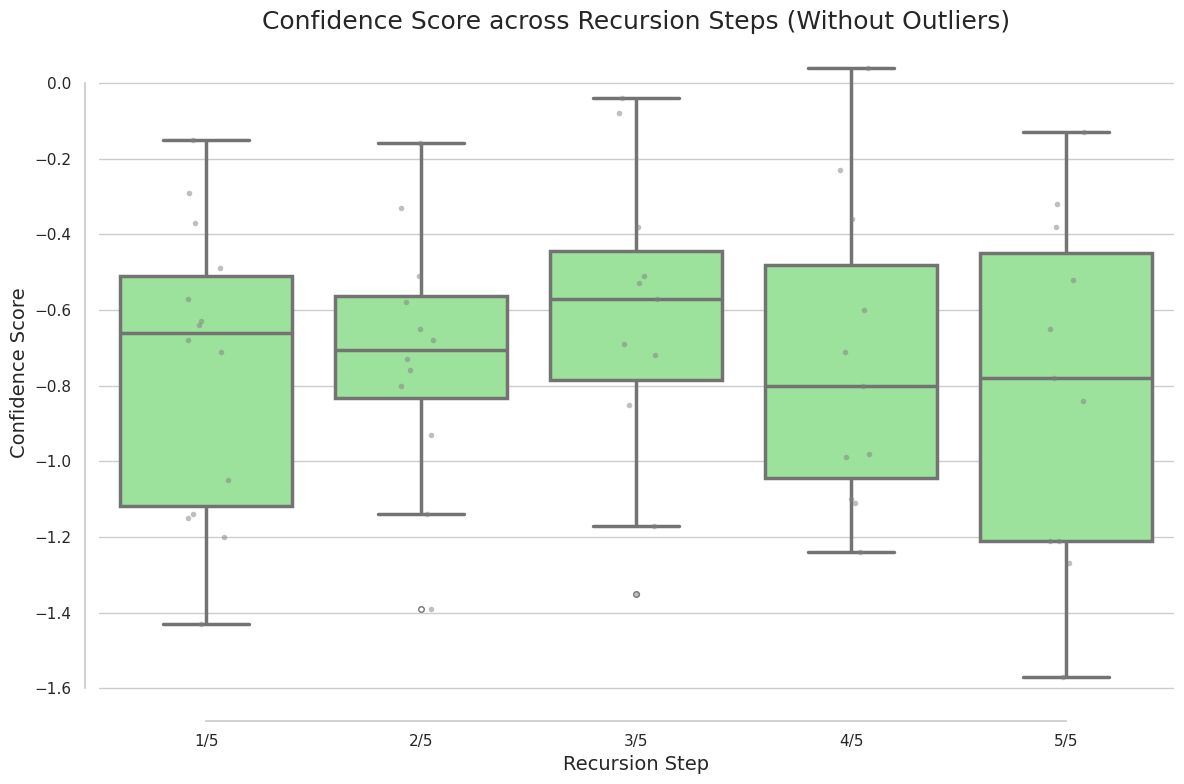

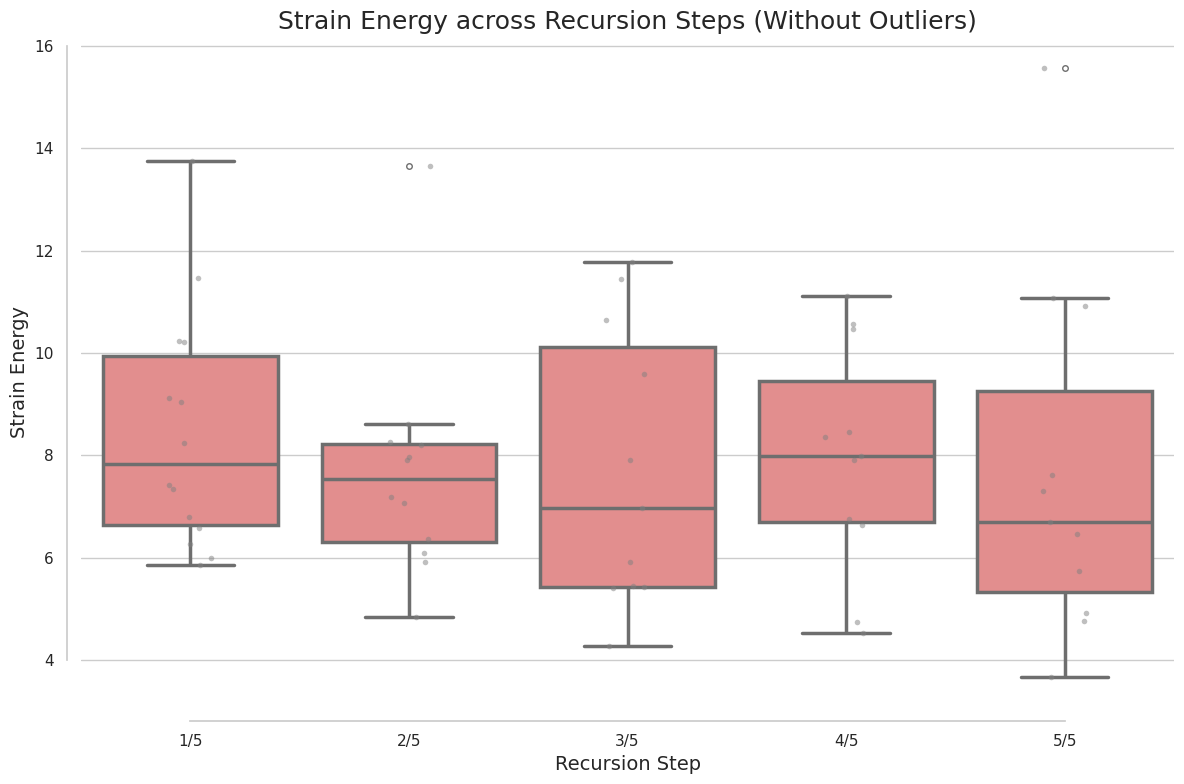

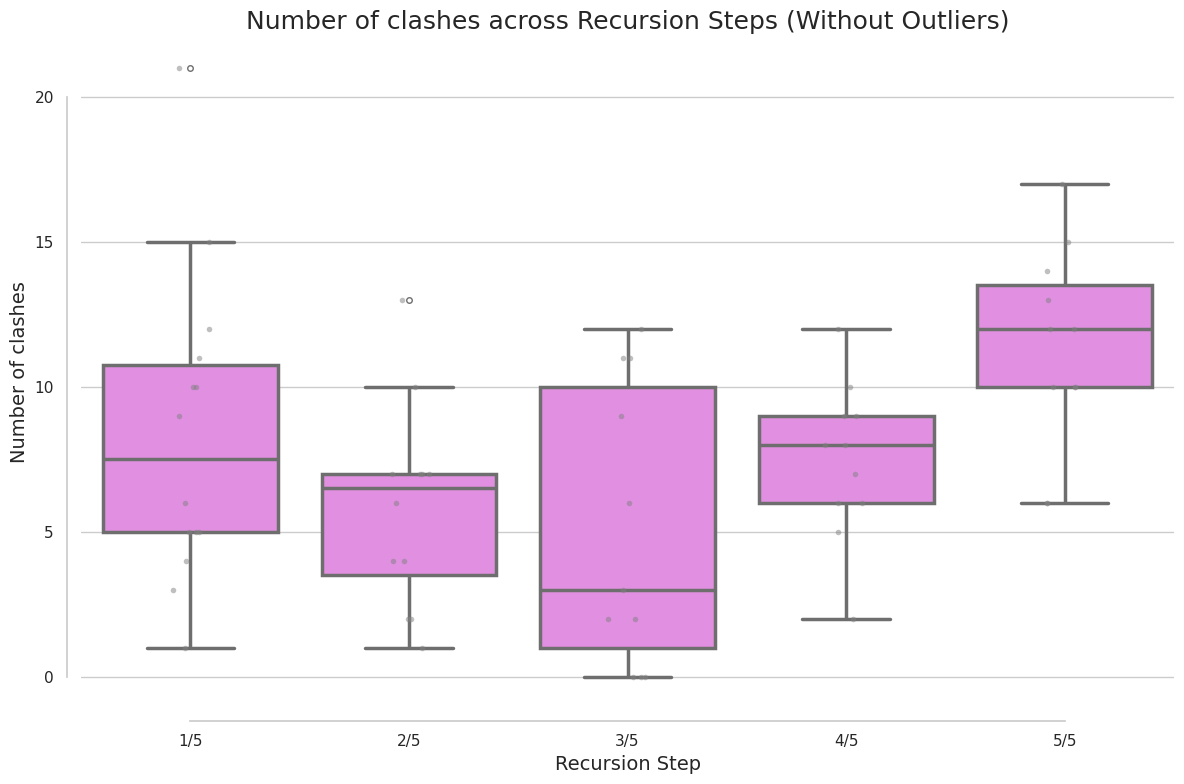

In [16]:
# Function to remove outliers using the IQR method
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.1)
    Q3 = df[column_name].quantile(0.9)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Function to plot a fancy boxplot for a given column
def plot_fancy_boxplot(data, column_name, recursion_steps, color):
    cleaned_data = remove_outliers(data, column_name)
    plt.figure(figsize=(12, 8))
    ax = sns.boxplot(x='Recursion Step', y=column_name, data=cleaned_data, fliersize=4, linewidth=2.5, color=color)
    sns.stripplot(x='Recursion Step', y=column_name, data=cleaned_data, jitter=True, size=4, color='gray', alpha=0.5)
    plt.title(f'{column_name} across Recursion Steps (Without Outliers)', fontsize=18)
    plt.xlabel('Recursion Step', fontsize=14)
    plt.ylabel(column_name, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    sns.despine(offset=10, trim=True)
    plt.tight_layout()
    plt.show()

# Load the data and concatenate it with recursion step labels
base_dir = '/fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/DOCKGEN/data/'
output_file_template = 'filtered_proteins_from_summary_rec{}.csv'
all_data = pd.DataFrame()

for step in range(1, 6):
    file_path = f'{base_dir}{output_file_template.format(step)}'
    df = pd.read_csv(file_path)
    df['Recursion Step'] = f'{step}/5'
    all_data = pd.concat([all_data, df])

# List of columns to create boxplots for
columns_to_plot = [
    'Binding Affinity (kcal/mol)', 
    'Confidence Score', 
    'Strain Energy', 
    'Number of clashes'
]

colors = {
    'Binding Affinity (kcal/mol)': 'skyblue', 
    'Confidence Score': 'lightgreen', 
    'Strain Energy': 'lightcoral', 
    'Number of clashes': 'violet'
}

# Plot fancy boxplots for all specified columns with colors
for column in columns_to_plot:
    plot_fancy_boxplot(all_data, column, range(1, 6), colors[column])

## Violin Plots (Binding Affinity, Strain Energy, Number of Clashes) of Each Recursive Step

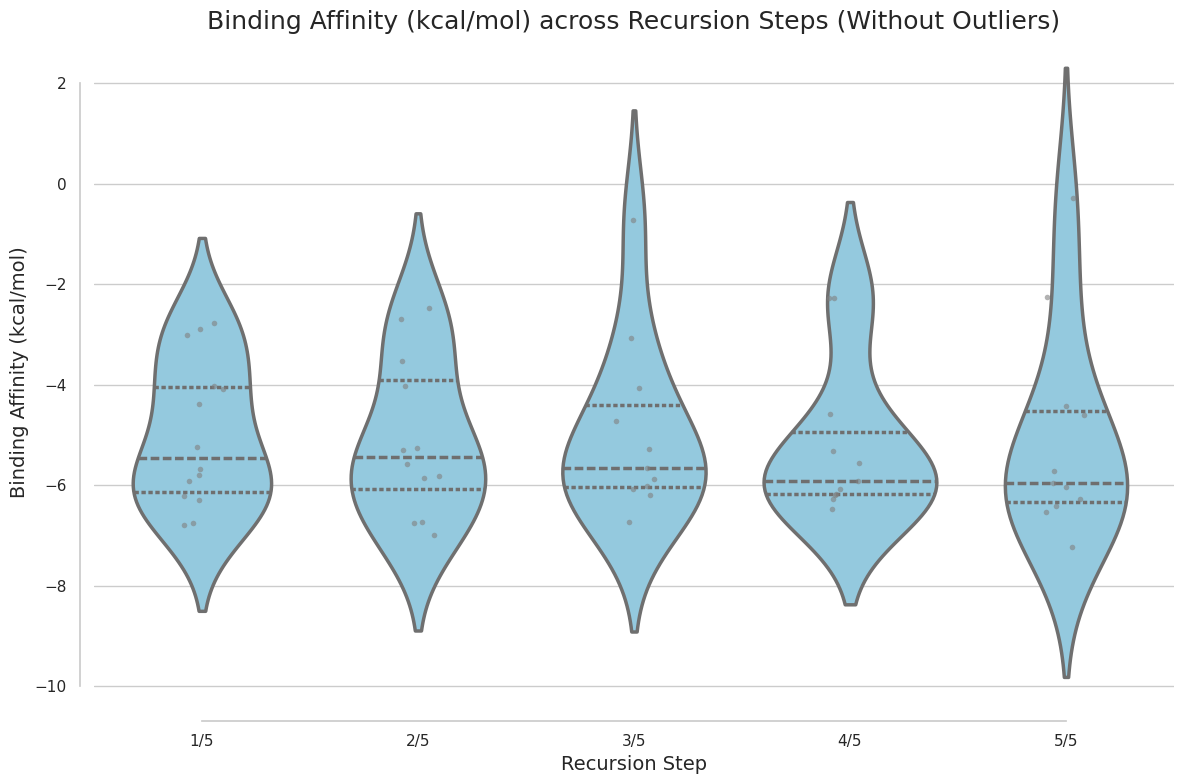

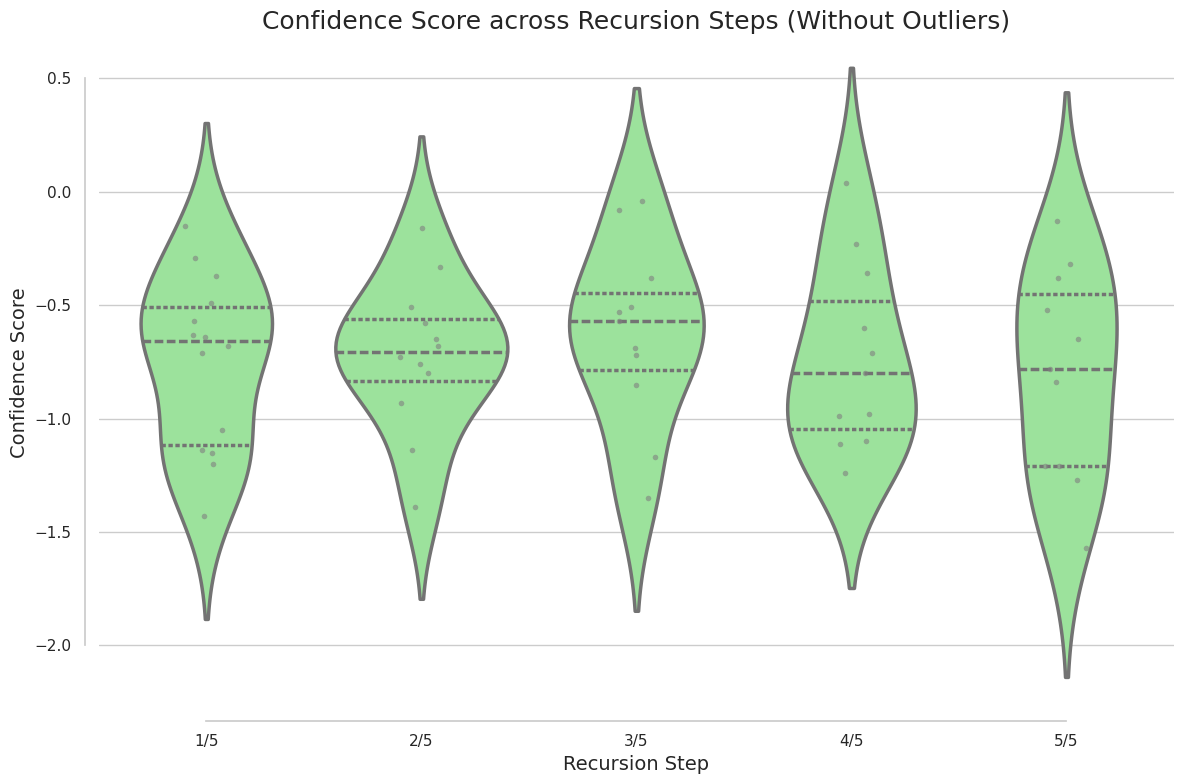

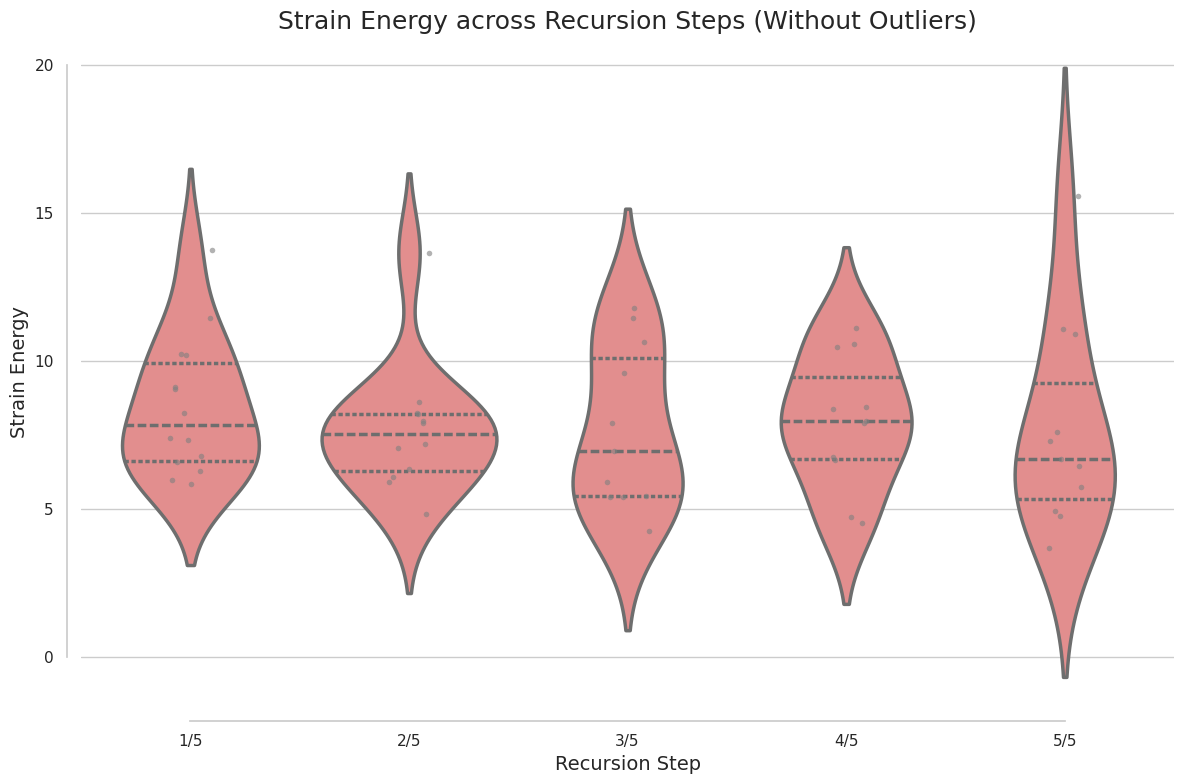

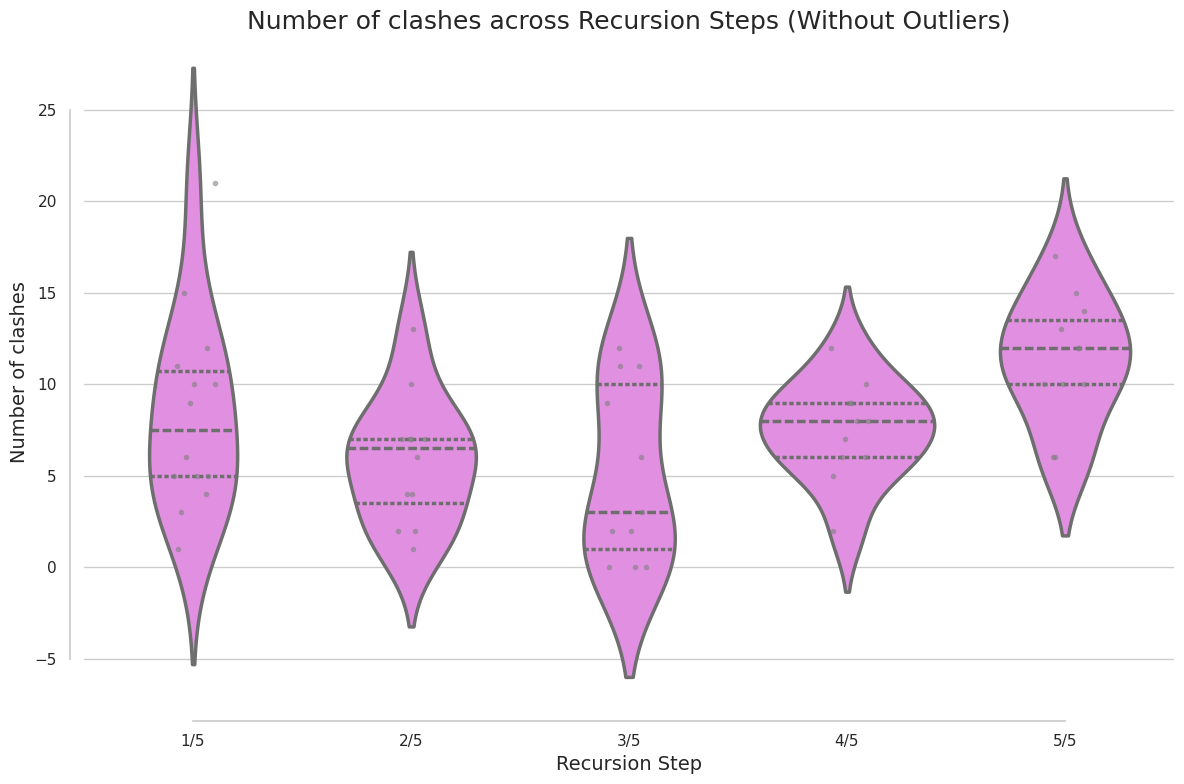

In [17]:
# Function to plot a fancy violin plot for a given column
def plot_fancy_violin_plot(data, column_name, recursion_steps, color):
    cleaned_data = remove_outliers(data, column_name)
    plt.figure(figsize=(12, 8))
    sns.violinplot(x='Recursion Step', y=column_name, data=cleaned_data, inner='quartile', linewidth=2.5, color=color)
    sns.stripplot(x='Recursion Step', y=column_name, data=cleaned_data, jitter=True, size=4, color='grey', alpha=0.6)
    plt.title(f'{column_name} across Recursion Steps (Without Outliers)', fontsize=18)
    plt.xlabel('Recursion Step', fontsize=14)
    plt.ylabel(column_name, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    sns.despine(offset=10, trim=True)
    plt.tight_layout()
    plt.show()

# Assuming 'base_dir' and 'output_file_template' have been defined and the data has been loaded.
# Assuming 'all_data' DataFrame is ready and contains 'Recursion Step' column

# List of columns to create violin plots for
columns_to_plot = [
    'Binding Affinity (kcal/mol)', 
    'Confidence Score', 
    'Strain Energy', 
    'Number of clashes'
]

colors = {
    'Binding Affinity (kcal/mol)': 'skyblue', 
    'Confidence Score': 'lightgreen', 
    'Strain Energy': 'lightcoral', 
    'Number of clashes': 'violet'
}

# Plot fancy boxplots for all specified columns with colors
for column in columns_to_plot:
    plot_fancy_violin_plot(all_data, column, range(1, 6), colors[column])


## Comparative Analysis (t-tests, ANOVA, Kruskal-Wallis test, Tukey HSD test)

In [18]:
import scipy.stats as stats

# Function to perform t-tests between recursion steps for a given column
def perform_t_tests(data, column_name):
    unique_steps = data['Recursion Step'].unique()
    for i in range(len(unique_steps)):
        for j in range(i+1, len(unique_steps)):
            step_i = data[data['Recursion Step'] == unique_steps[i]][column_name]
            step_j = data[data['Recursion Step'] == unique_steps[j]][column_name]
            t_stat, p_val = stats.ttest_ind(step_i, step_j, equal_var=False)
            print(f"T-test between {unique_steps[i]} and {unique_steps[j]} for {column_name}:")
            print(f"T-statistic: {t_stat}, P-value: {p_val}")
            print("\n")

# Function to perform ANOVA across all recursion steps for a given column
def perform_anova(data, column_name):
    data_groups = [data[data['Recursion Step'] == step][column_name] for step in data['Recursion Step'].unique()]
    f_stat, p_val = stats.f_oneway(*data_groups)
    print(f"ANOVA for {column_name}:")
    print(f"F-statistic: {f_stat}, P-value: {p_val}")
    print("\n")

# Function to perform non-parametric Kruskal-Wallis test across all recursion steps for a given column
def perform_kruskal_wallis(data, column_name):
    data_groups = [data[data['Recursion Step'] == step][column_name] for step in data['Recursion Step'].unique()]
    h_stat, p_val = stats.kruskal(*data_groups)
    print(f"Kruskal-Wallis test for {column_name}:")
    print(f"H-statistic: {h_stat}, P-value: {p_val}")
    print("\n")

# Assuming 'all_data' DataFrame is ready and contains 'Recursion Step' column


column_to_analyze = [
    'Binding Affinity (kcal/mol)', 
    'Confidence Score', 
    'Strain Energy', 
    'Number of clashes'
]

for column in column_to_analyze:
    # Perform t-tests
    perform_t_tests(all_data, column)

    # Perform ANOVA
    perform_anova(all_data, column)

    # Perform Kruskal-Wallis test
    perform_kruskal_wallis(all_data, column)




T-test between 1/5 and 2/5 for Binding Affinity (kcal/mol):
T-statistic: 0.16073743810768434, P-value: 0.8737209242098982


T-test between 1/5 and 3/5 for Binding Affinity (kcal/mol):
T-statistic: -0.0666189164031474, P-value: 0.947572818690265


T-test between 1/5 and 4/5 for Binding Affinity (kcal/mol):
T-statistic: 0.3306671046913087, P-value: 0.7441865479959648


T-test between 1/5 and 5/5 for Binding Affinity (kcal/mol):
T-statistic: 0.10104128281303872, P-value: 0.9206970441675035


T-test between 2/5 and 3/5 for Binding Affinity (kcal/mol):
T-statistic: -0.19974396025306398, P-value: 0.8436870994230123


T-test between 2/5 and 4/5 for Binding Affinity (kcal/mol):
T-statistic: 0.1612656382094166, P-value: 0.873434981594136


T-test between 2/5 and 5/5 for Binding Affinity (kcal/mol):
T-statistic: -0.026535163818245684, P-value: 0.9791156937861716


T-test between 3/5 and 4/5 for Binding Affinity (kcal/mol):
T-statistic: 0.3450693269556463, P-value: 0.7337079963573192


T-test bet

/tmp/ipykernel_2452754/498102362.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Recursion Step', y=column_name, data=cleaned_data, palette="Set3")


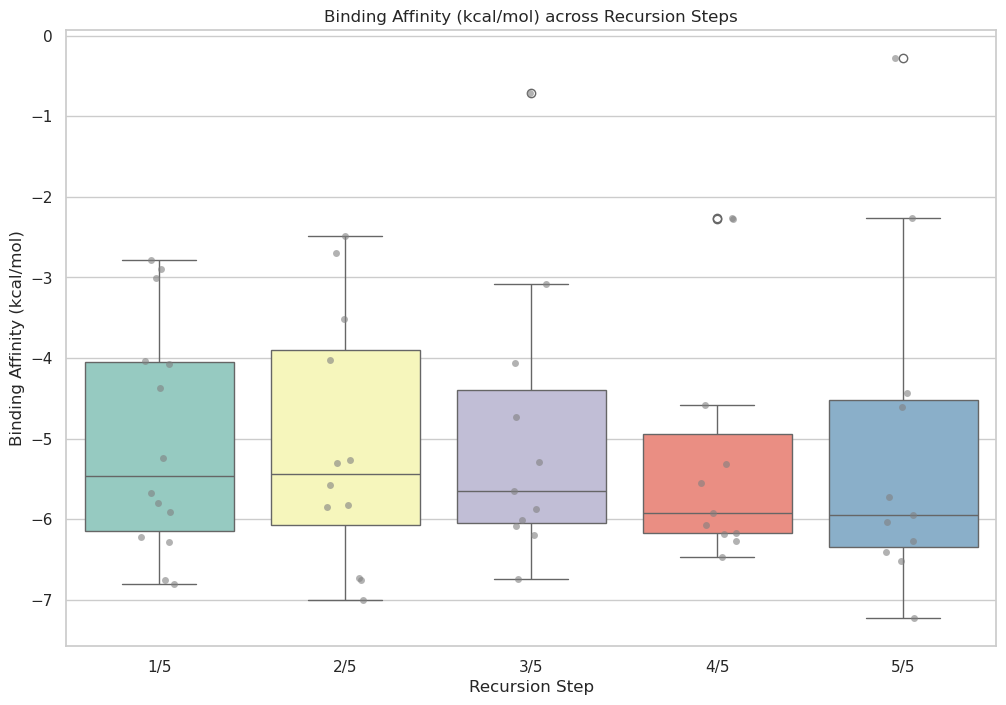

/tmp/ipykernel_2452754/498102362.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Recursion Step', y=column_name, data=cleaned_data, inner='quartile', palette="Set2")


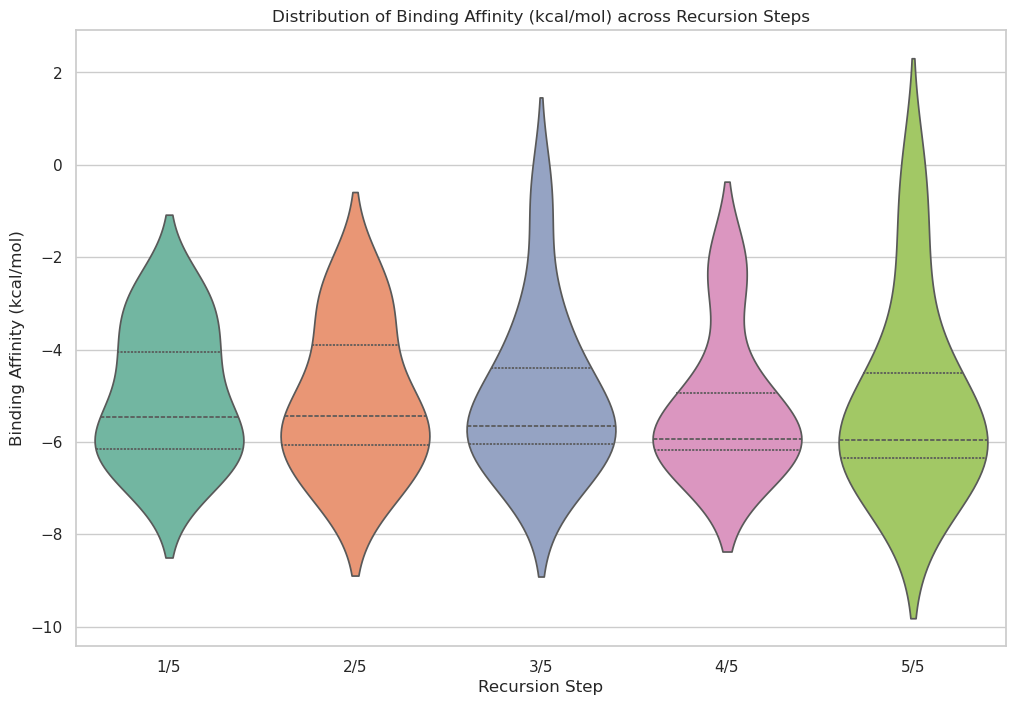

ANOVA for Binding Affinity (kcal/mol): F-value = 0.03545476304738386, P-value = 0.9975213572541772
No significant differences found across Recursion Steps.


/tmp/ipykernel_2452754/498102362.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Recursion Step', y=column_name, data=cleaned_data, palette="Set3")


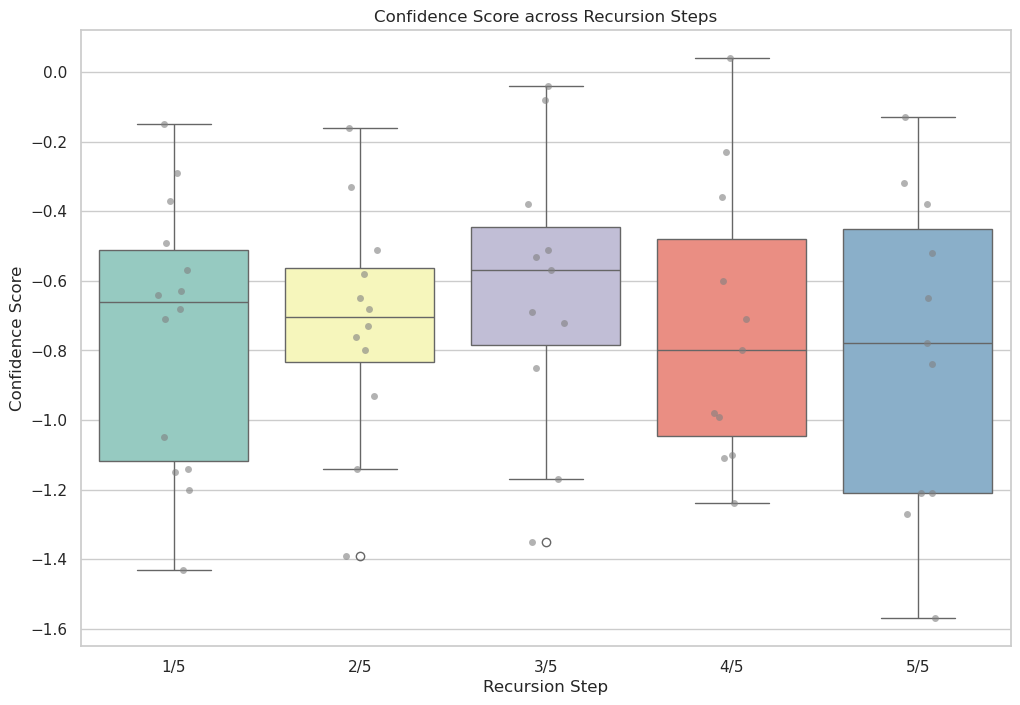

/tmp/ipykernel_2452754/498102362.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Recursion Step', y=column_name, data=cleaned_data, inner='quartile', palette="Set2")


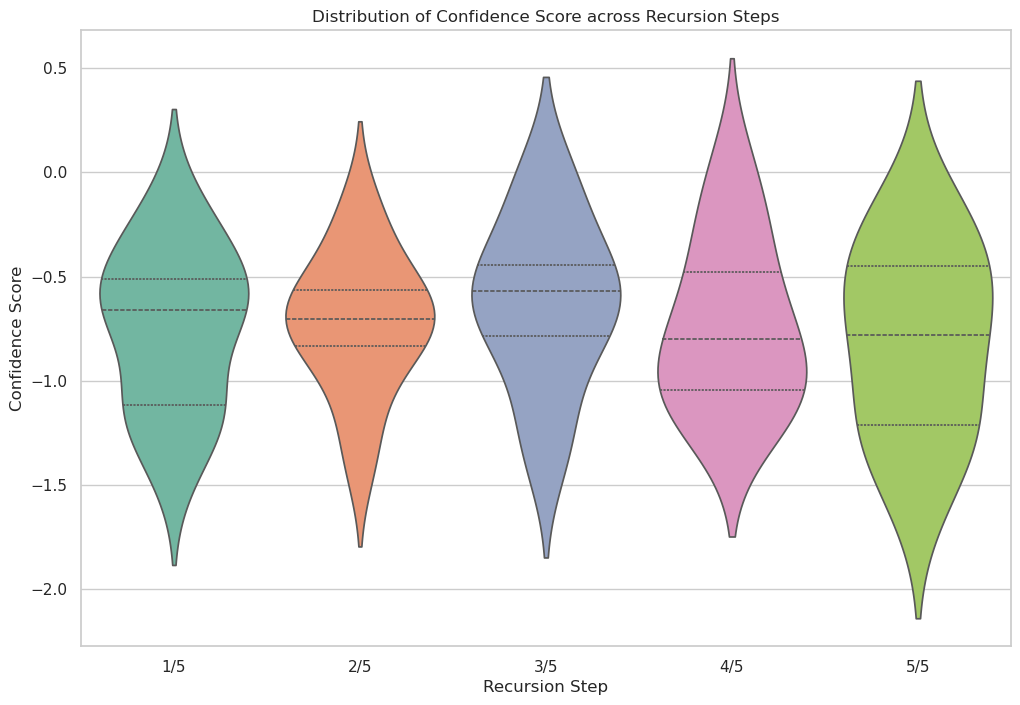

ANOVA for Confidence Score: F-value = 0.3016720816493789, P-value = 0.8755795042552931
No significant differences found across Recursion Steps.


/tmp/ipykernel_2452754/498102362.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Recursion Step', y=column_name, data=cleaned_data, palette="Set3")


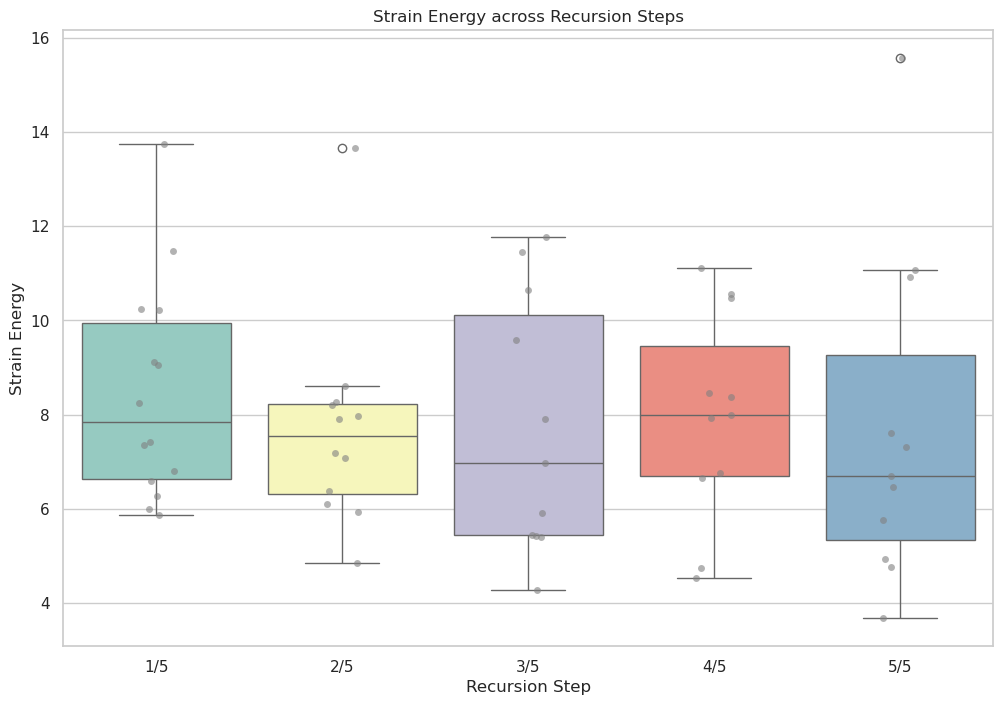

/tmp/ipykernel_2452754/498102362.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Recursion Step', y=column_name, data=cleaned_data, inner='quartile', palette="Set2")


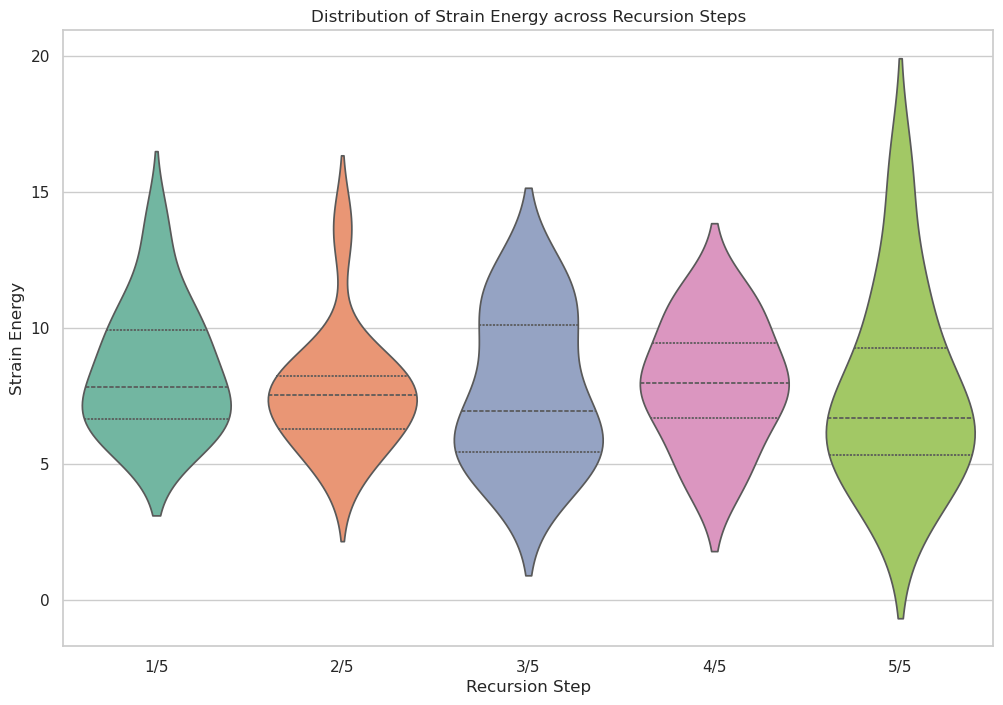

ANOVA for Strain Energy: F-value = 0.2099168449408754, P-value = 0.9318335945999446
No significant differences found across Recursion Steps.


/tmp/ipykernel_2452754/498102362.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Recursion Step', y=column_name, data=cleaned_data, palette="Set3")


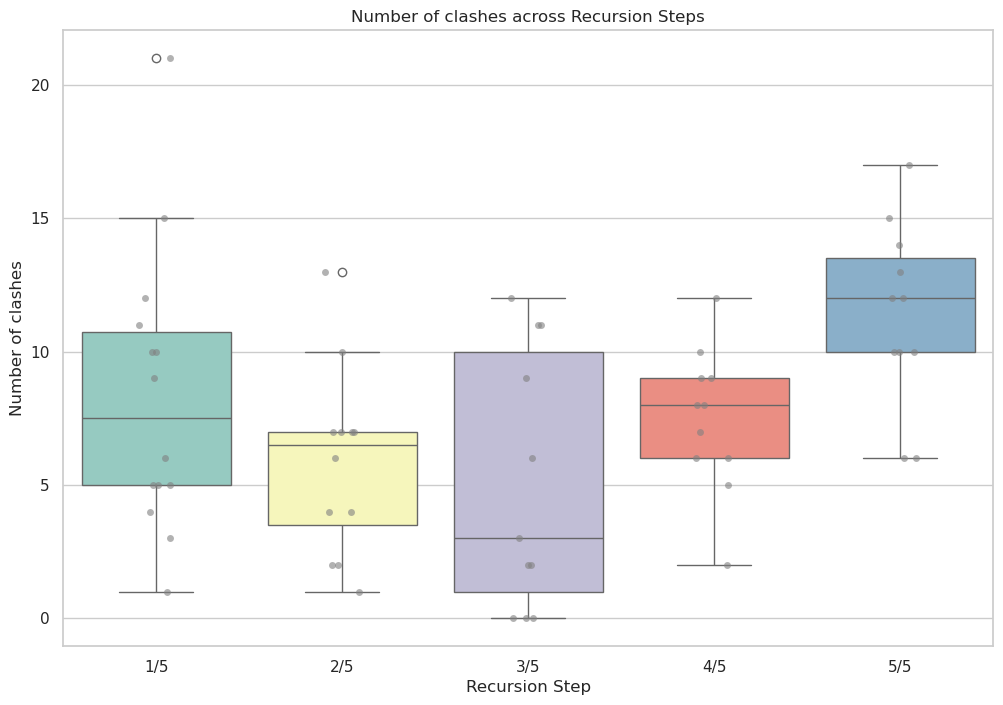

/tmp/ipykernel_2452754/498102362.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Recursion Step', y=column_name, data=cleaned_data, inner='quartile', palette="Set2")


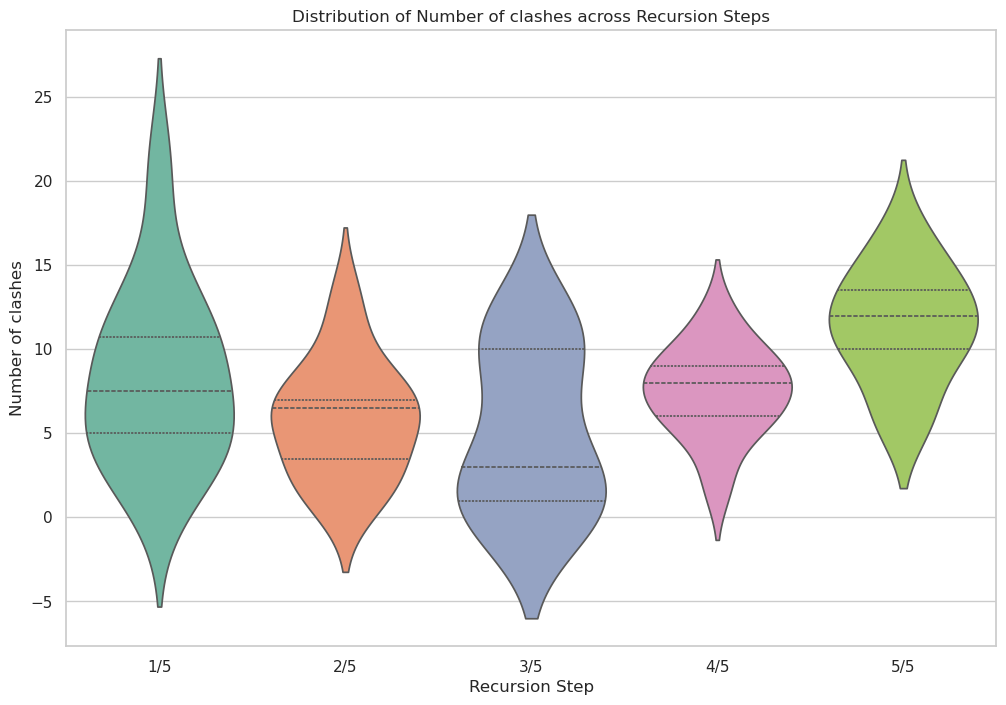

ANOVA for Number of clashes: F-value = 3.925521404407099, P-value = 0.0071974125115873405
Significant differences found. Consider conducting post-hoc tests for pairwise comparisons.
Conducting post-hoc test...
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1/5    2/5  -2.5238 0.5385 -7.1337  2.0861  False
   1/5    3/5  -3.2662 0.3031 -7.9876  1.4552  False
   1/5    4/5  -0.9026 0.9828  -5.624  3.8188  False
   1/5    5/5   3.0065 0.3859 -1.7149  7.7279  False
   2/5    3/5  -0.7424 0.9928 -5.6339   4.149  False
   2/5    4/5   1.6212 0.8818 -3.2703  6.5127  False
   2/5    5/5   5.5303 0.0192  0.6388 10.4218   True
   3/5    4/5   2.3636 0.6709  -2.633  7.3603  False
   3/5    5/5   6.2727 0.0071  1.2761 11.2694   True
   4/5    5/5   3.9091 0.1925 -1.0876  8.9058  False
----------------------------------------------------


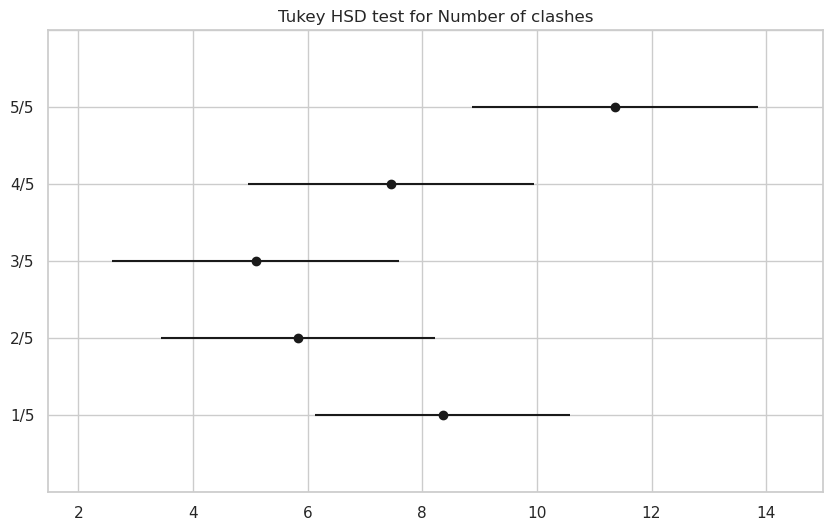

In [19]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt


from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# Assuming 'all_data' is your DataFrame and it includes 'Recursion Step' and the metric of interest

def tukey_hsd_posthoc_test(data, column_name):
    # Perform the Tukey HSD test
    tukey_result = pairwise_tukeyhsd(endog=data[column_name], 
                                     groups=data['Recursion Step'], 
                                     alpha=0.05)  # alpha is the significance level
    
    # Print the summary of the test results
    print(tukey_result)
    
    # Plot the results
    tukey_result.plot_simultaneous()
    plt.title(f'Tukey HSD test for {column_name}')
    plt.show()
    
# Load your dataset
# Ensure 'all_data' DataFrame is prepared with 'Recursion Step' and the metrics columns

# Define a function to annotate statistical significance on plots
def annotate_significance(ax, x1, x2, max_y, text):
    y = max_y + max_y * 0.02  # Slightly above the highest data point
    ax.plot([x1, x1, x2, x2], [y, y+1, y+1, y], lw=1.5, c='black')
    ax.text((x1+x2)*.5, y+1, text, ha='center', va='bottom', color='black')

# Function to visualize and statistically compare groups
def visualize_and_compare(data, column_name):
    cleaned_data = remove_outliers(data, column_name)
    # First, visualize with boxplot
    plt.figure(figsize=(12, 8))
    ax = sns.boxplot(x='Recursion Step', y=column_name, data=cleaned_data, palette="Set3")
    sns.stripplot(x='Recursion Step', y=column_name, data=cleaned_data, color='grey', alpha=0.6, jitter=True)
    plt.title(f'{column_name} across Recursion Steps')
    plt.show()
    
    # Then, visualize with violin plot
    plt.figure(figsize=(12, 8))
    sns.violinplot(x='Recursion Step', y=column_name, data=cleaned_data, inner='quartile', palette="Set2")
    plt.title(f'Distribution of {column_name} across Recursion Steps')
    plt.show()
    
    # Perform ANOVA or Kruskal-Wallis test
    groups = [group[column_name].dropna() for name, group in data.groupby('Recursion Step')]
    if all(group.size > 1 for group in groups):  # Ensure all groups have more than one observation
        f_val, p_val = stats.f_oneway(*groups)
        print(f"ANOVA for {column_name}: F-value = {f_val}, P-value = {p_val}")
        
        if p_val < 0.05:
            print("Significant differences found. Consider conducting post-hoc tests for pairwise comparisons.")
            print("Conducting post-hoc test...")
            tukey_hsd_posthoc_test(cleaned_data, column_name)
        else:
            print("No significant differences found across Recursion Steps.")
    else:
        print("Not all groups have sufficient data for ANOVA.")



column_to_analyze = [
    'Binding Affinity (kcal/mol)', 
    'Confidence Score', 
    'Strain Energy', 
    'Number of clashes'
]

for column in column_to_analyze:
    visualize_and_compare(all_data, column)

# Note: This is a basic implementation. For post-hoc tests, consider using Tukey's HSD or pairwise t-tests with Bonferroni correction.


## PCA

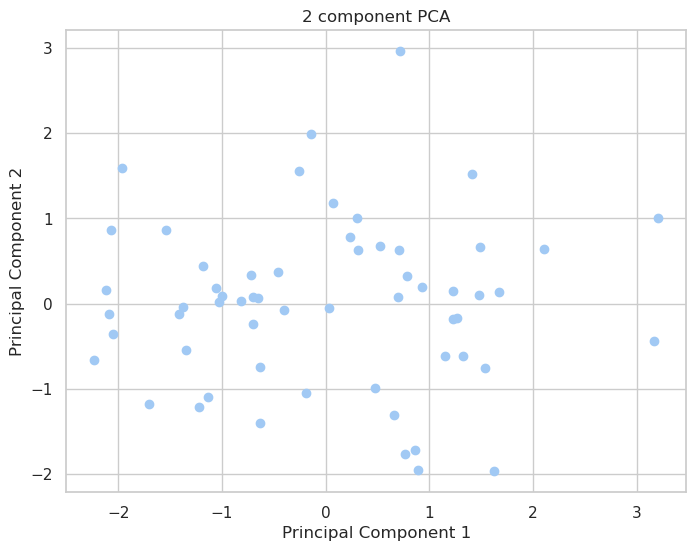

Explained variance ratio: [0.429677   0.23262934]


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'all_data' is your DataFrame

# Outlier removal function
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.1)
    Q3 = df[column_name].quantile(0.9)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# List of features to include in PCA
features = ['Binding Affinity (kcal/mol)', 'Confidence Score', 'Strain Energy', 'Number of clashes']

# Apply outlier removal for each feature
cleaned_data = pd.DataFrame()
for feature in features:
    if cleaned_data.empty:
        cleaned_data = remove_outliers(all_data, feature)
    else:
        cleaned_data = remove_outliers(cleaned_data, feature)

# Standardizing the features
x = cleaned_data.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Performing PCA
pca = PCA(n_components=2)  # You can adjust n_components based on your needs
principalComponents = pca.fit_transform(x)

# Create a DataFrame with the principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Visualizing the PCA results
plt.figure(figsize=(8,6))
plt.scatter(principalDf['Principal Component 1'], principalDf['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA')
plt.grid(True)
plt.show()

# Displaying explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


## One-Sample t-Test

In [21]:
from scipy import stats

# One-sample t-test example
def one_sample_t_test(data, column_name, population_mean):
    """
    Test if the mean of the sample in `column_name` is equal to `population_mean`.
    """
    t_stat, p_val = stats.ttest_1samp(data[column_name].dropna(), population_mean)
    print(f"One-sample t-test for {column_name}:")
    print(f"T-statistic: {t_stat}, P-value: {p_val}")

features = ['Binding Affinity (kcal/mol)', 'Confidence Score', 'Strain Energy', 'Number of clashes']


for feat in features:
    one_sample_t_test(all_data, feat, 0)



One-sample t-test for Binding Affinity (kcal/mol):
T-statistic: -23.96283761775645, P-value: 8.970202943182227e-32
One-sample t-test for Confidence Score:
T-statistic: -14.447577606759836, P-value: 7.125535760231085e-21
One-sample t-test for Strain Energy:
T-statistic: 23.959185591548653, P-value: 9.042636314535028e-32
One-sample t-test for Number of clashes:
T-statistic: 12.870191749533491, P-value: 1.2117673655207043e-18


## ANOVA Test

In [22]:
def anova_test(data, column_name):
    """
    Test if at least one group mean of `column_name` is different from the others.
    """
    group_data = [group.dropna() for name, group in data.groupby('Recursion Step')[column_name]]
    f_stat, p_val = stats.f_oneway(*group_data)
    print(f"ANOVA for {column_name}:")
    print(f"F-statistic: {f_stat}, P-value: {p_val}")


for feat in features:
    # Example usage for 'Binding Affinity (kcal/mol)' across recursion steps
    anova_test(all_data, feat)


ANOVA for Binding Affinity (kcal/mol):
F-statistic: 0.03545476304738386, P-value: 0.9975213572541772
ANOVA for Confidence Score:
F-statistic: 0.3016720816493789, P-value: 0.8755795042552931
ANOVA for Strain Energy:
F-statistic: 0.2099168449408754, P-value: 0.9318335945999446
ANOVA for Number of clashes:
F-statistic: 3.925521404407099, P-value: 0.0071974125115873405
